In [1]:
import numpy as np
from numpy import *
from numpy import nan
import os
import matplotlib.pyplot as plt
import astropy
import pandas as pd
from astropy.io import fits
from astropy.table import Table
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
import matplotlib as mpl
from matplotlib import pyplot as plt
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
import matplotlib.cm as cm
from scipy.stats import spearmanr
from scipy.stats import kstest

plt.style.use(astropy_mpl_style)

In [2]:
path = os.path.expanduser('~/notebook/Forrest/')
path3 = os.path.expanduser('~/notebook/Laptop/')
#Full Sample of 682 with all filters- Parameters
HW=Table.read(os.path.expanduser(path+'ZFOURGE-Parameters.csv')) 
HW=HW.to_pandas()
#EELGs from full sample
path2 = os.path.expanduser('~/Documents/')
comp_ew=Table.read(os.path.expanduser(path2+'comp_ew.dat'),format='ascii')
xy = comp_ew.to_pandas()
xyz = xy[xy['col1']<100000]
stuff = xyz.drop(['col3','col4'],axis=1)
stuff.rename(columns={'col1':'id' ,'col2':'redshift'} ,inplace=True)
EELGs=pd.merge(left=stuff['id'], right=HW, left_on='id', right_on='Galaxy_ID')
EELGs=EELGs.drop(['id'],axis=1)
##########################################MAGPHYS DATA###########################################################
#######Full Sample#######
# F = Table.read(os.path.expanduser(path+'FINAL-PARAMETERS.csv'), format='ascii')
# F=F.to_pandas()
# #EELGs
# FELG = pd.merge(left=F,right=EELGs['Galaxy_ID'],left_on='Galaxy_ID',right_on='Galaxy_ID')
# #Errorbars
# Fers=Table.read(os.path.expanduser(path+'FINAL_ERRORBARS.csv')) 
# Fers=Fers.to_pandas()
#######Kband Removed Sample########
FM = Table.read(os.path.expanduser(path+'ZFOURGE-full-Parameters.csv'), format='ascii')
FM=FM.to_pandas()
#EELGs
FMELG = pd.merge(left=FM,right=EELGs['Galaxy_ID'],left_on='Galaxy_ID',right_on='Galaxy_ID')
FM2 = Table.read(os.path.expanduser(path+'FINALM-PARAMETERS.csv'), format='ascii')
FM2=FM2.to_pandas()
FMELG2 = pd.merge(left=FM2,right=EELGs['Galaxy_ID'],left_on='Galaxy_ID',right_on='Galaxy_ID')
#Errorbars
FMers=Table.read(os.path.expanduser(path+'ZFOURGE-Errorbars.csv')) 
FMers=FMers.to_pandas()
FMers2=Table.read(os.path.expanduser(path+'FINALM_ERRORBARS.csv')) 
FMers2=FMers2.to_pandas()
###########Tommy#################
# T = Table.read(os.path.expanduser(path+'Tommy-Parameters.csv'), format='ascii')
# T=T.to_pandas()
##########Unconstrained Sample############
# Fun2 = Table.read(os.path.expanduser(path+'Unconstrained-FINAL.csv'), format='ascii')
# Fun2=Fun2.to_pandas()
# Fun=pd.merge(left=F,right=Fun2['Galaxy_ID'], left_on='Galaxy_ID',right_on='Galaxy_ID')
##########################################ProSpect DATA###########################################################
#######Full Sample#######
# S = Table.read(os.path.expanduser('~/Documents/Sample_un.csv'), format='ascii')
# S=S.to_pandas()
# pd.set_option('display.max_columns', None)
# S.sort_values(by=['id'],inplace=True)
# S
# #EELGs
# SELG = pd.merge(left=S,right=EELGs['Galaxy_ID'],left_on='id',right_on='Galaxy_ID')
# #######Emission Removed#######
# Sem = Table.read(os.path.expanduser('~/Documents/Sample_em_un.csv'), format='ascii')
# Sem=Sem.to_pandas()
# pd.set_option('display.max_columns', None)
# Sem.sort_values(by=['id'],inplace=True)
# #EELGs
# SemELG = pd.merge(left=Sem,right=EELGs['Galaxy_ID'],left_on='id',right_on='Galaxy_ID')
########################################Bluminosity#############################################################

# BF = Table.read(os.path.expanduser(path+'Bluminosity-FINAL.csv'), format='ascii')
# BF=BF.to_pandas()
# BF=pd.concat([BF,F['Galaxy_ID']],axis=1)
# BFELG = pd.merge(left=BF,right=EELGs['Galaxy_ID'],left_on='Galaxy_ID',right_on='Galaxy_ID')

BFM = Table.read(os.path.expanduser(path3+'Bluminosity-ZFOURGE.csv'), format='ascii')
BFM=BFM.to_pandas()
BFM=pd.concat([BFM,FM['Galaxy_ID']],axis=1)
BFMELG = pd.merge(left=BFM,right=EELGs['Galaxy_ID'],left_on='Galaxy_ID',right_on='Galaxy_ID')

FM = pd.merge(FM,BFM,left_on=['Galaxy_ID'],right_on=['Galaxy_ID'])
FMELG = pd.merge(FMELG,BFMELG,left_on=['Galaxy_ID'],right_on=['Galaxy_ID'])
# BFIGM = Table.read(os.path.expanduser(path+'Bluminosity-NOIGM.csv'), format='ascii')
# BFIGM=BFIGM.to_pandas()
# BFIGM=pd.concat([BFIGM,F['Galaxy_ID']],axis=1)
# BFIGMELG = pd.merge(left=BFIGM,right=EELGs['Galaxy_ID'],left_on='Galaxy_ID',right_on='Galaxy_ID')

# BFMIGM = Table.read(os.path.expanduser(path+'Bluminosity-FMIGM.csv'), format='ascii')
# BFMIGM=BFMIGM.to_pandas()
# BFMIGM=pd.concat([BFMIGM,FM['Galaxy_ID']],axis=1)
# BFMIGMELG = pd.merge(left=BFMIGM,right=EELGs['Galaxy_ID'],left_on='Galaxy_ID',right_on='Galaxy_ID')

# #########Parameters#########
# IGM = Table.read(os.path.expanduser(path+'NOIGM-Parameters.csv'), format='ascii')
# IGM=IGM.to_pandas()
# FMIGM=Table.read(os.path.expanduser(path+'FMIGM-Parameters.csv'), format='ascii')
# FMIGM=FMIGM.to_pandas()

##########################################CEERS DATA###########################################################
######Full Sample Physical Parameters#######
C = Table.read(os.path.expanduser(path+'C7-full-Parameters.csv'), format='ascii')
C = C.to_pandas()
C = C[C['redshift']<14]

# C2 = Table.read(os.path.expanduser(path+'CEERS4-Parameters.csv'), format='ascii')
# C2 = C2.to_pandas()

MT = Table.read(os.path.expanduser(path+'MT2MT2-full-Parameters.csv'), format='ascii')
MT2 = Table.read(os.path.expanduser(path+'MTAO1-Parameters.csv'), format='ascii')
MT = MT.to_pandas()
######Bluminosity slope######
BC = Table.read('~/notebook/Laptop/Bluminosity-C7.csv', format='ascii')
BC = BC.to_pandas()
BC = BC.iloc[np.where(np.isin(BC['id'], C['Galaxy_ID']))]
BMT = Table.read('~/notebook/Laptop/Bluminosity-MT2MT2.csv', format='ascii')
BMT2= Table.read('~/notebook/Laptop/Bluminosity-TAOIGM.csv', format='ascii')
BMT = BMT.to_pandas()
BMT=pd.concat([BMT,MT['Galaxy_ID']],axis=1)
BC=pd.concat([BC,C['Galaxy_ID']],axis=1)
C = pd.merge(C,BC,left_on=['Galaxy_ID'],right_on=['Galaxy_ID'])
C.dropna(subset=['betaP'], inplace=True)
MT = pd.merge(MT,BMT,left_on=['Galaxy_ID'],right_on=['Galaxy_ID'])
# ######Sion#######
# BC4IGM = Table.read('~/notebook/Laptop/Bluminosity-C4IGM.csv', format='ascii')
# BC4IGM = BC4IGM.to_pandas()
# BMTIGM= Table.read('~/notebook/Laptop/Bluminosity-TAOIGM.csv', format='ascii')
# BMTIGM = BMTIGM.to_pandas()
##########################################JADES DATA###########################################################
JSN = Table.read('~/notebook/Laptop/Bluminosity_JSN2.csv', format='ascii')
JSN = JSN.to_pandas()
JS = Table.read(os.path.expanduser(path+'JSN2-full-Parameters.csv'),format='ascii')
JS = JS.to_pandas()
JSN=pd.concat([JSN,JS['Galaxy_ID']],axis=1)
JS = pd.merge(JS,JSN,left_on=['Galaxy_ID'],right_on=['Galaxy_ID'])

#######JADES DATA NEW#######
JSN3 = Table.read('~/notebook/Laptop/Bluminosity_JSN3test.csv', format='ascii')
JSN3 = JSN3.to_pandas()
JS3 = Table.read(os.path.expanduser('~/notebook/Laptop/JSN3-Parameters-all.csv'),format='ascii')
JS3 = JS3.to_pandas()
JSN3=pd.concat([JSN3,JS3['Galaxy_ID']],axis=1)
JS3 = pd.merge(JS3,JSN3,left_on=['Galaxy_ID'],right_on=['Galaxy_ID'])
####New ZFOURGE data####
FM3 = Table.read(os.path.expanduser('~/notebook/Laptop/ZFOURGE2-Parameters-all.csv'), format='ascii')
FM3=FM3.to_pandas()
BFM3 = Table.read(os.path.expanduser('~/notebook/Laptop/Bluminosity_ZFOURGE2test.csv'), format='ascii')
BFM3=BFM3.to_pandas()
BFM3=pd.concat([BFM3,FM3['Galaxy_ID']],axis=1)
FM3 = pd.merge(FM3,BFM3,left_on=['Galaxy_ID'],right_on=['Galaxy_ID'])

FMELG3 = pd.merge(left=FM3,right=EELGs['Galaxy_ID'],left_on='Galaxy_ID',right_on='Galaxy_ID')
BFMELG3 = pd.merge(left=BFM3,right=EELGs['Galaxy_ID'],left_on='Galaxy_ID',right_on='Galaxy_ID')
FMELG3 = pd.merge(FMELG3,BFMELG3,left_on=['Galaxy_ID'],right_on=['Galaxy_ID'])

# Parameters=[r'SFH $f_{mu}$',r'IR $f_{mu}$',r'$\mu$',r'$\tau_V$',r'sSFR$_{0.1Gyr}$','M(stars)','Ldust',
#r'$T_C^{ISM}$',r'$T_W^{BC}$',r'$\chi_C^{tot}$',r'$\chi_{PAH}^{tot}$',r'$\chi_{MIR}^{tot}$',r'$\chi_{W}^{tot}$',
#r'$\tau_{V}^{ISM}$','M(dust)',r'$SFR_{0.1Gyr}$',r'$A_V$',r'$age_M$','Tdust','lg(M/Lh)','lg(M/Lk)']

In [7]:
print(max(log10(EELGs['M(stars)']))-min(log10(EELGs['M(stars)'])))
max(log10(JS['M(stars)']))-min(log10(JS['M(stars)']))

1.855738022012785


3.6162557407448697

In [11]:
def FancyPlot(xlab='',ylab='',lw=2.5,lfs=45,tfs=25,size_x=13,size_y=12):
    plt.rcParams['axes.linewidth']=lw
    plt.rc('text',usetex=True)
    plt.rc('font',family='serif',size=tfs)
    mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
    mpl.rcParams['mathtext.default'] = 'regular'
    fig = plt.figure(figsize=(size_x,size_y))
    ax=fig.add_subplot(111)
    ax.set_xlabel(xlab,fontsize=lfs)
    ax.set_ylabel(ylab,fontsize=lfs)
    ax.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    ax.grid(False)
    return fig,ax
def HexPlot(xlab1='',ylab1='',xlab2='',ylab2='',xlab3='',ylab3='',\
           wspace=0.25,lw=2.5,lfs=45,tfs=25,size_x=20,size_y=7,Grid=False):
    plt.rcParams['axes.linewidth']=lw
    plt.rc('text',usetex=True)
    plt.rc('font',family='serif',size=tfs)
    mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
    fig,axarr =plt.subplots(1,3,figsize=(size_x,size_y))
    gs=gridspec.GridSpec(1,3)
    gs.update(wspace=wspace)
    ax1=plt.subplot(gs[0])
    ax2=plt.subplot(gs[1])
    ax3=plt.subplot(gs[2])
    
    ax1.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax1.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    
    ax2.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax2.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    
    ax3.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax3.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    
    ax1.set_xlabel(xlab1,fontsize=lfs)
    ax1.set_ylabel(ylab1,fontsize=lfs)
    
    ax2.set_xlabel(xlab2,fontsize=lfs)
    ax2.set_ylabel(ylab2,fontsize=lfs)
    
    ax3.set_xlabel(xlab3,fontsize=lfs)
    ax3.set_ylabel(ylab3,fontsize=lfs)
    return fig,ax1,ax2,ax3

In [26]:
JS

Galaxy_ID  redshift    sfh  IR fmu     mu  tau_V          sSFR  \
0        77910  5.775470  0.081   0.278  0.068  2.315  1.273000e-08   
1        84518  5.762800  0.340   0.463  0.946  0.023  7.707000e-09   
2        88612  5.644290  0.199   0.278  0.050  2.707  1.255000e-08   
3        90354  7.664050  0.273   0.463  0.260  4.773  1.160000e-08   
4        94574  5.517670  0.302   0.463  0.958  0.234  1.176000e-08   
..         ...       ...    ...     ...    ...    ...           ...   
125     219026  5.526460  0.111   0.278  0.145  0.218  1.032000e-08   
126     219038  5.548820  0.365   0.463  0.899  0.356  1.205000e-08   
127     219057  7.239130  0.105   0.278  0.087  0.146  1.187000e-08   
128     219195  7.553060  0.259   0.436  0.625  0.096  4.788000e-09   
129     256636  5.689164  0.340   0.463  0.946  0.023  7.707000e-09   

         M(stars)       L(dust)  T_C^ISM  ...    id_y      beta   beta_er  \
0    2.105000e+08  3.115000e+10     69.4  ...   77910 -1.699241  0.036142   
1    1.591000e+08  9.210000e+08     49.7  ...   84518 -2.536998  0.014031   
2    4.799000e+08  8.688000e+10     69.4  ...   88612 -1.533921  0.038465   
3    3.887000e+10  6.958000e+12     49.7  ...   90354  0.285990  0.046551   
4    6.369000e+07  5.132000e+09     49.7  ...   94574 -2.273081  0.014584   
..            ...           ...      ...  ...     ...       ...       ...   
125  2.071000e+08  1.301000e+10     69.4  ...  219026 -1.454687  0.035532   
126  1.322000e+08  1.075000e+10     49.7  ...  219038 -1.957398  0.014275   
127  1.181000e+08  1.130000e+10     69.4  ...  219057 -1.662025  0.037074   
128  4.679000e+08  5.787000e+09     35.9  ...  219195 -1.979148  0.030045   
129  9.405000e+06  5.444000e+07     49.7  ...  256636 -2.536997  0.014031   

        betaU  betaU_er     betaP  betaP_er     bouwen    bouwenA       sion  
0   -2.285879  0.035207 -0.960271  0.527426  25.444467  24.949545  25.098317  
1   -2.575895  0.014004 -2.746048  0.547688  25.763484  25.720697  25.202495  
2   -2.296037  0.034978 -0.750239  0.753999  25.455641  24.850353  25.104617  
3   -2.380318  0.029736 -2.293543  0.798312  25.548350  23.758406  25.162487  
4   -2.660653  0.014174 -2.381085  0.544323  25.856719  25.430389  25.247956  
..        ...       ...       ...       ...        ...        ...        ...  
125 -2.238914  0.036013 -1.775671  0.240694  25.392805  24.802812  25.065101  
126 -2.628395  0.013056 -2.061982  0.385636  25.821234  25.104439  25.202319  
127 -2.266745  0.037376 -2.173327  0.390124  25.423420  24.927215  25.080894  
128 -2.237092  0.029965 -1.901890  0.243249  25.390801  25.117489  25.071586  
129 -2.575894  0.014004 -2.599862  0.631604  25.763483  25.720696  25.202496  

[130 rows x 45 columns]

In [47]:
# import numpy as np
from scipy.stats import ks_2samp

X = JS.sample(n=76)
statistic, p_value = ks_2samp(FMELG['betaP'], X['betaP'])

# Print the results
print("KS Statistic:", statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("The null hypothesis is rejected. There is a significant difference between the two samples.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the two samples.")


KS Statistic: 0.3157894736842105
P-value: 0.0009445578929588963
The null hypothesis is rejected. There is a significant difference between the two samples.


(array([[ 1.,  1.,  6., 12., 11., 17., 14., 10.,  1.,  3.],
        [ 0.,  0.,  0.,  0., 10., 31., 22., 10.,  3.,  0.]]),
 array([-3.50694921, -3.22424213, -2.94153505, -2.65882797, -2.37612089,
        -2.09341381, -1.81070673, -1.52799965, -1.24529257, -0.96258549,
        -0.67987841]),
 <a list of 2 BarContainer objects>)

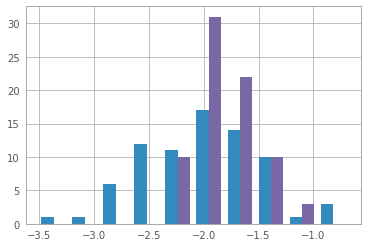

In [50]:
plt.hist([X['betaP'],FMELG['betaP']])
# plt.xlim(0,2)

In [30]:
def cucconi_test(sample1, sample2):
    sorted_sample1 = np.sort(sample1)
    sorted_sample2 = np.sort(sample2)
    n = len(sorted_sample1)

    # Calculate the Cucconi statistic
    concordant_pairs = 0
    for i in range(n):
        for j in range(i+1, n):
            if (sorted_sample1[i] < sorted_sample1[j]) == (sorted_sample2[i] < sorted_sample2[j]):
                concordant_pairs += 1

    # Normalize the Cucconi statistic
    cucconi_statistic = (2 * concordant_pairs - n * (n + 1)) / (n * (n - 1))

    # Calculate the p-value
    p_value = 2 * min(cucconi_statistic, 1 - cucconi_statistic)

    return cucconi_statistic, p_value

statistic,p_value =  cucconi_test(FMELG['betaP'],JS['betaP'])
print("Cucconi Statistic:", statistic)
print("P-value:", p_value)

Cucconi Statistic: -0.02666666666666667
P-value: -0.05333333333333334


In [75]:
from nonparstat import Cucconi

X = FM.sample(n=76)
cucconi_test(JS['betaP'], FM['betaP'])

# # Print the results
# print("KS Statistic:", statistic)
# print("P-value:", p_value)

# # Interpret the results
# alpha = 0.05
# if p_value < alpha:
#     print("The null hypothesis is rejected. There is a significant difference between the two samples.")
# else:
#     print("Fail to reject the null hypothesis. There is no significant difference between the two samples.")

(-0.015503875968992248, -0.031007751937984496)

In [53]:
Cucconi

<module 'nonparstat.Cucconi' from '/home/magnus/notebook/jupyterenv/lib/python3.8/site-packages/nonparstat/Cucconi.py'>

In [27]:
1.358*sqrt((len(FMELG)+len(JS))/(len(FMELG)*len(JS)))

0.1960897567762034

/tmp/ipykernel_1867468/110957387.py:5: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']


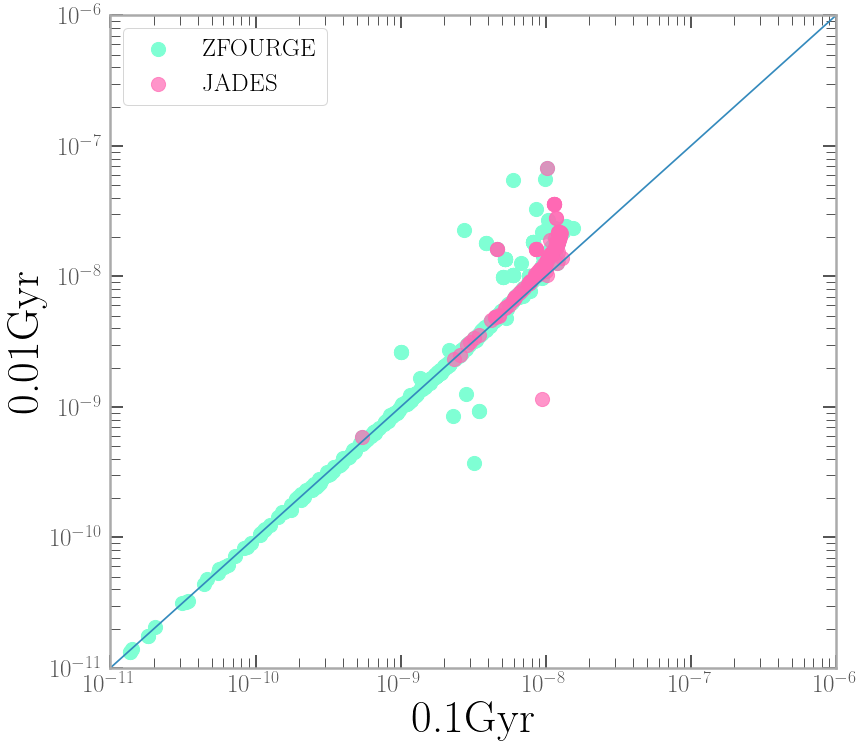

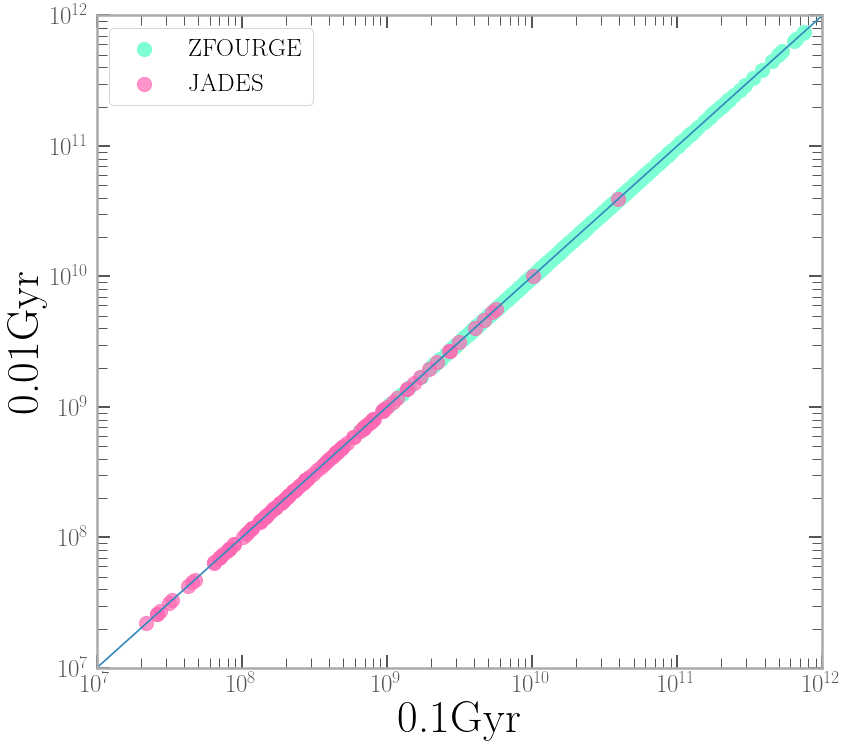

In [38]:
fig,ax=FancyPlot('0.1Gyr','0.01Gyr')
# plt.title('JADES')
ax.scatter(FM['sSFR'],FM3['sSFR'],c='aquamarine',s=200,label='ZFOURGE')
ax.scatter(JS['sSFR'],JS3['sSFR'],c='hotpink',s=200,label='JADES',alpha=0.7)
ax.legend()
ax.plot(linspace(0,10,10),linspace(0,10,10))
ax.set_xlim(10**-11,10**-6)
ax.set_ylim(10**-11,10**-6)

ax.set_xscale('log')
ax.set_yscale('log')
fig,ax=FancyPlot('0.1Gyr','0.01Gyr')
# plt.title('JADES')
ax.scatter(FM['M(stars)'],FM3['M(stars)'],c='aquamarine',s=200,label='ZFOURGE')
ax.scatter(JS['M(stars)'],JS3['M(stars)'],c='hotpink',s=200,label='JADES',alpha=0.7)
ax.legend()
ax.plot(linspace(0,10**12,10),linspace(0,10**12,10))
ax.set_xlim(10**7,10**12)
ax.set_ylim(10**7,10**12)

ax.set_xscale('log')
ax.set_yscale('log')



In [301]:
JS2 = Table.read(os.path.expanduser(path+'JSNH-full-Parameters.csv'),format='ascii')
JS2 = JS2.to_pandas()
JSN2 = Table.read('~/notebook/Laptop/Bluminosity_JSNHtest.csv', format='ascii')
JSN2 = JSN2.to_pandas()
JSN2=pd.concat([JSN2,JS2['Galaxy_ID']],axis=1)
JS2 = pd.merge(JS2,JSN2,left_on=['Galaxy_ID'],right_on=['Galaxy_ID'])

/tmp/ipykernel_411527/110957387.py:5: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']


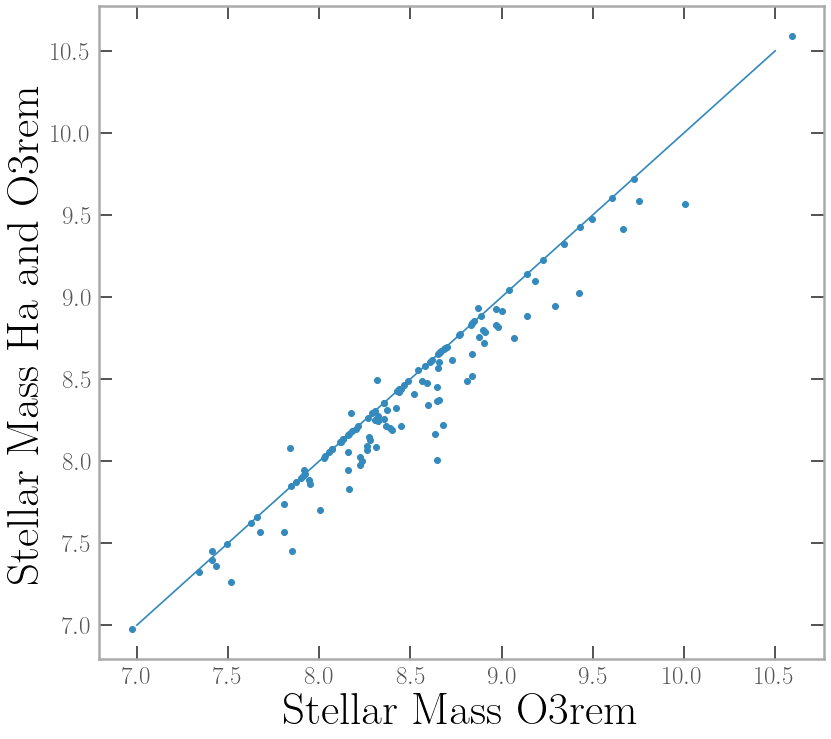

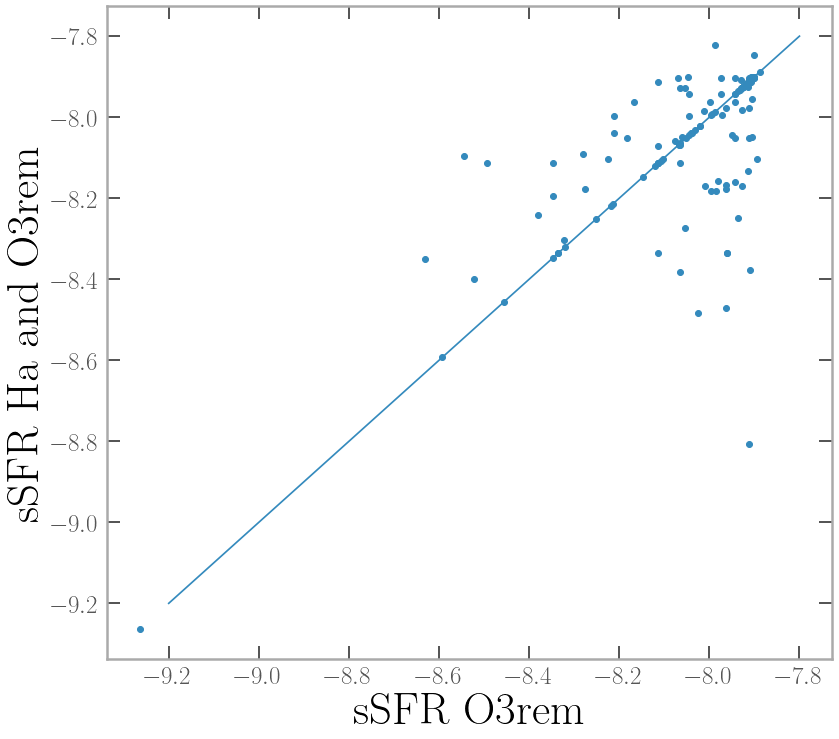

In [299]:
fig,ax=FancyPlot('Stellar Mass O3rem','Stellar Mass Ha and O3rem')
ax.scatter(log10(JS['M(stars)']),log10(JS2['M(stars)']))
ax.plot(linspace(7,10.5,10),linspace(7,10.5,10))
fig,ax=FancyPlot('sSFR O3rem','sSFR Ha and O3rem')
ax.scatter(log10(JS['sSFR']),log10(JS2['sSFR']))
ax.plot(linspace(-9.2,-7.8,10),linspace(-9.2,-7.8,10))

In [81]:
FM['mag']=FM['A_V']*10**(1/2.5)
FMELG['mag']=FMELG['A_V']*10**(1/2.5)
C['mag']=C['A_V']*10**(1/2.5)
JS['mag']=JS['A_V']*10**(1/2.5)
MT['mag']=MT['A_V']*10**(1/2.5)

In [ ]:
mpl.rcParams.update({'font.size': 22})
#correlation of sion with beta from photometry 

#r'$SFR_{0.1Gyr}$'#
fig,ax=plt.subplots(1,2,figsize=(16,10))

ax[0].errorbar(F[r'$SFR_{0.1Gyr}$'],BFIGM['betaP'],yerr=BFIGM['betaP_er'],label='photometry',fmt='o')#,s=105, alpha=0.5)
ax[0].errorbar(FELG[r'$SFR_{0.1Gyr}$'],BFIGMELG['betaP'],yerr=BFIGMELG['betaP_er'],label='EELG',fmt='*',c='yellow')
ax[0].set_xscale('log')
ax[0].legend()
ax[0].set_xlabel(r'log SFR/ M$_{\odot}$/yr')
ax[0].set_ylabel('Bluminosity (beta)')
ax[0].set_xlim(1,10**3)
ax[0].set_ylim(-4,3)#r'sSFR$_{0.1Gyr}$'
corr_coef, p_value = spearmanr(log10(F[r'$SFR_{0.1Gyr}$']),BFIGM['betaP'])
ax[0].annotate('spear-'+str(round(corr_coef,3)),xy=(1,1),size=25)
ax[0].annotate('p-'+str(round(p_value,5)),xy=(1,0.8),size=25)

corr_coef, p_value = spearmanr(log10(FM[r'$SFR_{0.1Gyr}$']),BFMIGM['betaP'])
ax[1].errorbar(FM[r'$SFR_{0.1Gyr}$'],BFMIGM['betaP'],yerr=BFMIGM['betaP_er'],label='photometry',fmt='o')
ax[1].errorbar(FMELG[r'$SFR_{0.1Gyr}$'],BFMIGMELG['betaP'],yerr=BFMIGMELG['betaP_er'],label='photometry',fmt='*',c='yellow')
ax[1].annotate('spear-'+str(round(corr_coef,3)),xy=(1,1),size=25)
ax[1].annotate('p-'+str(round(p_value,5)),xy=(1,0.8),size=25)
ax[1].set_xlabel(r'log SFR krem/ M$_{\odot}$/yr')
ax[1].set_xscale('log')
ax[1].set_xlim(1,10**3)
ax[1].set_ylim(-4,3)

#r'sSFR$_{0.1Gyr}$'#

fig,ax=plt.subplots(1,2,figsize=(16,10))
ax[0].errorbar(F[r'sSFR$_{0.1Gyr}$'],BFIGM['betaP'],yerr=BFIGM['betaP_er'],label='photometry',fmt='o')#,s=105, alpha=0.5)
ax[0].errorbar(FELG[r'sSFR$_{0.1Gyr}$'],BFIGMELG['betaP'],yerr=BFIGMELG['betaP_er'],label='EELG',fmt='*',c='yellow')
ax[0].set_xscale('log')
ax[0].legend()
ax[0].set_xlabel(r'log sSFR/ /yr')
ax[0].set_ylabel('Bluminosity (beta)')
# ax[0].set_xlim(1,10**3)
# ax[0].set_ylim(-4,3)#r'sSFR$_{0.1Gyr}$'
corr_coef, p_value = spearmanr(F[r'sSFR$_{0.1Gyr}$'],BFIGM['betaP'])
ax[0].annotate('spear-'+str(round(corr_coef,3)),xy=(10**-10.8,4),size=25)
ax[0].annotate('p-'+str(round(p_value,5)),xy=(10**-10.8,3.5),size=25)

ax[1].errorbar(FM[r'sSFR$_{0.1Gyr}$'],BFMIGM['betaP'],yerr=BFMIGM['betaP_er'],label='photometry',fmt='o')
ax[1].errorbar(FMELG[r'sSFR$_{0.1Gyr}$'],BFMIGMELG['betaP'],yerr=BFMIGMELG['betaP_er'],label='photometry',fmt='*',c='yellow')
ax[1].annotate('spear-'+str(round(corr_coef,3)),xy=(1,1),size=25)
ax[1].annotate('p-'+str(round(p_value,5)),xy=(1,0.8),size=25)
ax[1].set_xlabel(r'log sSFR krem/ /yr')
ax[1].set_xscale('log')
# ax[1].set_xlim(1,10**3)
# ax[1].set_ylim(-4,3)#r'sSFR$_{0.1Gyr}$'
corr_coef, p_value = spearmanr(FM[r'sSFR$_{0.1Gyr}$'],BFMIGM['betaP'])
ax[1].annotate('spear-'+str(round(corr_coef,3)),xy=(10**-10.8,4),size=25)
ax[1].annotate('p-'+str(round(p_value,5)),xy=(10**-10.8,3.5),size=25)





# plt.scatter(F[r'sSFR$_{0.1Gyr}$'],B['betaU'],label='unattenuated',s=105)
# plt.scatter(F[r'sSFR$_{0.1Gyr}$'],B['beta'],label='attenuated',s=105, alpha=0.5)
fig,ax=plt.subplots(1,2,figsize=(16,10))
# plt.scatter(F[r'sSFR$_{0.1Gyr}$'],B['betaU'],label='unattenuated',s=105)
# plt.scatter(F[r'sSFR$_{0.1Gyr}$'],B['beta'],label='attenuated',s=105, alpha=0.5)
ax[0].errorbar(F['Ldust'],BFIGM['betaP'],yerr=BFIGM['betaP_er'],label='photometry',fmt='o')#,s=105, alpha=0.5)
ax[0].errorbar(FELG['Ldust'],BFIGMELG['betaP'],yerr=BFIGMELG['betaP_er'],label='EELG',fmt='*',c='yellow')
ax[0].set_xscale('log')
ax[0].legend()
ax[0].set_xlabel(r'log Dust Luminosity /L$_\odot$')
ax[0].set_ylabel('Bluminosity (beta)')
# ax[0].set_xlim(1,10**3)
# ax[0].set_ylim(-4,3)#r'sSFR$_{0.1Gyr}$'
corr_coef, p_value = spearmanr(log10(F['Ldust']),BFIGM['betaP'])
ax[0].annotate('spear-'+str(round(corr_coef,3)),xy=(10**10,4),size=25)
ax[0].annotate('p-'+str(round(p_value,5)),xy=(10**10,3.5),size=25)

ax[1].errorbar(FM['Ldust'],BFMIGM['betaP'],yerr=BFMIGM['betaP_er'],label='photometry',fmt='o')
ax[1].errorbar(FMELG['Ldust'],BFMIGMELG['betaP'],yerr=BFMIGMELG['betaP_er'],label='photometry',fmt='*',c='yellow')
ax[1].annotate('spear-'+str(round(corr_coef,3)),xy=(1,1),size=25)
ax[1].annotate('p-'+str(round(p_value,5)),xy=(1,0.8),size=25)
ax[1].set_xlabel(r'log Dust Luminosity krem/L$_\odot$')
ax[1].set_xscale('log')
# ax[1].set_xlim(1,10**3)
# ax[1].set_ylim(-4,3)#r'sSFR$_{0.1Gyr}$'
corr_coef, p_value = spearmanr(FM['Ldust'],BFMIGM['betaP'])
ax[1].annotate('spear-'+str(round(corr_coef,3)),xy=(10**10,4),size=25)
ax[1].annotate('p-'+str(round(p_value,5)),xy=(10**10,3.5),size=25)

#####################################################################
fig,ax=plt.subplots(1,2,figsize=(16,10))
# plt.scatter(F[r'sSFR$_{0.1Gyr}$'],B['betaU'],label='unattenuated',s=105)
# plt.scatter(F[r'sSFR$_{0.1Gyr}$'],B['beta'],label='attenuated',s=105, alpha=0.5)
ax[0].errorbar(F[r'$age_M$'],BFIGM['betaP'],yerr=BFIGM['betaP_er'],label='photometry',fmt='o')#,s=105, alpha=0.5)
ax[0].errorbar(FELG[r'$age_M$'],BFIGMELG['betaP'],yerr=BFIGMELG['betaP_er'],label='EELG',fmt='*',c='yellow')
# ax[0].set_xscale('log')
ax[0].legend()
ax[0].set_xlabel(r'$age_M$ /Gyr')
ax[0].set_ylabel('Bluminosity (beta)')
# ax[0].set_xlim(1,10**3)
# ax[0].set_ylim(-4,3)#r'sSFR$_{0.1Gyr}$'
corr_coef, p_value = spearmanr(F[r'$age_M$'],BFIGM['betaP'])
ax[0].annotate('spear-'+str(round(corr_coef,3)),xy=(8,4),size=25)
ax[0].annotate('p-'+str(round(p_value,5)),xy=(8,3.5),size=25)


# corr_coef, p_value = spearmanr(log10(FM[r'$age_M$']),B['betaP'])
ax[1].errorbar(FM[r'$age_M$'],BFMIGM['betaP'],yerr=BFMIGM['betaP_er'],label='photometry',fmt='o')
ax[1].errorbar(FMELG[r'$age_M$'],BFMIGMELG['betaP'],yerr=BFMIGMELG['betaP_er'],label='photometry',fmt='*',c='yellow')
ax[1].annotate('spear-'+str(round(corr_coef,3)),xy=(1,1),size=25)
ax[1].annotate('p-'+str(round(p_value,5)),xy=(1,0.8),size=25)
ax[1].set_xlabel(r'$age_M$ krem/Gyr')
ax[1].set_xscale('log')
# ax[1].set_xlim(1,10**3)
# ax[1].set_ylim(-4,3)#r'sSFR$_{0.1Gyr}$'
corr_coef, p_value = spearmanr(FM[r'$age_M$'],BFMIGM['betaP'])
ax[1].annotate('spear-'+str(round(corr_coef,3)),xy=(8,4),size=25)
ax[1].annotate('p-'+str(round(p_value,5)),xy=(8,3.5),size=25)
#########################################################################

fig,ax=plt.subplots(1,2,figsize=(16,10))
# plt.scatter(F[r'sSFR$_{0.1Gyr}$'],B['betaU'],label='unattenuated',s=105)
# plt.scatter(F[r'sSFR$_{0.1Gyr}$'],B['beta'],label='attenuated',s=105, alpha=0.5)
ax[0].errorbar(F[r'$age_M$'],BFIGM['sion'],yerr=BFIGM['betaP_er'],label='photometry',fmt='o')#,s=105, alpha=0.5)
ax[0].errorbar(FELG[r'$age_M$'],BFIGMELG['sion'],yerr=BFIGMELG['betaP_er'],label='EELG',fmt='*',c='yellow')
# ax[0].set_xscale('log')
ax[0].legend()
ax[0].set_xlabel(r'$age_M$ /Gyr')
ax[0].set_ylabel('sion')
# ax[0].set_xlim(1,10**3)
# ax[0].set_ylim(-4,3)#r'sSFR$_{0.1Gyr}$'
corr_coef, p_value = spearmanr(F[r'$age_M$'],BFIGM['sion'])
ax[0].annotate('spear-'+str(round(corr_coef,3)),xy=(8,4),size=25)
ax[0].annotate('p-'+str(round(p_value,5)),xy=(8,3.5),size=25)


# corr_coef, p_value = spearmanr(log10(FM[r'$age_M$']),B['betaP'])
ax[1].errorbar(FM[r'$age_M$'],BFMIGM['sion'],yerr=BFMIGM['betaP_er'],label='photometry',fmt='o')
ax[1].errorbar(FMELG[r'$age_M$'],BFMIGMELG['sion'],yerr=BFMIGMELG['betaP_er'],label='photometry',fmt='*',c='yellow')
ax[1].annotate('spear-'+str(round(corr_coef,3)),xy=(1,1),size=25)
ax[1].annotate('p-'+str(round(p_value,5)),xy=(1,0.8),size=25)
ax[1].set_xlabel(r'$age_M$ krem/Gyr')
ax[1].set_xscale('log')
# ax[1].set_xlim(1,10**3)
# ax[1].set_ylim(-4,3)#r'sSFR$_{0.1Gyr}$'
corr_coef, p_value = spearmanr(FM[r'$age_M$'],BFMIGM['sion'])
ax[1].annotate('spear-'+str(round(corr_coef,3)),xy=(8,4),size=25)
ax[1].annotate('p-'+str(round(p_value,5)),xy=(8,3.5),size=25)

# plt.errorbar(FM[r'$age_M$'],B['betaP'],yerr=B['betaP_er'],label='photometry',fmt='o')#,s=105, alpha=0.5)
# # ax.set_xscale('log')
# plt.errorbar(FMELG[r'$age_M$'],B.where(B['Galaxy_ID'].isin(FELG['Galaxy_ID'])).dropna()['betaP'],yerr=B.where(B['Galaxy_ID'].isin(FELG['Galaxy_ID'])).dropna()['betaP_er'],label='photometry',fmt='*',markersize=10)#, marker='*',c='yellow' )#,s=105, alpha=0.5)

# plt.legend()
# plt.xlabel(r'age /Gyr$')
# plt.ylabel('Bluminosity (beta)')
# corr_coef, p_value = spearmanr(F[r'$age_M$'],B['betaP'])#,weights=weights)
# plt.annotate('spear-'+str(round(corr_coef,3)),xy=(8,4),size=25)
# plt.annotate('p-'+str(round(p_value,5)),xy=(8,3.5),size=25)

# plt.errorbar(F['Ldust'],B['betaP'],yerr=B['betaP_er'],label='photometry',fmt='o')#,s=105, alpha=0.5)
# ax.set_xscale('log')
# plt.legend()
# plt.xlabel(r'log Dust Luminosity /L$_\odot$')
# plt.ylabel('Bluminosity (beta)')
# corr_coef, p_value = spearmanr(F['Ldust'],B['betaP'])
# plt.annotate('spear-'+str(round(corr_coef,3)),xy=(10**10,4),size=25)
# plt.annotate('p-'+str(round(p_value,5)),xy=(10**10,3.5),size=25)

fig,ax=plt.subplots(figsize=(16,10))
# plt.scatter(F[r'sSFR$_{0.1Gyr}$'],B['betaU'],label='unattenuated',s=105)
# plt.scatter(F[r'sSFR$_{0.1Gyr}$'],B['beta'],label='attenuated',s=105, alpha=0.5)
plt.errorbar(F['M(dust)'],BFIGM['betaP'],yerr=BFIGM['betaP_er'],label='photometry',fmt='o')#,s=105, alpha=0.5)
ax.set_xscale('log')
plt.legend()
plt.xlabel(r'log Dust Mass /M$_\odot$')
plt.ylabel('Bluminosity (beta)')
corr_coef, p_value = spearmanr(F['M(dust)'],BFIGM['betaP'])
plt.annotate('spear-'+str(round(corr_coef,3)),xy=(10**5,4),size=25)
plt.annotate('p-'+str(round(p_value,5)),xy=(10**5,3.5),size=25)

fig,ax=plt.subplots(figsize=(16,10))
# plt.scatter(F[r'sSFR$_{0.1Gyr}$'],B['betaU'],label='unattenuated',s=105)
# plt.scatter(F[r'sSFR$_{0.1Gyr}$'],B['beta'],label='attenuated',s=105, alpha=0.5)
# def weighted_spearman(x,y,weights):
#     arr = np.asarray(x.values, dtype=np.float64)
#     weights = np.asarray(weights, dtype=np.float64)
#     x_weighted = np.repeat(arr, weights)
#     y_weighted = np.repeat(y.asarray(y, dtype=np.float64), weights)
#     corr_coef, p_value = spearmanr(x_weighted,y_weighted, nan_policy='propagate')#,weights=weights)
#     return corr_coef, p_value
# weights = np.zeros_like(B['betaP'])
# for i in range(len(B['betaP'])):
#     weights[i] = 1/(B['betaP_er'][i]*(Fers['SMh'][i]+Fers['SMl'][i])/2)
# corr_coef, p_value=weighted_spearman(F['M(stars)'],B['betaP'], weights)
plt.errorbar(F['M(stars)'],BFIGM['betaP'],yerr=BFIGM['betaP_er'],label='photometry',fmt='o')#,s=105, alpha=0.5)
ax.set_xscale('log')
plt.legend()
plt.xlabel(r'log Stellar Mass /M$_\odot$')
plt.ylabel('Bluminosity (beta)')
corr_coef, p_value = spearmanr(F['M(stars)'],BFIGM['betaP'])#,weights=weights)
plt.annotate('spear-'+str(round(corr_coef,3)),xy=(10**10,4),size=25)
plt.annotate('p-'+str(round(p_value,5)),xy=(10**10,3.5),size=25)
# fig,ax=plt.subplots(figsize=(16,10))
#r'$age_M$'


In [ ]:
mpl.rcParams.update({'font.size': 22})
fig,ax=plt.subplots(figsize=(16,10))

plt.errorbar(BF['betaU'],BF['betaP'],xerr=BF['betaU_er'],yerr=BF['betaP_er'],fmt='o')
plt.xlabel('Unattenuated Bluminosity')
plt.ylabel('Photometric Bluminosity')

fig,ax=plt.subplots(figsize=(16,10))
plt.title('krem')
plt.errorbar(BFM['betaU'],BFM['betaP'],xerr=BFM['betaU_er'],yerr=BFM['betaP_er'],fmt='o')#,color='red', ecolor='blue')
plt.xlabel('Unattenuated Bluminosity')
plt.ylabel('Photometric Bluminosity')

In [12]:
ss=pd.read_csv(os.path.expanduser('~/notebook/Forrest/specsions.csv'))
ss

ms=pd.merge(FMELG,ss,left_on='Galaxy_ID',right_on='zfourge_id')
ms

# ar = []
# ar.append([ms.iloc[2],ms.iloc[7],ms.iloc[11],ms.iloc[15]])
# ar
crap = pd.read_csv(os.path.expanduser('~/Downloads/kmos_fast_o3_ew.csv'))
crap
ms2=pd.merge(FMELG,crap,left_on='Galaxy_ID',right_on='IDs')
ms2
pd.set_option('display.max_columns', None)
ms3=pd.merge(ms2,ss,left_on='Galaxy_ID',right_on='zfourge_id')
ms3

Galaxy_ID  redshift    sfh  IR fmu     mu  tau_V          sSFR  \
0       10936   3.60400  0.333   0.463  0.936  0.336  3.199000e-09   
1       11999   3.60300  0.378   0.463  0.958  0.479  5.448000e-09   
2       12533   3.56800  0.440   0.463  0.799  0.037  1.055000e-09   
3       13155   3.06400  0.369   0.463  0.981  0.355  5.091000e-09   
4       13203   3.56300  0.291   0.463  0.023  0.467  8.583000e-09   
5       15111   2.98700  0.454   0.463  0.965  0.439  2.194000e-09   
6       15357   2.61269  0.277   0.463  0.929  0.059  4.217000e-09   
7       15992   3.65300  0.343   0.463  0.920  0.425  9.520000e-09   
8       18742   3.43600  0.058   0.169  0.061  0.733  8.154000e-09   
9       19437   3.51017  0.326   0.463  0.905  0.375  5.991000e-09   
10      19843   3.43100  0.058   0.169  0.061  0.733  8.154000e-09   
11      21896   3.43800  0.192   0.278  0.017  0.704  9.364000e-09   
12      22136   3.08800  0.377   0.463  0.975  0.162  3.225000e-09   
13      22277   2.56580  0.365   0.463  0.829  0.185  5.301000e-09   
14      22731   3.24900  0.318   0.463  0.112  0.178  3.168000e-09   
15      22839   3.51400  0.320   0.463  0.293  1.029  8.169000e-09   

        M(stars)       L(dust)  T_C^ISM  T_W^BC  chi_C^tot  chi_PAH^tot  \
0   6.009000e+09  1.068000e+11     49.7    35.6      0.408        0.119   
1   8.876000e+09  3.778000e+11     49.7    35.6      0.408        0.119   
2   1.822000e+10  2.505000e+10     49.7    35.6      0.408        0.119   
3   3.051000e+09  9.872000e+10     49.7    35.6      0.408        0.119   
4   4.882000e+09  4.071000e+11     49.7    35.6      0.408        0.119   
5   9.145000e+09  1.627000e+11     49.7    35.6      0.408        0.119   
6   5.559000e+09  3.235000e+10     49.7    35.6      0.408        0.119   
7   8.109000e+09  8.094000e+11     49.7    35.6      0.408        0.119   
8   2.254000e+09  2.760000e+11     71.2    29.7      0.139        0.078   
9   2.737000e+09  1.788000e+11     49.7    35.6      0.408        0.119   
10  2.345000e+09  2.871000e+11     71.2    29.7      0.139        0.078   
11  5.259000e+09  4.924000e+11     69.4    23.9      0.157        0.084   
12  1.737000e+10  2.097000e+11     49.7    35.6      0.408        0.119   
13  7.932000e+09  1.977000e+11     49.7    35.6      0.408        0.119   
14  5.625000e+09  1.007000e+11     49.7    35.6      0.408        0.119   
15  5.082000e+09  4.442000e+11     49.7    35.6      0.408        0.119   

    chi_MIR^tot  chi_W^tot  tau_V^ISM     M(dust)  SFR_x    A_V    age  \
0         0.031      0.442      0.315   6652000.0  19.22  0.350  8.405   
1         0.031      0.442      0.459  23540000.0  48.35  0.514  8.146   
2         0.031      0.442      0.029   1560000.0  19.23  0.034  8.860   
3         0.031      0.442      0.348   6150000.0  15.54  0.382  8.176   
4         0.031      0.442      0.011  25360000.0  41.90  0.253  7.904   
5         0.031      0.442      0.423  10140000.0  20.07  0.468  8.549   
6         0.031      0.442      0.055   2015000.0  23.44  0.062  8.290   
7         0.031      0.442      0.391  50420000.0  77.20  0.460  8.212   
8         0.119      0.664      0.045  12150000.0  18.38  0.357  8.413   
9         0.031      0.442      0.339  11140000.0  16.40  0.401  8.301   
10        0.119      0.664      0.045  12640000.0  19.12  0.357  8.413   
11        0.100      0.659      0.012  81000000.0  49.24  0.325  7.821   
12        0.031      0.442      0.158  13060000.0  56.01  0.174  8.400   
13        0.031      0.442      0.154  12310000.0  42.05  0.189  8.158   
14        0.031      0.442      0.020   6277000.0  17.82  0.082  8.401   
15        0.031      0.442      0.302  27670000.0  41.52  0.568  7.931   

     Tdust  lg(M/Lh)  lg(M/Lk)   chi2   id_x  fmuopt  fmuir         tform  \
0   42.998    -0.462    -0.267  0.984  10936   0.333  0.463  6.733000e+08   
1   42.998    -0.431    -0.212  1.052  11999   0.378  0.463  3.801000e+08   
2   42.998    -0.179     0.042  2.979  12533   

In [34]:
crap

Unnamed: 0    IDs  Mass         SFR   Av         o3_ew   o3_ew_err
0            0  10936  8.61   34.673685  0.9   1875.987093  115.192190
1            1  11999  8.86   40.738028  0.8   1682.577869   69.744160
2            2  12533  9.85    6.918310  0.0   1057.840536   40.002373
3            3  13155  8.49   24.547089  0.8   1003.788266   78.121554
4            4  13203  8.70   51.286138  0.9    882.392271   49.770657
5            5  15111  8.66   38.904514  0.9    346.266836    4.876998
6            6  15357  8.90   20.892961  0.4           NaN         NaN
7            7  15992  8.88   66.069345  0.6   1451.633081   48.209217
8            8  18742  8.47   39.810717  0.8   1296.249137   46.923046
9            9  19437  8.38   18.620871  0.6 -17757.989171    0.000000
10          10  19843  8.56   28.183829  0.7   1720.228901   56.400948
11          11  21896  8.81   44.668359  0.7   1747.990967   71.712450
12          12  22136  9.00  107.151931  0.6    520.566775    7.853378
13          13  22277  9.39   13.182567  0.2           NaN         NaN
14          14  22731  8.64   38.018940  0.8    788.829833   20.356899
15          15  22839  8.59   39.810717  1.0   1538.457983   57.512448

/tmp/ipykernel_952475/110957387.py:5: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']


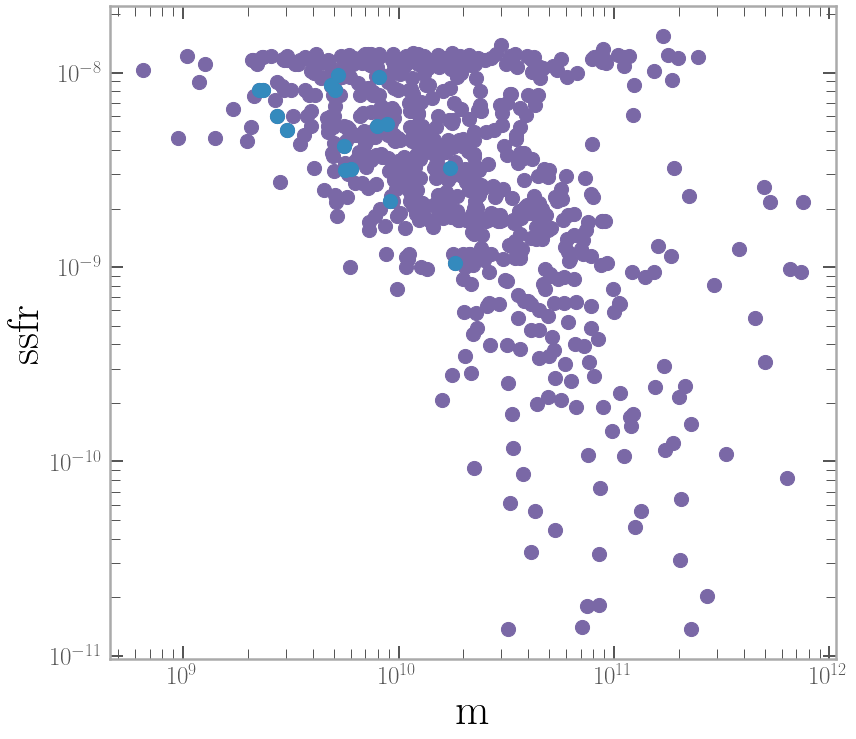

In [33]:
fig,ax=FancyPlot('m','ssfr')
# plt.figure(figsize=(16,10))
ax.scatter(ms3['M'],ms3['sfr2'],zorder=2,s=200)
plt.scatter(FM['M(stars)'],FM['sSFR'],s=200)
ax.set_xscale('log')
ax.set_yscale('log')

In [15]:
MEDIAN1= median(FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['sSFR'])
LOWER1=np.percentile(FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['sSFR'],25)
UPPER1=np.percentile(FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['sSFR'],75)
y_error = np.array([[MEDIAN1-LOWER1],[UPPER1-MEDIAN1]])
# print('medianFM + sSFRyerr'+str(log10(MEDIAN1)),str(log10(y_error)))
MEDIAN1= median(FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['M(stars)'])
LOWER1=np.percentile(FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['M(stars)'],25)
UPPER1=np.percentile(FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['M(stars)'],75)
x_error = np.array([[MEDIAN1-LOWER1],[UPPER1-MEDIAN1]])
# print('medianFM + SMxerr'+str(log10(MEDIAN1)),str(log10(x_error)))
# y_error = np.array([[median - lower_quartile], [upper_quartile - median]])
MEDIAN2= median(C['sSFR'])
LOWER2=np.percentile(C['sSFR'],25)
UPPER2=np.percentile(C['sSFR'],75)
y_error2 = np.array([[MEDIAN2-LOWER2],[UPPER2-MEDIAN2]])
# print('medianC + sSFRyerr'+str(log10(MEDIAN2)),str(log10(y_error2)))
MEDIAN2= median(C['M(stars)'])
LOWER2=np.percentile(C['M(stars)'],25)
UPPER2=np.percentile(C['M(stars)'],75)
x_error2 = np.array([[MEDIAN2-LOWER2],[UPPER2-MEDIAN2]])
# print('medianC + SMxerr'+str(log10(MEDIAN2)),str(log10(x_error2)))
MEDIAN3= median(FMELG['sSFR'])
LOWER3=np.percentile(FMELG['sSFR'],25)
UPPER3=np.percentile(FMELG['sSFR'],75)
y_error3 = np.array([[MEDIAN3-LOWER3],[UPPER3-MEDIAN3]])
# print('medianEELG + sSFRyerr'+str(log10(MEDIAN3)),str(log10(y_error3)))
MEDIAN3= median(FMELG['M(stars)'])
LOWER3=np.percentile(FMELG['M(stars)'],25)
UPPER3=np.percentile(FMELG['M(stars)'],75)
x_error3 = np.array([[MEDIAN3-LOWER3],[UPPER3-MEDIAN3]])
# print('medianEELG + SMxerr'+str(log10(MEDIAN3)),str(log10(x_error3)))
MEDIAN4= median(JS['sSFR'])
LOWER4=np.percentile(JS['sSFR'],25)
UPPER4=np.percentile(JS['sSFR'],75)
y_error4 = np.array([[MEDIAN4-LOWER4],[UPPER4-MEDIAN4]])
# print('medianJS + sSFRyerr'+str(log10(MEDIAN4)),str(log10(y_error4)))
MEDIAN4= median(JS['M(stars)'])
LOWER4=np.percentile(JS['M(stars)'],25)
UPPER4=np.percentile(JS['M(stars)'],75)
x_error4 = np.array([[MEDIAN4-LOWER4],[UPPER4-MEDIAN4]])
# print('medianJS + SMxerr'+str(log10(MEDIAN4)),str(log10(x_error4)))

/tmp/ipykernel_1437732/110957387.py:5: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']


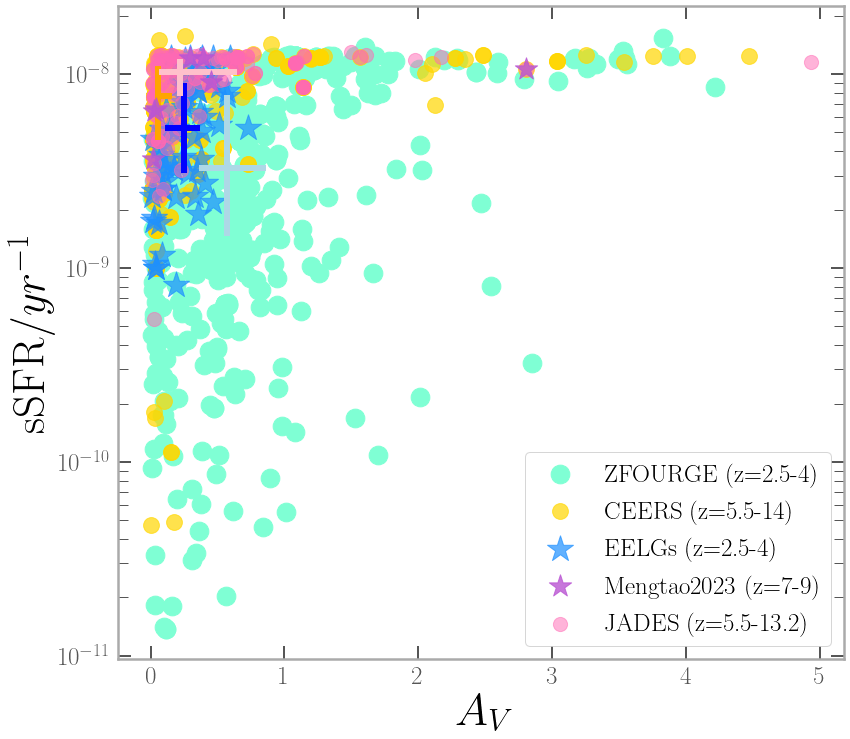

In [294]:
MEDIAN1= median(FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['sSFR'])
LOWER1=np.percentile(FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['sSFR'],25)
UPPER1=np.percentile(FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['sSFR'],75)
y_error = np.array([[MEDIAN1-LOWER1],[UPPER1-MEDIAN1]])
# print('medianFM + sSFRyerr'+str(log10(MEDIAN1)),str(log10(y_error)))
MEDIAN1= median(FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['A_V'])
LOWER1=np.percentile(FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['A_V'],25)
UPPER1=np.percentile(FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['A_V'],75)
x_error = np.array([[MEDIAN1-LOWER1],[UPPER1-MEDIAN1]])
# print('medianFM + SMxerr'+str(log10(MEDIAN1)),str(log10(x_error)))
# y_error = np.array([[median - lower_quartile], [upper_quartile - median]])
MEDIAN2= median(C['sSFR'])
LOWER2=np.percentile(C['sSFR'],25)
UPPER2=np.percentile(C['sSFR'],75)
y_error2 = np.array([[MEDIAN2-LOWER2],[UPPER2-MEDIAN2]])
# print('medianC + sSFRyerr'+str(log10(MEDIAN2)),str(log10(y_error2)))
MEDIAN2= median(C['A_V'])
LOWER2=np.percentile(C['A_V'],25)
UPPER2=np.percentile(C['A_V'],75)
x_error2 = np.array([[MEDIAN2-LOWER2],[UPPER2-MEDIAN2]])
# print('medianC + SMxerr'+str(log10(MEDIAN2)),str(log10(x_error2)))
MEDIAN3= median(FMELG['sSFR'])
LOWER3=np.percentile(FMELG['sSFR'],25)
UPPER3=np.percentile(FMELG['sSFR'],75)
y_error3 = np.array([[MEDIAN3-LOWER3],[UPPER3-MEDIAN3]])
# print('medianEELG + sSFRyerr'+str(log10(MEDIAN3)),str(log10(y_error3)))
MEDIAN3= median(FMELG['A_V'])
LOWER3=np.percentile(FMELG['A_V'],25)
UPPER3=np.percentile(FMELG['A_V'],75)
x_error3 = np.array([[MEDIAN3-LOWER3],[UPPER3-MEDIAN3]])
# print('medianEELG + SMxerr'+str(log10(MEDIAN3)),str(log10(x_error3)))
MEDIAN4= median(JS['sSFR'])
LOWER4=np.percentile(JS['sSFR'],25)
UPPER4=np.percentile(JS['sSFR'],75)
y_error4 = np.array([[MEDIAN4-LOWER4],[UPPER4-MEDIAN4]])
# print('medianJS + sSFRyerr'+str(log10(MEDIAN4)),str(log10(y_error4)))
MEDIAN4= median(JS['A_V'])
LOWER4=np.percentile(JS['A_V'],25)
UPPER4=np.percentile(JS['A_V'],75)
x_error4 = np.array([[MEDIAN4-LOWER4],[UPPER4-MEDIAN4]])
# print('medianJS + SMxerr'+str(log10(MEDIAN4)),str(log10(x_error4)))
mpl.rcParams.update({'font.size': 22})
# plt.style.use('dark_background')
#B.where(B['Galaxy_ID'].isin(FELG['Galaxy_ID'])).dropna()['betaP']
# fig,ax=plt.subplots(figsize=(16,10))
fig,ax=FancyPlot(r'$A_V$',r'sSFR/$yr^{-1}$')
# r'sSFR$_{0.1Gyr}$'
ax.scatter(FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['A_V'],
                          FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['sSFR']
                            ,label='ZFOURGE (z=2.5-4)',s=350,c='aquamarine')#,cmap=cm.Spectral)
ax.errorbar(median(FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['A_V'])
            ,median(FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['sSFR']),xerr=x_error,yerr=y_error,c='aqua',ecolor='lightblue',linewidth=6,zorder=10)

ax.scatter(C['A_V'],C['sSFR'],label='CEERS (z=5.5-14)',s=250,c='gold',alpha=0.7)

ax.errorbar(median(C['A_V']),median(C['sSFR']),xerr=x_error2,yerr=y_error2,c='gold',ecolor='orange',linewidth=6,zorder=10)
ax.scatter(FMELG['A_V'],FMELG['sSFR'],label='EELGs (z=2.5-4)',s=750,c='dodgerblue',marker='*',alpha=0.7)

ax.errorbar(median(FMELG['A_V']),median(FMELG['sSFR']),xerr=x_error3,yerr=y_error3
            ,c='dodgerblue',ecolor='blue',linewidth=6, zorder=10)
ax.errorbar(median(JS['A_V']),median(JS['sSFR']),xerr=x_error4,yerr=y_error4
            ,c='pink',ecolor='pink',linewidth=6, zorder=10)
# plt.scatter(FMELG.where(FMELG['redshift']>3.3)['M(stars)'].dropna(),
#             FMELG.where(FMELG['redshift']>3.3)[r'sSFR$_{0.1Gyr}$'].dropna(),c='dodgerblue',marker='*',s=750)
ax.scatter(MT['A_V'],MT['sSFR'],label='Mengtao2023 (z=7-9)',s=550,c='mediumorchid',marker='*',zorder=10,alpha=0.8)
ax.scatter(JS['A_V'],JS['sSFR'],label='JADES (z=5.5-13.2)',s=200,c='hotpink',marker='o',zorder=3,alpha=0.5)
# plt.colorbar(sc,label='Bluminosity')
# ax.set_xlim(0,5)
plt.legend()
ax.set_yscale('log')
# ax.set_xscale('log')
# fig.savefig('sSFRvsAv.pdf', format='pdf', dpi=600, bbox_inches='tight')

In [34]:

def scale_marker_sizes(data, factor,yes):
#     q25, q75 = np.percentile(data, [25, 75])
    q251, q751 = np.percentile(FM['M(stars)'], [25, 75])
    q252, q752 = np.percentile(MT['M(stars)'], [25, 75])
    q253, q753 = np.percentile(JS['M(stars)'], [25, 75])
    q254, q754 = np.percentile(C['M(stars)'], [25, 75])
    q25 = [q251,q252,q253,q254]
    q75 = [q751,q752,q753,q754]
    iqr = max(q75) - min(q25)
    lower_bound = min(q25) - factor * iqr
    upper_bound = max(q75) + factor * iqr

    # Clip the data within the lower and upper bounds
    data = np.clip(data, lower_bound, upper_bound)

    # Normalize the data to the desired marker size range
    normalized_data = (data - lower_bound) / (upper_bound - lower_bound)
    marker_sizes = 50 + 400 * normalized_data  # Adjust range and scaling factor
    if yes==1:
        marker_sizes = 100 + 700 * normalized_data
    elif yes==2:
        marker_sizes = 400*normalized_data
        
    return marker_sizes




/tmp/ipykernel_48052/110957387.py:5: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']


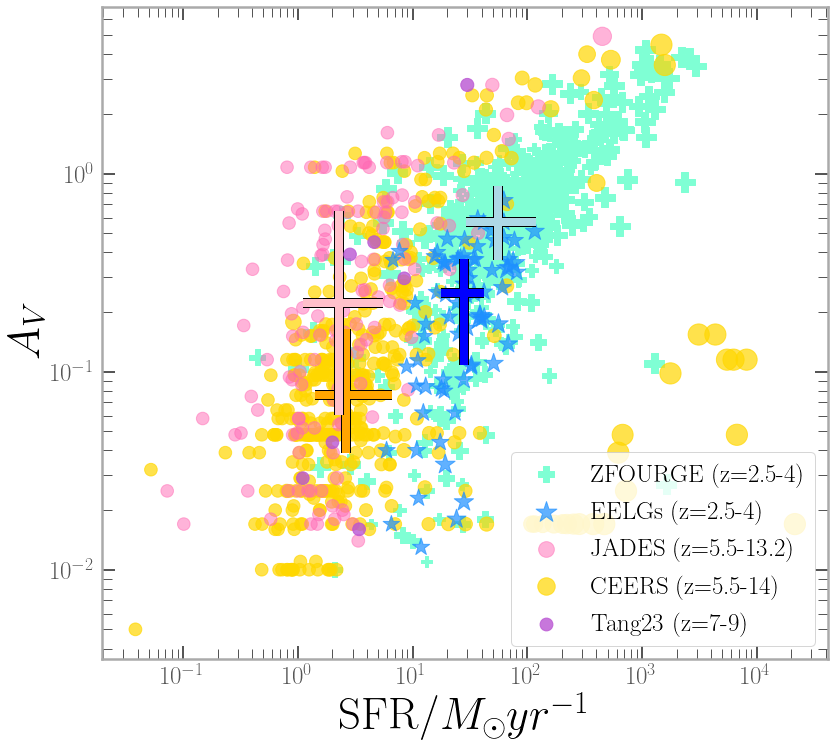

In [35]:
MEDIAN1= median(FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['SFR'])
LOWER1=np.percentile(FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['SFR'],25)
UPPER1=np.percentile(FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['SFR'],75)
y_error = np.array([[MEDIAN1-LOWER1],[UPPER1-MEDIAN1]])
# print('medianFM + sSFRyerr'+str(log10(MEDIAN1)),str(log10(y_error)))
MEDIAN1= median(FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['A_V'])
LOWER1=np.percentile(FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['A_V'],25)
UPPER1=np.percentile(FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['A_V'],75)
x_error = np.array([[MEDIAN1-LOWER1],[UPPER1-MEDIAN1]])
# print('medianFM + SMxerr'+str(log10(MEDIAN1)),str(log10(x_error)))
# y_error = np.array([[median - lower_quartile], [upper_quartile - median]])
MEDIAN2= median(C['SFR'])
LOWER2=np.percentile(C['SFR'],25)
UPPER2=np.percentile(C['SFR'],75)
y_error2 = np.array([[MEDIAN2-LOWER2],[UPPER2-MEDIAN2]])
# print('medianC + sSFRyerr'+str(log10(MEDIAN2)),str(log10(y_error2)))
MEDIAN2= median(C['A_V'])
LOWER2=np.percentile(C['A_V'],25)
UPPER2=np.percentile(C['A_V'],75)
x_error2 = np.array([[MEDIAN2-LOWER2],[UPPER2-MEDIAN2]])
# print('medianC + SMxerr'+str(log10(MEDIAN2)),str(log10(x_error2)))
MEDIAN3= median(FMELG['SFR'])
LOWER3=np.percentile(FMELG['SFR'],25)
UPPER3=np.percentile(FMELG['SFR'],75)
y_error3 = np.array([[MEDIAN3-LOWER3],[UPPER3-MEDIAN3]])
# print('medianEELG + sSFRyerr'+str(log10(MEDIAN3)),str(log10(y_error3)))
MEDIAN3= median(FMELG['A_V'])
LOWER3=np.percentile(FMELG['A_V'],25)
UPPER3=np.percentile(FMELG['A_V'],75)
x_error3 = np.array([[MEDIAN3-LOWER3],[UPPER3-MEDIAN3]])
# print('medianEELG + SMxerr'+str(log10(MEDIAN3)),str(log10(x_error3)))
MEDIAN4= median(JS['SFR'])
LOWER4=np.percentile(JS['SFR'],25)
UPPER4=np.percentile(JS['SFR'],75)
y_error4 = np.array([[MEDIAN4-LOWER4],[UPPER4-MEDIAN4]])
# print('medianJS + sSFRyerr'+str(log10(MEDIAN4)),str(log10(y_error4)))
MEDIAN4= median(JS['A_V'])
LOWER4=np.percentile(JS['A_V'],25)
UPPER4=np.percentile(JS['A_V'],75)
x_error4 = np.array([[MEDIAN4-LOWER4],[UPPER4-MEDIAN4]])
fig,ax=FancyPlot(r'SFR/$M_{\odot} yr^{-1}$',r'$A_V$')

# normalized_mass = (FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['M(stars)'] 
#                    - FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['M(stars)'].min()) / (FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['M(stars)'].max() 
#                                                                                                         - FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['M(stars)'].min())
# marker_sizes = 50 + 400 * normalized_mass
scaled_marker_sizes = scale_marker_sizes(FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['M(stars)'], factor=0.6,yes=2)

ax.scatter(FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['SFR'],
            FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['A_V'],
            label='ZFOURGE (z=2.5-4)', s=scaled_marker_sizes, c='aquamarine',marker='P')  # Swap x and y axes

ax.errorbar(median(FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['SFR']),
            median(FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['A_V']),
            yerr=x_error, xerr=y_error, c='aqua', ecolor='lightblue', linewidth=8, zorder=10)

ax.errorbar(median(FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['SFR']),
            median(FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['A_V']),
            yerr=x_error, xerr=y_error, c='aqua', ecolor='k', linewidth=10, zorder=9)

# normalized_mass = (C['M(stars)']- C['M(stars)'].min()) / (C['M(stars)'].max()- C['M(stars)'].min())
# marker_sizes = 50 + 400 * normalized_mass

scaled_marker_sizes = scale_marker_sizes(FMELG['M(stars)'], factor=0.6,yes=1)  # Adjust the factor as needed
ax.scatter(FMELG['SFR'], FMELG['A_V'], label='EELGs (z=2.5-4)', s=scaled_marker_sizes, c='dodgerblue', marker='*', alpha=0.7,zorder=5)  # Swap x and y axes

scaled_marker_sizes = scale_marker_sizes(JS['M(stars)'], factor=0.6,yes=0)  # Adjust the factor as needed
ax.scatter(JS['SFR'], JS['A_V'], label='JADES (z=5.5-13.2)', s=scaled_marker_sizes, c='hotpink', marker='o', zorder=3, alpha=0.5)

scaled_marker_sizes = scale_marker_sizes(C['M(stars)'], factor=0.6,yes=0)  # Adjust the factor as needed
ax.scatter(C['SFR'], C['A_V'], label='CEERS (z=5.5-14)', s=scaled_marker_sizes, c='gold', alpha=0.7)  # Swap x and y axes

ax.errorbar(median(C['SFR']), median(C['A_V']), yerr=x_error2, xerr=y_error2, c='gold', ecolor='orange', linewidth=8, zorder=10)
ax.errorbar(median(C['SFR']), median(C['A_V']), yerr=x_error2, xerr=y_error2, c='gold', ecolor='k', linewidth=10, zorder=9)

# normalized_mass = (FMELG['M(stars)']- FMELG['M(stars)'].min()) / (FMELG['M(stars)'].max()- FMELG['M(stars)'].min())
# marker_sizes = 50 + 400 * normalized_mass



ax.errorbar(median(FMELG['SFR']), median(FMELG['A_V']), yerr=x_error3, xerr=y_error3,
            c='dodgerblue', ecolor='blue', linewidth=8, zorder=10)
ax.errorbar(median(FMELG['SFR']), median(FMELG['A_V']), yerr=x_error3, xerr=y_error3,
            c='dodgerblue', ecolor='k', linewidth=10, zorder=9)
ax.errorbar(median(JS['SFR']), median(JS['A_V']), yerr=x_error4, xerr=y_error4,
            c='pink', ecolor='k', linewidth=10, zorder=10)
ax.errorbar(median(JS['SFR']), median(JS['A_V']), yerr=x_error4, xerr=y_error4,
            c='pink', ecolor='pink', linewidth=8, zorder=10)

# normalized_mass = (MT['M(stars)']- MT['M(stars)'].min()) / (MT['M(stars)'].max()- MT['M(stars)'].min())
# marker_sizes = 50 + 400 * normalized_mass
scaled_marker_sizes = scale_marker_sizes(MT['M(stars)'], factor=0.6,yes=0)  # Adjust the factor as needed

ax.scatter(MT['SFR'], MT['A_V'], label='Tang23 (z=7-9)', s=scaled_marker_sizes, c='mediumorchid', marker='o', zorder=10, alpha=0.8)

# normalized_mass = (JS['M(stars)']- JS['M(stars)'].min()) / (JS['M(stars)'].max()- JS['M(stars)'].min())
# marker_sizes = 50 + 400 * normalized_mass
plt.legend(loc='best')
ax.set_xscale('log')
ax.set_yscale('log')

fig.savefig('SFRvsAV-updated.pdf', format='pdf', dpi=600, bbox_inches='tight')

In [369]:
MEDIAN_age_C= median(log10(FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['M(stars)']))
LOWER_age_C=np.percentile(log10(FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['M(stars)']),25)
UPPER_age_C=np.percentile(log10(FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['M(stars)']),75)



print((MEDIAN_age_C))

print('upper')
print((UPPER_age_C)-(MEDIAN_age_C))

print('lower')
print((MEDIAN_age_C)-(LOWER_age_C))

# print((y_error1))

10.323559395893117
upper
0.3157277957060671
lower
0.2877301223157609


In [381]:
MEDIAN_age_C= median(C['metals'])
LOWER_age_C=np.percentile(C['metals'],25)
UPPER_age_C=np.percentile(C['metals'],75)



print((MEDIAN_age_C))

print('upper')
print((UPPER_age_C)-(MEDIAN_age_C))

print('lower')
print((MEDIAN_age_C)-(LOWER_age_C))


0.164
upper
0.567
lower
0.083


/tmp/ipykernel_48052/110957387.py:5: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']


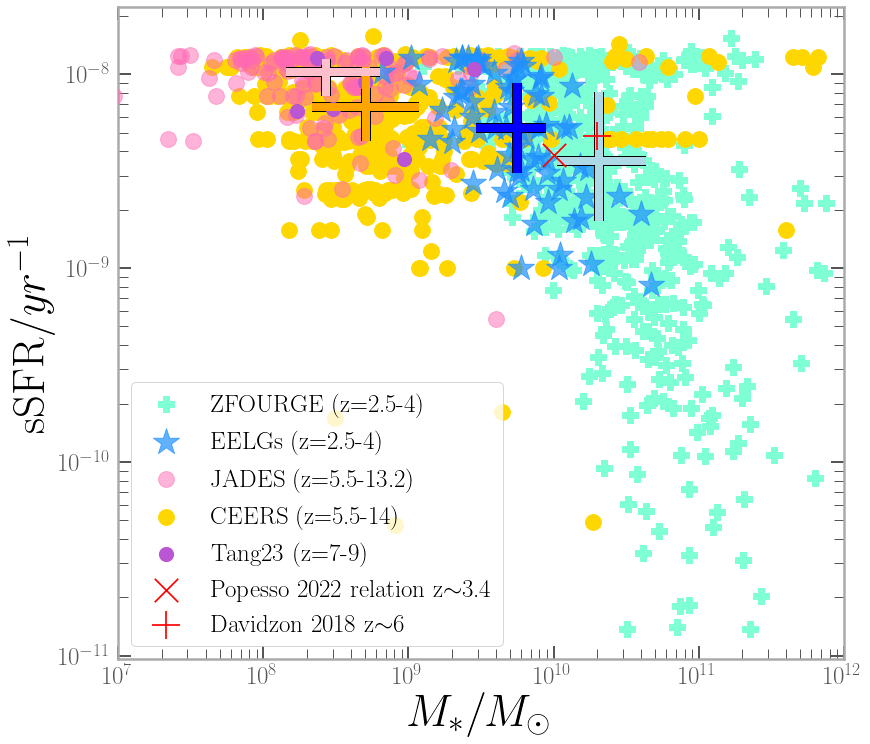

In [27]:
mpl.rcParams.update({'font.size': 22})
# plt.style.use('dark_background')
#B.where(B['Galaxy_ID'].isin(FELG['Galaxy_ID'])).dropna()['betaP']
# fig,ax=plt.subplots(figsize=(16,10))
fig,ax=FancyPlot(r'$M_{*}/M_\odot$',r'sSFR/$yr^{-1}$')
# r'sSFR$_{0.1Gyr}$'
ax.scatter(FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['M(stars)'],
                          FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['sSFR']
                            ,label='ZFOURGE (z=2.5-4)',s=250,c='aquamarine',marker='P')#,cmap=cm.Spectral)
ax.errorbar(20695000000.0,3.568e-09,xerr=x_error,yerr=y_error,c='aqua',ecolor='lightblue',linewidth=8,zorder=10)
ax.errorbar(20695000000.0,3.568e-09,xerr=x_error,yerr=y_error,c='aqua',ecolor='k',linewidth=10,zorder=9)



ax.errorbar(median(C['M(stars)']),median(C['sSFR']),xerr=x_error2,yerr=y_error2,c='gold',ecolor='orange',linewidth=8,zorder=11)
ax.errorbar(median(C['M(stars)']),median(C['sSFR']),xerr=x_error2,yerr=y_error2,c='gold',ecolor='k',linewidth=10,zorder=10)

ax.scatter(FMELG['M(stars)'],FMELG['sSFR'],label='EELGs (z=2.5-4)',s=750,c='dodgerblue',marker='*',alpha=0.7,zorder=5)
ax.scatter(JS['M(stars)'],JS['sSFR'],label='JADES (z=5.5-13.2)',s=250,c='hotpink',marker='o',zorder=3, alpha=0.5)

ax.scatter(C['M(stars)'],C['sSFR'],label='CEERS (z=5.5-14)',s=250,c='gold')
ax.errorbar(median(FMELG['M(stars)']),median(FMELG['sSFR']),xerr=x_error3,yerr=y_error3
            ,c='dodgerblue',ecolor='blue',linewidth=8, zorder=10)
ax.errorbar(median(FMELG['M(stars)']),median(FMELG['sSFR']),xerr=x_error3,yerr=y_error3
            ,c='dodgerblue',ecolor='k',linewidth=10, zorder=9)
ax.errorbar(median(JS['M(stars)']),median(JS['sSFR']),xerr=x_error4,yerr=y_error4
            ,c='k',ecolor='k',linewidth=10, zorder=10)
ax.errorbar(median(JS['M(stars)']),median(JS['sSFR']),xerr=x_error4,yerr=y_error4
            ,c='pink',ecolor='pink',linewidth=8, zorder=11)

# plt.scatter(FMELG.where(FMELG['redshift']>3.3)['M(stars)'].dropna(),
#             FMELG.where(FMELG['redshift']>3.3)[r'sSFR$_{0.1Gyr}$'].dropna(),c='dodgerblue',marker='*',s=750)
ax.scatter(MT['M(stars)'],MT['sSFR'],label='Tang23 (z=7-9)',s=200,c='mediumorchid',marker='o',zorder=10)
# plt.colorbar(sc,label='Bluminosity')
ax.set_xlim(10**7,10**12)
plt.scatter([10**10],
            [10**-8.41659350450056],zorder=20,c='red',s=550,label='Popesso 2022 relation z$\sim$3.4',marker='x')
plt.scatter([10**10.3],
            [10**-8.32],zorder=20,c='red',s=750,label='Davidzon 2018 z$\sim$6',marker='+')
plt.legend()
ax.set_yscale('log')
ax.set_xscale('log')


fig.savefig('sSFRvsSM-updated.pdf', format='pdf', dpi=600, bbox_inches='tight')

In [92]:
10**2/10**10.3

5.011872336272715e-09

In [ ]:
# BFMIGMELG[BFMIGMELG['sion']==min(BFMIGMELG['sion'])]
# FMELG.where(FMELG['Galaxy_ID']==23511).dropna()['M(stars)']

/tmp/ipykernel_952475/110957387.py:5: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']


/home/magnus/notebook/Forrest/


/home/magnus/notebook/jupyterenv/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/magnus/notebook/jupyterenv/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


Text(0, 0.5, 'sion')

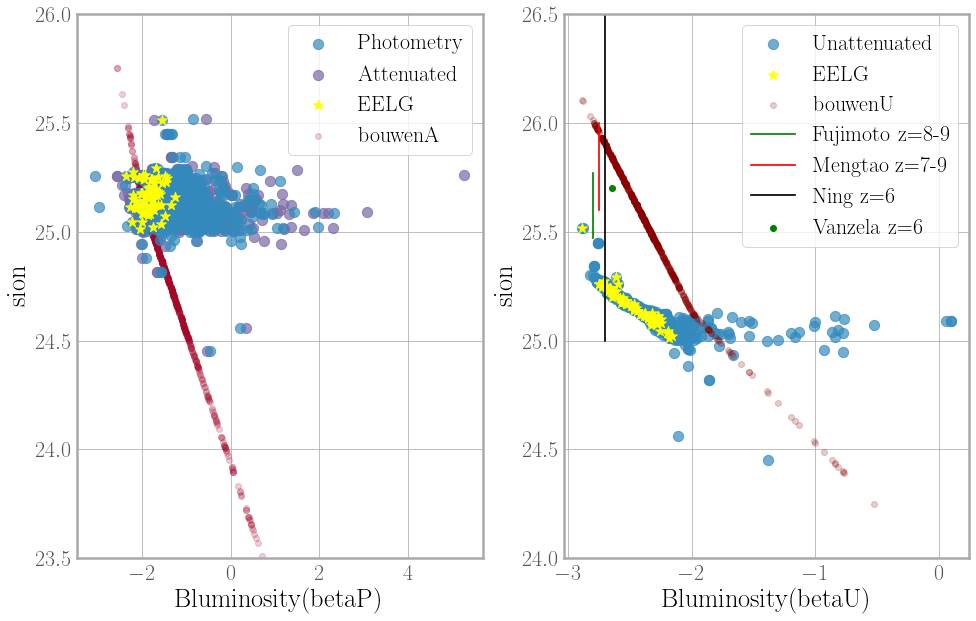

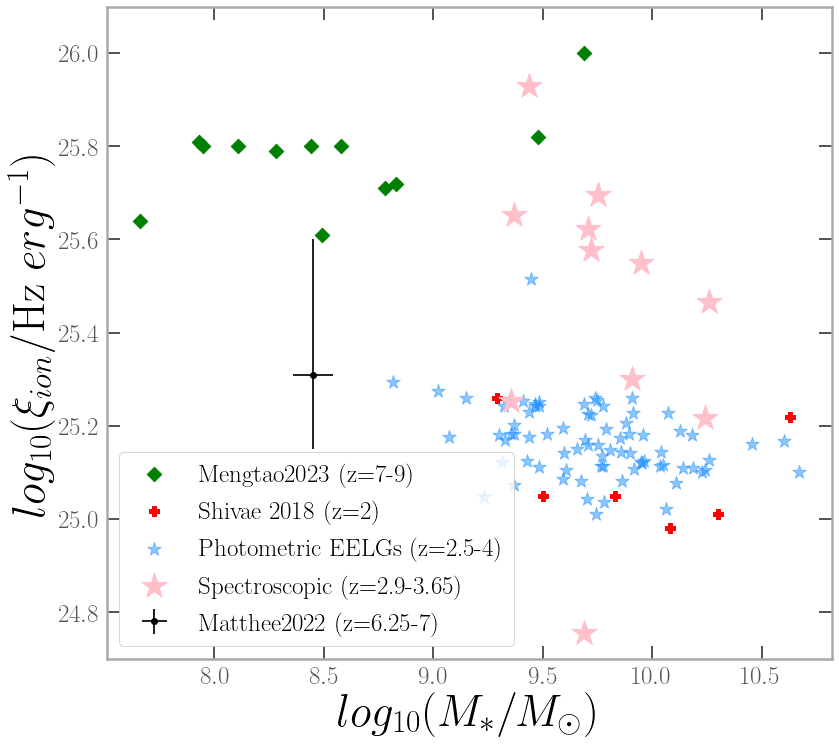

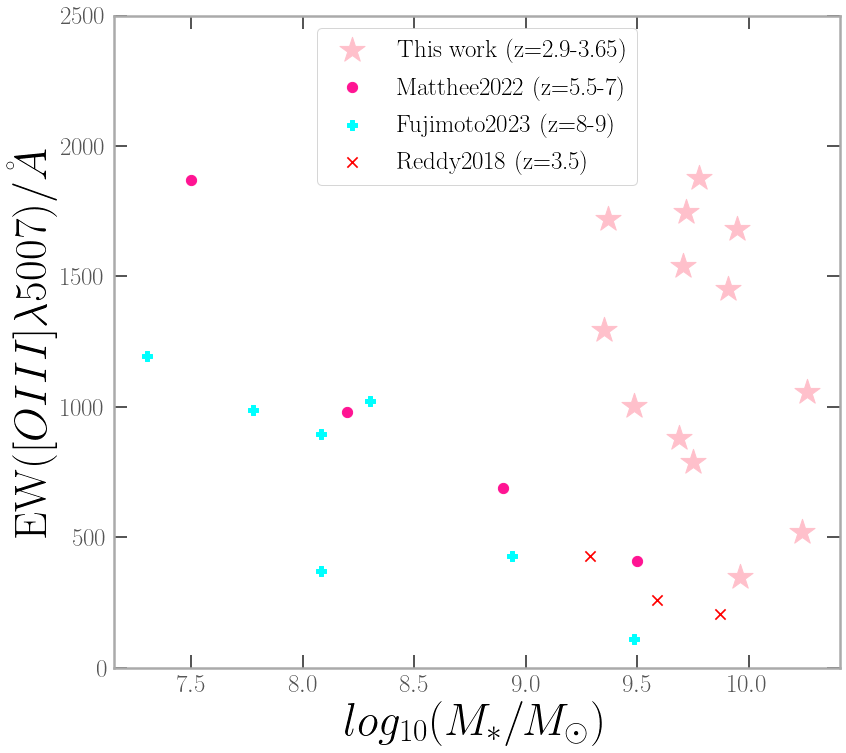

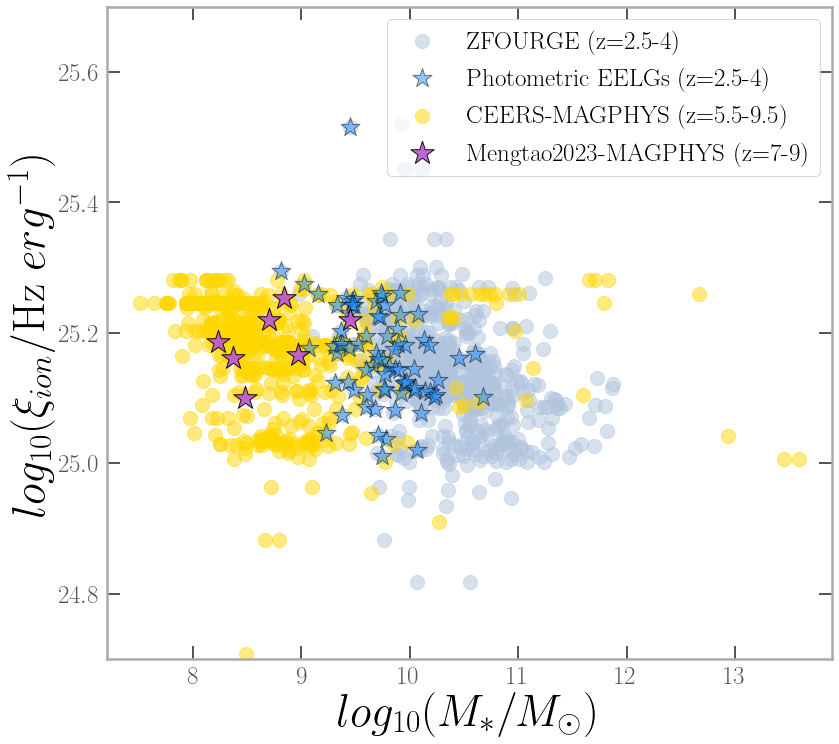

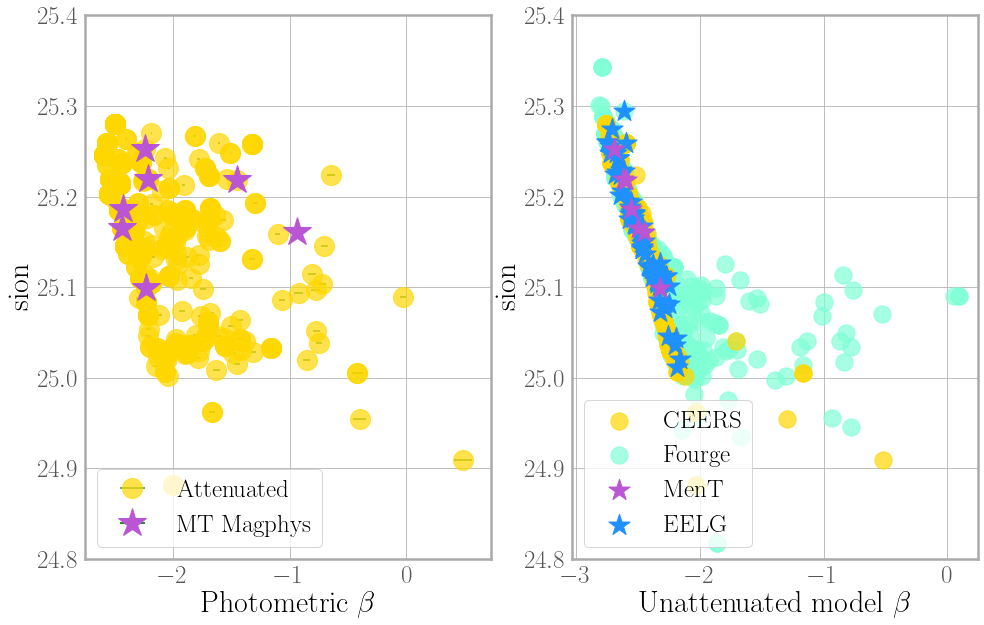

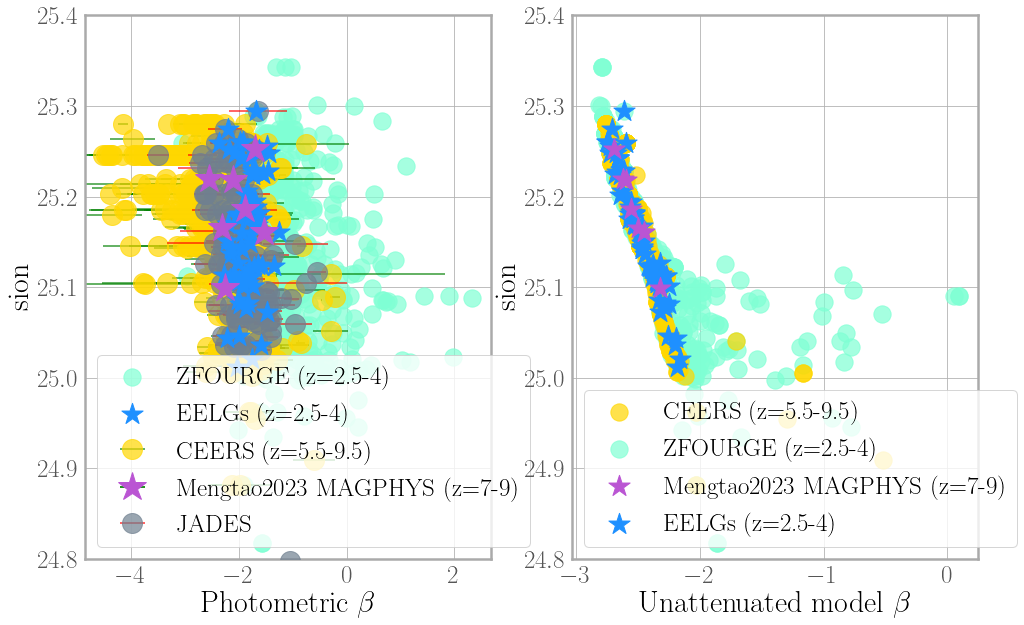

In [9]:
mpl.rcParams.update({'font.size': 22})

fig,ax=plt.subplots(1,2,figsize=(16,10))

# sc=plt.scatter(B['betaP'],B['sion'],label='integrated sion',s=105,c=B['betaU'], alpha=0.7)
# plt.colorbar(sc,label='Unattenuated beta')
ax[0].scatter(BFM['betaP'],BFM['sion'],label='Photometry',s=105, alpha=0.7,zorder=2)
ax[0].scatter(BFM['beta'],BFM['sion'],label='Attenuated',s=105, alpha=0.7)
# plt.scatter(B['betaU'],B['sion'],label='Unattenuated',s=105, alpha=0.7)
ax[0].scatter(BFMELG['betaP'],BFMELG['sion'],marker='*',s=105,c='yellow', label='EELG',zorder=3)
# plt.scatter(B['betaU'],B['bouwen'],label='bouwen')
ax[0].scatter(BFM['beta'],BFM['bouwenA'],label='bouwenA',alpha=0.2)
# plt.scatter(B['beta'],B['sion'],label='integrated sion',s=105,c='pink')
# plt.scatter(F[r'$SFR_{0.1Gyr}$'],B['betaP'],label='photometry')
ax[0].legend()
ax[0].set_xlabel('Bluminosity(betaP)')
ax[0].set_ylabel('sion')
ax[0].set_ylim(23.5,26)
# ax.set_xscale('log')
ax[1].scatter(BFM['betaU'],BFM['sion'],label='Unattenuated',s=105, alpha=0.7)
ax[1].scatter(BFMELG['betaU'],BFMELG['sion'],marker='*',s=105,c='yellow', label='EELG')
ax[1].scatter(BFM['betaU'],BFM['bouwen'],label='bouwenU',alpha=0.2,c='darkred')
# ax[1].scatter(B['beta'],B['bouwenA'],label='bouwenA',alpha=0.2,c='red')
ax[1].plot(linspace(-2.8,-2.8,10),linspace(25.47,25.77,10),c='g',label='Fujimoto z=8-9')
ax[1].plot(linspace(-2.75,-2.75,10),linspace(25.6,26,10),c='r',label='Mengtao z=7-9')
ax[1].plot(linspace(-2.7,-2.7,10),linspace(25,26.5,10),c='k',label='Ning z=6')
ax[1].scatter(-2.65,25.7,c='g',label='Vanzela z=6')

ax[1].legend()
ax[1].set_xlabel('Bluminosity(betaU)')
ax[1].set_ylabel('sion')
ax[1].set_ylim(24,26.5)

# ax.set_xlim(0,10**3)
# ax.set_ylim(-3,1)

# fig,ax=plt.subplots(1,2,figsize=(16,10))
# plt.title('krem')
# # sc=plt.scatter(B['betaP'],B['sion'],label='integrated sion',s=105,c=B['betaU'], alpha=0.7)
# # plt.colorbar(sc,label='Unattenuated beta')
# ax[0].scatter(BFMIGM['betaP'],BFMIGM['sion'],label='Photometry',s=105, alpha=0.7,zorder=2)
# ax[0].scatter(BFMIGM['beta'],BFMIGM['sion'],label='Attenuated',s=105, alpha=0.7)
# # plt.scatter(B['betaU'],B['sion'],label='Unattenuated',s=105, alpha=0.7)
# ax[0].scatter(BFMIGMELG['betaP'],BFMIGMELG['sion'],marker='*',s=105,c='yellow', label='EELG',zorder=3)
# # plt.scatter(B['betaU'],B['bouwen'],label='bouwen')
# ax[0].scatter(BFMIGM['beta'],BFMIGM['bouwenA'],label='bouwenA',alpha=0.2)
# # plt.scatter(B['beta'],B['sion'],label='integrated sion',s=105,c='pink')
# # plt.scatter(F[r'$SFR_{0.1Gyr}$'],B['betaP'],label='photometry')
# ax[0].legend()
# ax[0].set_xlabel('Bluminosity(betaP)')
# ax[0].set_ylabel('sion')
# ax[0].set_ylim(23.5,26)
# # ax.set_xscale('log')
# ax[1].scatter(BFMIGM['betaU'],BFMIGM['sion'],label='Unattenuated',s=105, alpha=0.7)
# ax[1].scatter(BFMIGMELG['betaU'],BFMIGMELG['sion'],marker='*',s=105,c='yellow', label='EELG')
# ax[1].scatter(BFMIGM['betaU'],BFMIGM['bouwen'],label='bouwenU',alpha=0.2,c='darkred')
# # ax[1].scatter(B['beta'],B['bouwenA'],label='bouwenA',alpha=0.2,c='red')

# ax[1].legend()
# ax[1].set_xlabel('Bluminosity(betaU)')
# ax[1].set_ylabel('sion')
# # ax.set_xlim(0,10**3)
# ax[1].set_ylim(24,26)

# fig,ax=plt.subplots(1,2,figsize=(16,10))
# ax[0].scatter(BFIGM['betaP'],BFMIGM['sion'],label='full set',s=105, alpha=0.7)
# ax[0].scatter(BFMIGM['betaP'],BFMIGM['sion'],label='krem',s=105, alpha=0.7)
# ax[0].legend()
# ax[1].scatter(BFMIGM['betaU'],BFMIGM['sion'],label='full set',s=105, alpha=0.7)
# ax[1].scatter(BFIGM['betaU'],BFIGM['sion'],label='krem',s=105, alpha=0.7)
# ax[1].legend()

# fig,ax=plt.subplots(1,2,figsize=(16,10))
# ax[0].scatter(BFIGM['sion'],BFMIGM['sion'],label='full set',s=105, alpha=0.7)
# ax[0].set_ylabel('removed sion')
# ax[0].set_xlabel('included sion')
# ax[0].plot(linspace(24,27,10),linspace(24,27,10))
# # ax[0].scatter(BFMIGM['betaP'],BFMIGM['sion'],label='krem',s=105, alpha=0.7)
# ax[0].legend()

# ax[1].scatter(BFIGMELG['sion'],BFMIGMELG['sion'],label='full set',s=105, alpha=0.7)
# ax[1].set_ylabel('removed sion')
# ax[1].set_xlabel('included sion')
# ax[1].plot(linspace(24,26,10),linspace(24,26,10))
# # ax[1].scatter(BFMIGM['betaU'],BFMIGM['sion'],label='full set',s=105, alpha=0.7)
# # ax[1].scatter(BFIGM['betaU'],BFIGM['sion'],label='krem',s=105, alpha=0.7)
# # ax[1].legend()


fig,ax=FancyPlot(r'$log_{10}(M_{*}/M_\odot)$',r'$log_{10}(\xi_{ion}$/Hz $erg^{-1})$')
ax.scatter([8.58,8.78,8.44,9.69,8.49,8.28,9.48,7.95,7.93,7.66,8.83,8.11]
           ,[25.8,25.71,25.8,26,25.61,25.79,25.82,25.8,25.81,25.64,25.72,25.8],s=105,c='g', marker='D' ,label='Mengtao2023 (z=7-9)')
# ax.scatter(6,25.7,s=105,c='b',label='Vanzella')
ymin=np.array([25.15])
ymax=np.array([25.6])
ax.errorbar(8.45,25.31,xerr=(0.09), yerr=(25.31-ymin,ymax-25.31), fmt='o', label='Matthee2022 (z=6.25-7)',c='k')
ymin=np.array([25.77-0.43])
ymax=np.array([25.77+0.5])
xmin = np.array([log10(0.2*10**8)])
xmax = np.array([log10(30.6*10**8)])

ax.scatter([10.63,10.30,10.08,9.83,9.50,9.29],[25.22,25.01,24.98,25.05,25.05,25.26]
           ,s=105,c='r', marker='P' ,label='Shivae 2018 (z=2)')
# ax.scatter(log10(FM['M(stars)'].where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'].dropna()))),
#            BFMIGM['sion'].where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'].dropna())), s=200, alpha=0.5)
ax.scatter(log10(FMELG['M(stars)']),BFMELG['sion'],c='dodgerblue',marker='*',s=200,
           alpha = 0.5, label='Photometric EELGs (z=2.5-4)')
ax.scatter(log10(ms3['M(stars)']),ms3['spec_sion'],s=700,c='pink',label='Spectroscopic (z=2.9-3.65)', marker='*')
mask = ms['Galaxy_ID']==12533
mask2 = ms['Galaxy_ID']==15992
mask3 = ms['Galaxy_ID']==21896
mask4 = ms['Galaxy_ID']==22839
print(path)
# plt.scatter((ms3['Mass'][mask+mask2+mask3+mask4]),ms3['spec_sion'][mask+mask2+mask3+mask4], marker='*', s=750, facecolors='none', edgecolors='k')
ax.legend(loc=3)
ax.set_ylim(24.7,26.1)
# ax.set_ylabel()
# ax.set_xlabel()
# fig.savefig(path+'sion_eelgs.pdf', format='pdf', dpi=600, bbox_inches='tight')
fig,ax=FancyPlot(r'$log_{10}(M_{*}/M_\odot)$',r'EW($[OIII]\lambda5007)/\AA$')
ax.scatter(log10(ms3['M(stars)']),crap['o3_ew'],marker='*',s=700,c='pink',label='This work (z=2.9-3.65)')
# ax.scatter((ms3['Mass'][mask+mask2+mask3+mask4]),crap['o3_ew'][mask+mask2+mask3+mask4], marker='*',s=750, facecolor='none', edgecolor='k')
ax.scatter([7.5,8.2,8.9,9.5],[1870,980,690,410],marker='o',s=105,c='deeppink',label='Matthee2022 (z=5.5-7)')
# ax.scatter([8.58,8.78,8.44,9.69,8.49,8.28,9.48,7.95,7.93,7.66,8.83,8.11],
#            [2085,1175,1787,2599,879,3276,2564,2650,2840,1045,1786,1902], marker='D',s=105, c='g', label='Mengtao2023 (z=7-9)')
ax.scatter(log10([1.2*10**8,2.0*10**8,8.7*10**8,1.2*10**8,30.6*10**8,0.2*10**8,0.6*10**8])
           ,[372,1022,430,895,109,1195,989],c='aqua',marker='P',s=105,label='Fujimoto2023 (z=8-9)')
# ax.errorbar(8.45,2.)
ax.scatter([9.87, 9.59,9.29],[207.20, 258.06, 428.86],c='r',marker='x',s=105,label='Reddy2018 (z=3.5)')

ax.set_ylim(0,2500)
ax.legend()
# fig.savefig(path+'o3_ew_eelgs.pdf', format='pdf', dpi=600, bbox_inches='tight')
#####################################################################################################
fig,ax=FancyPlot(r'$log_{10}(M_{*}/M_\odot)$',r'$log_{10}(\xi_{ion}$/Hz $erg^{-1})$')
# ax.scatter([8.58,8.78,8.44,9.69,8.49,8.28,9.48,7.95,7.93,7.66,8.83,8.11]
#            ,[25.8,25.71,25.8,26,25.61,25.79,25.82,25.8,25.81,25.64,25.72,25.8],s=105,c='g',
#            marker='D' ,label='Mengtao2023 (z=7-9)')
# ax.scatter(6,25.7,s=105,c='b',label='Vanzella')

# ax.scatter(log10(FM['M(stars)'].where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'].dropna()))),
#            BFMIGM['sion'].where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'].dropna())), s=200, alpha=0.5)
ax.scatter(log10(FM['M(stars)']),BFM['sion'],c='lightsteelblue',marker='o',s=200,
           alpha = 0.5, label='ZFOURGE (z=2.5-4)',zorder=1)
ax.scatter(log10(FMELG['M(stars)']),BFMELG['sion'],c='dodgerblue',marker='*',s=400,
           alpha = 0.5, label='Photometric EELGs (z=2.5-4)',ec='k',zorder=3)

# ax.scatter(log10(ms3['M(stars)']),ms3['spec_sion'],s=700,c='pink',label='Spectroscopic EELGs(z=2.9-3.65)', marker='*')

ax.scatter(log10(C['M(stars)']),C['sion'],c='gold',marker='o',s=200,
           alpha = 0.5, label='CEERS-MAGPHYS (z=5.5-9.5)',zorder=2)
ax.scatter(log10(MT['M(stars)']),MT['sion'],c='mediumorchid',marker='*',s=600,
           alpha = 0.9, label='Mengtao2023-MAGPHYS (z=7-9)',ec='k',zorder=4)
# plt.scatter((ms3['Mass'][mask+mask2+mask3+mask4]),ms3['spec_sion'][mask+mask2+mask3+mask4], marker='*', s=750, facecolors='none', edgecolors='k')
ax.legend()
ax.set_ylim(24.7,25.7)
# ax.set_ylabel()
# ax.set_xlabel()
fig.savefig(path+'sion_eelgs.pdf', format='pdf', dpi=600, bbox_inches='tight')
fig,ax=plt.subplots(1,2,figsize=(16,10))

ax[0].errorbar(BC['beta'],BC['sion'],xerr=BC['beta_er'],label='Attenuated',fmt='o',markersize=20,ecolor='green', alpha=0.7,zorder=2,c='gold')
# ax[0].scatter(BC['beta'],BC4IGM['sion'],label='Attenuated',s=300, alpha=0.7,zorder=1,c='purple')
ax[0].errorbar(BMT['beta'],BMT['sion'],xerr=BMT['beta_er'],fmt='*',ecolor='green',markersize=30, label='MT Magphys',zorder=4,c='mediumorchid')
# ax[0].scatter(BMT['beta'],BMTIGM['sion'],label='MT Magphys atn',marker='*',s=500,zorder=3,c='red')
ax[0].legend(loc=3)
ax[0].set_ylim(24.8,25.4)
ax[0].set_xlabel(r'Photometric $\beta$')
ax[0].set_ylabel('sion')
# # ax[0].set_ylim(23.5,26)
# # ax.set_xscale('log')
ax[1].scatter(BC['betaU'],BC['sion'],label='CEERS',s=300, alpha=0.7,zorder=2,c='gold')
ax[1].scatter(BFM['betaU'],BFM['sion'],label='Fourge',s=300, alpha=0.7,zorder=1,c='aquamarine')
ax[1].scatter(BMT['betaU'],BMT['sion'],marker='*',s=500, label='MenT',zorder=4,c='mediumorchid')
ax[1].scatter(BFMELG['betaU'],BFMELG['sion'],label='EELG',marker='*',s=500,zorder=3,c='dodgerblue')
ax[1].legend(loc=3)
ax[1].set_ylim(24.8,25.4)
ax[1].set_xlabel(r'Unattenuated model $\beta$')
ax[1].set_ylabel('sion')

# ax[1].legend()
# ax[1].set_xlabel('Bluminosity(betaU)')
# ax[1].set_ylabel('sion')
# # ax[1].set_ylim(24,26.5)

fig.savefig(path+'sion_eelgs.pdf', format='pdf', dpi=600, bbox_inches='tight')
fig,ax=plt.subplots(1,2,figsize=(16,10))

ax[0].errorbar(BC['betaP'],BC['sion'],xerr=BC['betaP_er'],label='CEERS (z=5.5-9.5)',markersize=20,fmt='o',
               ecolor='green', alpha=0.7,zorder=2,c='gold')
# ax[0].scatter(BC['beta'],BC4IGM['sion'],label='Attenuated',s=300, alpha=0.7,zorder=1,c='purple')
ax[0].scatter(BFM['betaP'],BFM['sion'],label='ZFOURGE (z=2.5-4)',s=300, alpha=0.7,zorder=1,c='aquamarine')
ax[0].errorbar(BMT['betaP'],BMT['sion'],xerr=BMT['beta_er'],fmt='*',ecolor='green',
               markersize=30, label='Mengtao2023 MAGPHYS (z=7-9)',zorder=5,c='mediumorchid')
ax[0].scatter(BFMELG['betaP'],BFMELG['sion'],label='EELGs (z=2.5-4)',marker='*',s=500,zorder=4,c='dodgerblue')
ax[0].errorbar(JSN['betaP'],JSN['sion'],xerr=JSN['betaP_er'],label='JADES',markersize=20,fmt='o',
              ecolor='red',alpha=0.7,zorder=3,c='slategray')
# ax[0].scatter(BMT['beta'],BMTIGM['sion'],label='MT Magphys atn',marker='*',s=500,zorder=3,c='red')
ax[0].legend(loc=3)
ax[0].set_ylim(24.8,25.4)
ax[0].set_xlabel(r'Photometric $\beta$')
ax[0].set_ylabel('sion')
# # ax[0].set_ylim(23.5,26)
# # ax.set_xscale('log')
ax[1].scatter(BC['betaU'],BC['sion'],label='CEERS (z=5.5-9.5)',s=300, alpha=0.7,zorder=2,c='gold')
ax[1].scatter(BFM['betaU'],BFM['sion'],label='ZFOURGE (z=2.5-4)',s=300, alpha=0.7,zorder=1,c='aquamarine')
ax[1].scatter(BMT['betaU'],BMT['sion'],marker='*',s=500, label='Mengtao2023 MAGPHYS (z=7-9)',zorder=4,c='mediumorchid')
ax[1].scatter(BFMELG['betaU'],BFMELG['sion'],label='EELGs (z=2.5-4)',marker='*',s=500,zorder=3,c='dodgerblue')
ax[1].legend(loc=3)
ax[1].set_ylim(24.8,25.4)
ax[1].set_xlabel(r'Unattenuated model $\beta$')
ax[1].set_ylabel('sion')

In [48]:
jadesspec=pd.read_csv(os.path.expanduser('~/notebook/Laptop/specsions_jades.csv'))
jadesspec=pd.merge(jadesspec,JS,left_on='NIRCam_ID',right_on='Galaxy_ID')
jadesspec

Unnamed: 0  NIRSpec_ID  NIRCam_ID    RA_TARG   Dec_TARG  RA_NIRCam  \
0           11        4404     101990  53.115372 -27.814771  53.115379   
1           12        6002     106292  53.110411 -27.808923  53.110417   
2           13        9422     113585  53.121755 -27.797634  53.121757   
3           14       16625     127219  53.169042 -27.778838  53.169047   
4           15       16745     208642  53.130023 -27.778392  53.130051   
5           16       18846     131688  53.134917 -27.772709  53.134918   
6           17       18976     131971  53.166601 -27.772403  53.166602   
7           18       22251     138571  53.154069 -27.766072  53.154072   
8           21    10013704     197348  53.126535 -27.818092  53.126538   
9           24       17566     209276  53.156128 -27.775841  53.156101   
10          26       19606     210963  53.176550 -27.771108  53.176568   
11          28        4297     101683  53.155788 -27.815202  53.155794   
12          41       19342     132780  53.160620 -27.771613  53.160623   
13          42       20961     135819  53.134229 -27.768913  53.134230   
14          43       21842     137667  53.156825 -27.767159  53.156827   
15          44    10005113     110319  53.167303 -27.802870  53.167302   
16          58        6246     106885  53.129722 -27.808177  53.129726   

    Dec_NIRCam  Priority  z_Spec z_Spec_flag  x_offset  y_offset  nexp_Prism  \
0   -27.814774       4.0   5.763           A    -0.088    -0.161          72   
1   -27.808924       4.0   5.937           A     0.026     0.036          72   
2   -27.797638       4.0   5.936           A    -0.032    -0.139          72   
3   -27.778834       4.0   6.631           A     0.059    -0.026          72   
4   -27.778389       4.0   5.567           A    -0.020     0.163          72   
5   -27.772711       4.0   6.335           A    -0.044    -0.168          72   
6   -27.772402       4.0   6.327           A    -0.015    -0.202          72   
7   -27.766072       4.0   5.798           A    -0.009    -0.173          48   
8   -27.818090       4.0   5.920           A    -0.045     0.120          48   
9   -27.775881       4.0   6.102           A     0.077     0.120          48   
10  -27.771131       4.0   5.889           A     0.045    -0.031          24   
11  -27.815209       4.0   6.713           A    -0.024     0.018          24   
12  -27.771611       6.1   5.974           A    -0.045    -0.183          72   
13  -27.768916       6.1   7.045           A    -0.073     0.109          48   
14  -27.767162       6.1   7.980           A     0.037     0.081          72   
15  -27.802874       6.1   5.821           A     0.064     0.030          72   
16  -27.808180       7.5   5.562           A    -0.023     0.128          72   

    nexp_R1000  pre_JWST_priority  z_R1000  LyA_1216_flux  LyA_1216_err  \
0           18                7.5    5.764            NaN           NaN   
1           18                4.0    5.937         301.40         42.14   
2           18                4.0    5.936        1035.62         60.15   
3           18                4.0    6.631         211.38         38.49   
4           18                4.0    5.567            NaN           NaN   
5           18                8.2    6.335         823.94         45.73   
6           18                4.0    6.327            NaN           NaN   
7           12                4.0    5.798            NaN           NaN   
8           12                4.0    5.920            NaN           NaN   
9           12                4.0    6.102            NaN           NaN   
10           6                4.0    5.889            NaN           NaN   
11           6                NaN    6.713         308.96         51.86   
12          18                4.0    5.974            NaN           NaN   
13          12                NaN    7.044            NaN           NaN   
14          18                4.0    7.980            NaN           NaN   
15          18                

In [66]:
ms3

Galaxy_ID  redshift    sfh  IR fmu     mu  tau_V          sSFR  \
0       10936   3.60400  0.333   0.463  0.936  0.336  3.199000e-09   
1       11999   3.60300  0.378   0.463  0.958  0.479  5.448000e-09   
2       12533   3.56800  0.440   0.463  0.799  0.037  1.055000e-09   
3       13155   3.06400  0.369   0.463  0.981  0.355  5.091000e-09   
4       13203   3.56300  0.291   0.463  0.023  0.467  8.583000e-09   
5       15111   2.98700  0.454   0.463  0.965  0.439  2.194000e-09   
6       15357   2.61269  0.277   0.463  0.929  0.059  4.217000e-09   
7       15992   3.65300  0.343   0.463  0.920  0.425  9.520000e-09   
8       18742   3.43600  0.058   0.169  0.061  0.733  8.154000e-09   
9       19437   3.51017  0.326   0.463  0.905  0.375  5.991000e-09   
10      19843   3.43100  0.058   0.169  0.061  0.733  8.154000e-09   
11      21896   3.43800  0.192   0.278  0.017  0.704  9.364000e-09   
12      22136   3.08800  0.377   0.463  0.975  0.162  3.225000e-09   
13      22277   2.56580  0.365   0.463  0.829  0.185  5.301000e-09   
14      22731   3.24900  0.318   0.463  0.112  0.178  3.168000e-09   
15      22839   3.51400  0.320   0.463  0.293  1.029  8.169000e-09   

        M(stars)       L(dust)  T_C^ISM  T_W^BC  chi_C^tot  chi_PAH^tot  \
0   6.009000e+09  1.068000e+11     49.7    35.6      0.408        0.119   
1   8.876000e+09  3.778000e+11     49.7    35.6      0.408        0.119   
2   1.822000e+10  2.505000e+10     49.7    35.6      0.408        0.119   
3   3.051000e+09  9.872000e+10     49.7    35.6      0.408        0.119   
4   4.882000e+09  4.071000e+11     49.7    35.6      0.408        0.119   
5   9.145000e+09  1.627000e+11     49.7    35.6      0.408        0.119   
6   5.559000e+09  3.235000e+10     49.7    35.6      0.408        0.119   
7   8.109000e+09  8.094000e+11     49.7    35.6      0.408        0.119   
8   2.254000e+09  2.760000e+11     71.2    29.7      0.139        0.078   
9   2.737000e+09  1.788000e+11     49.7    35.6      0.408        0.119   
10  2.345000e+09  2.871000e+11     71.2    29.7      0.139        0.078   
11  5.259000e+09  4.924000e+11     69.4    23.9      0.157        0.084   
12  1.737000e+10  2.097000e+11     49.7    35.6      0.408        0.119   
13  7.932000e+09  1.977000e+11     49.7    35.6      0.408        0.119   
14  5.625000e+09  1.007000e+11     49.7    35.6      0.408        0.119   
15  5.082000e+09  4.442000e+11     49.7    35.6      0.408        0.119   

    chi_MIR^tot  chi_W^tot  tau_V^ISM     M(dust)  SFR_x    A_V    age  \
0         0.031      0.442      0.315   6652000.0  19.22  0.350  8.405   
1         0.031      0.442      0.459  23540000.0  48.35  0.514  8.146   
2         0.031      0.442      0.029   1560000.0  19.23  0.034  8.860   
3         0.031      0.442      0.348   6150000.0  15.54  0.382  8.176   
4         0.031      0.442      0.011  25360000.0  41.90  0.253  7.904   
5         0.031      0.442      0.423  10140000.0  20.07  0.468  8.549   
6         0.031      0.442      0.055   2015000.0  23.44  0.062  8.290   
7         0.031      0.442      0.391  50420000.0  77.20  0.460  8.212   
8         0.119      0.664      0.045  12150000.0  18.38  0.357  8.413   
9         0.031      0.442      0.339  11140000.0  16.40  0.401  8.301   
10        0.119      0.664      0.045  12640000.0  19.12  0.357  8.413   
11        0.100      0.659      0.012  81000000.0  49.24  0.325  7.821   
12        0.031      0.442      0.158  13060000.0  56.01  0.174  8.400   
13        0.031      0.442      0.154  12310000.0  42.05  0.189  8.158   
14        0.031      0.442      0.020   6277000.0  17.82  0.082  8.401   
15        0.031      0.442      0.302  27670000.0  41.52  0.568  7.931   

     Tdust  lg(M/Lh)  lg(M/Lk)   chi2   id_x  fmuopt  fmuir         tform  \
0   42.998    -0.462    -0.267  0.984  10936   0.333  0.463  6.733000e+08   
1   42.998    -0.431    -0.212  1.052  11999   0.378  0.463  3.801000e+08   
2   42.998    -0.179     0.042  2.979  12533   

/tmp/ipykernel_952475/110957387.py:5: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']


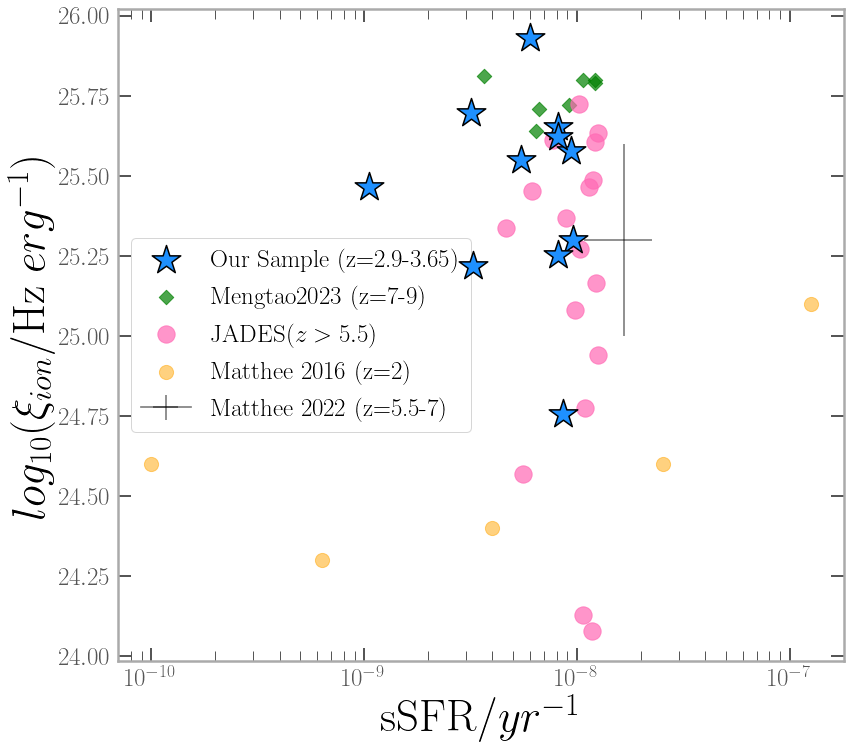

In [223]:
fig,ax=FancyPlot(r'sSFR/$yr^{-1}$',r'$log_{10}(\xi_{ion}$/Hz $erg^{-1})$')
# ax.scatter([8.58,8.78,8.44,9.69,8.49,8.28,9.48,7.95,7.93,7.66,8.83,8.11]
#            ,[25.8,25.71,25.8,26,25.61,25.79,25.82,25.8,25.81,25.64,25.72,25.8],s=105,c='g', marker='D' ,label='Mengtao2023 (z=7-9)')
# # ax.scatter(6,25.7,s=105,c='b',label='Vanzella')
# ymin=np.array([25.15])
# ymax=np.array([25.6])
# ax.errorbar(8.45,25.31,xerr=(0.09), yerr=(25.31-ymin,ymax-25.31), fmt='o', label='Matthee2022 (z=6.25-7)',c='k')
# ymin=np.array([25.77-0.43])
# ymax=np.array([25.77+0.5])
# xmin = np.array([log10(0.2*10**8)])
# xmax = np.array([log10(30.6*10**8)])

# ax.scatter([10.63,10.30,10.08,9.83,9.50,9.29],[25.22,25.01,24.98,25.05,25.05,25.26]
#            ,s=105,c='r', marker='P' ,label='Shivae 2018 (z=2)')
# # ax.scatter(log10(FM['M(stars)'].where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'].dropna()))),
# #            BFMIGM['sion'].where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'].dropna())), s=200, alpha=0.5)
# # ax.scatter(log10(FMELG['M(stars)']),BFMELG['sion'],c='dodgerblue',marker='*',s=200,
# #            alpha = 0.5, label='Photometric EELGs (z=2.5-4)')[2085,1175,1786,1902,2840,1045,3276]
ax.scatter((ms3['sSFR']),ms3['spec_sion'],s=900,c='dodgerblue',edgecolor='black',  # Specify the outline color
    linewidth=1.5,label='Our Sample (z=2.9-3.65)', marker='*',zorder=6)
ax.scatter((MT['sSFR']),[25.8,25.71,25.72,25.8,25.81,25.64,25.79],s=105,alpha=0.7,c='g', marker='D' ,label='Mengtao2023 (z=7-9)')

ax.scatter((jadesspec['sSFR']),(jadesspec['sion_x']),s=300,alpha=0.7,c='hotpink',label=r'JADES($z>5.5$)')
# plt.scatter((ms3['Mass'][mask+mask2+mask3+mask4]),ms3['spec_sion'][mask+mask2+mask3+mask4], marker='*', s=750, facecolors='none', edgecolors='k')
ax.errorbar(x=(1.66*10**-8),y=25.3,xerr=0.58*10**-8,yerr=0.3,label='Matthee 2022 (z=5.5-7)',c='k',alpha=0.5)
ax.scatter(x=([0.1*10**-9,0.63*10**-9,4*10**-9,25.3*10**-9,125*10**-9]),y=[24.6,24.3,24.4,24.6,25.1]
           ,s=200,c='orange',alpha=0.5,label='Matthee 2016 (z=2)')
#             ,xerr=([0.14*10**-9,0.7*10**-9,6*10**-9,37*10**-9,118*10**-9]),fmt='o')
# ax.errorbar(0.1,)

ax.set_xscale('log')
ax.legend()
# ax.set_ylim(24.7,26.1)
fig.savefig(path+'FORS2_sion.pdf', format='pdf', dpi=600, bbox_inches='tight')

In [ ]:
0.1008628750311836, 24.610667592271206
xerr 0.24861217215252615, 24.616062131204444
yerr 0.0982963322980123, 25.409073816961705
0.6287926588655347, 24.280414786532457
xerr 1.5498815466621596, 24.293561263450194
yerr 0.6234133804644494, 24.695129006132134
3.9879184493490905, 24.34941571213699
xerr 9.914450680598106, 24.366452620617842
yerr 4.022329201912488, 24.655631725095457
25.292110737030363, 24.565703459446954
xerr 62.3413380464449, 24.55947009140345
yerr 24.64853119402585, 24.79434224227699
128.29477080300947, 25.10719657526322
xerr 246.48531194025875, 25.123799606618075
yerr 125.03019985352464, 24.839711327085507


In [75]:
10**(8.38+0.07)-10**8.38

41955001.2244966

In [71]:
sqrt((8.387/8.38)**2+(1/4)**2)

0.8719307143551299

In [55]:
MT

Galaxy_ID  redshift    sfh  IR fmu     mu  tau_V          sSFR  \
0         23     8.881  0.251   0.689  0.223  0.370  1.218000e-08   
1         24     8.999  0.287   0.689  0.770  0.043  6.641000e-09   
2         44     7.100  0.107   0.689  0.025  1.818  9.141000e-09   
3        407     7.028  0.278   0.689  0.080  3.355  1.065000e-08   
4        498     7.180  0.183   0.689  0.447  0.026  3.667000e-09   
5        499     7.168  0.329   0.689  0.366  0.036  6.432000e-09   
6       1027     7.819  0.304   0.689  0.933  0.272  1.214000e-08   

       M(stars)       L(dust)  T_C^ISM  T_W^BC  chi_C^tot  chi_PAH^tot  \
0  2.336000e+08  3.028000e+10     45.1    26.1      0.612        0.137   
1  3.010000e+08  2.562000e+09     45.1    26.1      0.612        0.137   
2  5.050000e+08  4.379000e+10     45.1    26.1      0.612        0.137   
3  2.812000e+09  5.203000e+11     45.1    26.1      0.612        0.137   
4  9.304000e+08  3.024000e+09     45.1    26.1      0.612        0.137   
5  1.715000e+08  1.664000e+09     45.1    26.1      0.612        0.137   
6  6.967000e+08  6.610000e+10     45.1    26.1      0.612        0.137   

   chi_MIR^tot  chi_W^tot  tau_V^ISM      M(dust)     SFR    A_V    age  \
0        0.053      0.198      0.082   11420000.0   2.846  0.391  7.606   
1        0.053      0.198      0.033     966300.0   1.999  0.044  8.057   
2        0.053      0.198      0.045   16510000.0   4.616  0.451  7.858   
3        0.053      0.198      0.269  196200000.0  29.950  2.804  7.543   
4        0.053      0.198      0.011    1140000.0   3.412  0.016  8.375   
5        0.053      0.198      0.013     627600.0   1.103  0.029  8.057   
6        0.053      0.198      0.254   24930000.0   8.456  0.296  7.600   

    Tdust  lg(M/Lh)  lg(M/Lk)    chi2    id  fmuopt  fmuir        tform  \
0  31.569    -0.792    -0.567   1.878    23   0.251  0.689  119100000.0   
1  31.569    -0.650    -0.425   1.203    24   0.287  0.689  338800000.0   
2  31.569    -0.543    -0.297  17.516    44   0.107  0.689  210800000.0   
3  31.569    -0.393    -0.225   6.177   407   0.278  0.689  105100000.0   
4  31.569    -0.418    -0.188  16.701   498   0.183  0.689  701400000.0   
5  31.569    -0.530    -0.288   3.058   499   0.329  0.689  311900000.0   
6  31.569    -0.583    -0.318  11.223  1027   0.304  0.689  116600000.0   

   gamma  metals  odepthbc    mu2             M          sfr2          lum2  \
0  1.220   0.903     0.370  0.223  2.336000e+08  1.211000e-08  3.009000e+10   
1  0.313   1.086     0.043  0.770  3.010000e+08  6.654000e-09  2.570000e+09   
2  0.920   0.157     1.818  0.025  5.050000e+08  9.180000e-09  4.396000e+10   
3  0.197   0.431     3.355  0.080  2.812000e+09  1.224000e-08  5.970000e+11   
4  0.149   0.164     0.026  0.447  9.304000e+08  3.691000e-09  3.044000e+09   
5  1.990   0.174     0.036  0.366  1.715000e+08  6.433000e-09  1.664000e+09   
6  1.542   0.142     0.272  0.933  6.967000e+08  1.214000e-08  6.615000e+10   

       beta   beta_er     betaU  betaU_er     betaP  betaP_er     bouwen  \
0 -0.936431  0.027349 -2.454092  0.019723 -1.532064  0.523214  25.629501   
1 -2.231730  0.020274 -2.326934  0.020109 -2.260859  0.281488  25.489627   
2 -2.219303  0.010063 -2.625625  0.009277 -2.555025  0.195588  25.818187   
3 -1.454701  0.017369 -2.598537  0.014727 -2.103947  0.553020  25.788391   
4 -2.438581  0.009288 -2.498649  0.009241 -2.321113  0.118977  25.678514   
5 -2.433578  0.009517 -2.555653  0.009329 -1.889095  0.374380  25.741218   
6 -2.245361  0.010531 -2.698012  0.009413 -1.708713  0.096791  25.897813   

     bouwenA       sion  
0  24.491859  25.160814  
1  25.384903  25.099443  
2  25.371234  25.219879  
3  24.802821  25.218665  
4  25.612439  25.165175  
5  25.606936  25.186400  
6  25.399897  25.253151

In [63]:
jadesspec

Unnamed: 0  NIRSpec_ID  NIRCam_ID    RA_TARG   Dec_TARG  RA_NIRCam  \
0           11        4404     101990  53.115372 -27.814771  53.115379   
1           12        6002     106292  53.110411 -27.808923  53.110417   
2           13        9422     113585  53.121755 -27.797634  53.121757   
3           14       16625     127219  53.169042 -27.778838  53.169047   
4           15       16745     208642  53.130023 -27.778392  53.130051   
5           16       18846     131688  53.134917 -27.772709  53.134918   
6           17       18976     131971  53.166601 -27.772403  53.166602   
7           18       22251     138571  53.154069 -27.766072  53.154072   
8           21    10013704     197348  53.126535 -27.818092  53.126538   
9           24       17566     209276  53.156128 -27.775841  53.156101   
10          26       19606     210963  53.176550 -27.771108  53.176568   
11          28        4297     101683  53.155788 -27.815202  53.155794   
12          41       19342     132780  53.160620 -27.771613  53.160623   
13          42       20961     135819  53.134229 -27.768913  53.134230   
14          43       21842     137667  53.156825 -27.767159  53.156827   
15          44    10005113     110319  53.167303 -27.802870  53.167302   
16          58        6246     106885  53.129722 -27.808177  53.129726   

    Dec_NIRCam  Priority  z_Spec z_Spec_flag  x_offset  y_offset  nexp_Prism  \
0   -27.814774       4.0   5.763           A    -0.088    -0.161          72   
1   -27.808924       4.0   5.937           A     0.026     0.036          72   
2   -27.797638       4.0   5.936           A    -0.032    -0.139          72   
3   -27.778834       4.0   6.631           A     0.059    -0.026          72   
4   -27.778389       4.0   5.567           A    -0.020     0.163          72   
5   -27.772711       4.0   6.335           A    -0.044    -0.168          72   
6   -27.772402       4.0   6.327           A    -0.015    -0.202          72   
7   -27.766072       4.0   5.798           A    -0.009    -0.173          48   
8   -27.818090       4.0   5.920           A    -0.045     0.120          48   
9   -27.775881       4.0   6.102           A     0.077     0.120          48   
10  -27.771131       4.0   5.889           A     0.045    -0.031          24   
11  -27.815209       4.0   6.713           A    -0.024     0.018          24   
12  -27.771611       6.1   5.974           A    -0.045    -0.183          72   
13  -27.768916       6.1   7.045           A    -0.073     0.109          48   
14  -27.767162       6.1   7.980           A     0.037     0.081          72   
15  -27.802874       6.1   5.821           A     0.064     0.030          72   
16  -27.808180       7.5   5.562           A    -0.023     0.128          72   

    nexp_R1000  pre_JWST_priority  z_R1000  LyA_1216_flux  LyA_1216_err  \
0           18                7.5    5.764            NaN           NaN   
1           18                4.0    5.937         301.40         42.14   
2           18                4.0    5.936        1035.62         60.15   
3           18                4.0    6.631         211.38         38.49   
4           18                4.0    5.567            NaN           NaN   
5           18                8.2    6.335         823.94         45.73   
6           18                4.0    6.327            NaN           NaN   
7           12                4.0    5.798            NaN           NaN   
8           12                4.0    5.920            NaN           NaN   
9           12                4.0    6.102            NaN           NaN   
10           6                4.0    5.889            NaN           NaN   
11           6                NaN    6.713         308.96         51.86   
12          18                4.0    5.974            NaN           NaN   
13          12                NaN    7.044            NaN           NaN   
14          18                4.0    7.980            NaN           NaN   
15          18                

/tmp/ipykernel_952475/110957387.py:5: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']


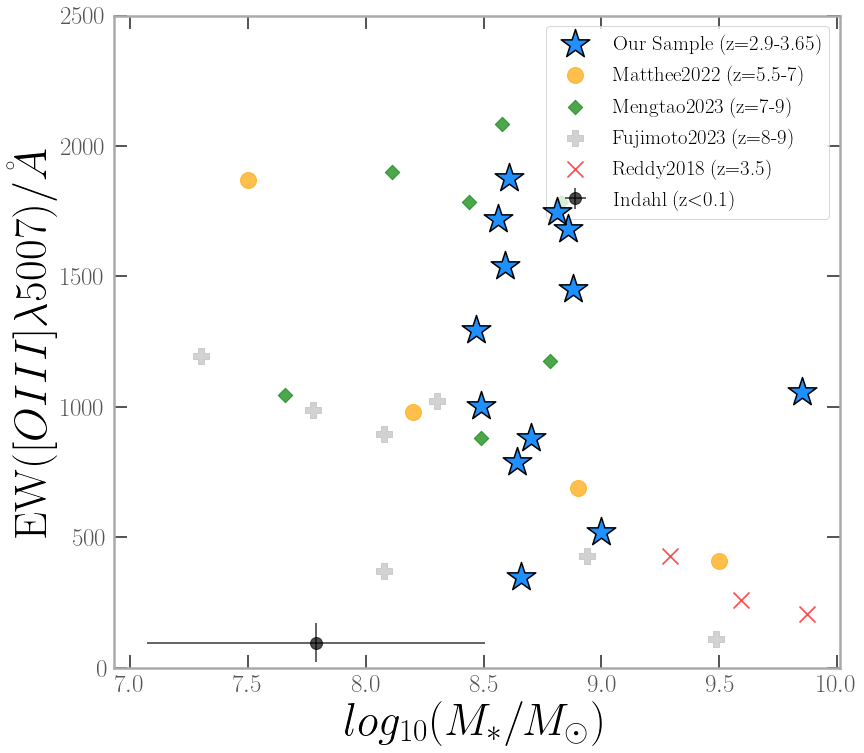

In [224]:
fig,ax=FancyPlot(r'$log_{10}(M_{*}/M_\odot)$',r'EW($[OIII]\lambda5007)/\AA$')
ax.scatter((ms3['Mass']),crap['o3_ew'],marker='*',s=900,c='dodgerblue',edgecolor='black',  # Specify the outline color
    linewidth=1.5,label='Our Sample (z=2.9-3.65)',zorder=6)
# ax.scatter((ms3['Mass'][mask+mask2+mask3+mask4]),crap['o3_ew'][mask+mask2+mask3+mask4], marker='*',s=750, facecolor='none', edgecolor='k')
ax.scatter([7.5,8.2,8.9,9.5],[1870,980,690,410],marker='o',s=255,c='orange',label='Matthee2022 (z=5.5-7)',alpha=0.7)
ax.scatter([8.58,8.78,8.44,9.69,8.49,8.28,9.48,7.95,7.93,7.66,8.83,8.11],
           [2085,1175,1787,2599,879,3276,2564,2650,2840,1045,1786,1902], marker='D',alpha=0.7,s=105, c='g', label='Mengtao2023 (z=7-9)')
ax.scatter(log10([1.2*10**8,2.0*10**8,8.7*10**8,1.2*10**8,30.6*10**8,0.2*10**8,0.6*10**8])
           ,[372,1022,430,895,109,1195,989],c='silver',marker='P',s=255,alpha=0.7,label='Fujimoto2023 (z=8-9)')
# ax.errorbar(8.45,2.)
ax.scatter([9.87, 9.59,9.29],[207.20, 258.06, 428.86],c='r',alpha=0.7,marker='x',s=255,label='Reddy2018 (z=3.5)')
# ax.scatter(log10(jadesspec['M(stars)']),jadesspec['o3_ew'],c='pink',label='JADES (z>5.5)')
ax.errorbar(x=median([7.53,8.43,8.72,8.11,7.79,7.69,7.73,7.61,8.09]),y=median([377,97,36,87,73,950,265,75,238])
            ,xerr=sqrt([0.23**2+0.26**2+0.26**2+0.24**2+0.22**2+0.15**2+0.27**2+0.29**2+0.2**2]),yerr=sqrt([32**2+8**2+7**2+3.37**2+5**2+44**2+45**2+11**2+16**2])
            ,fmt='o',alpha=0.7,c='black',markersize='12',label=r'Indahl (z$<$0.1)')
ax.set_ylim(0,2500)
ax.legend(loc='best',fontsize='small')
fig.savefig(path+'FORS2_o3.pdf', format='pdf', dpi=600, bbox_inches='tight')

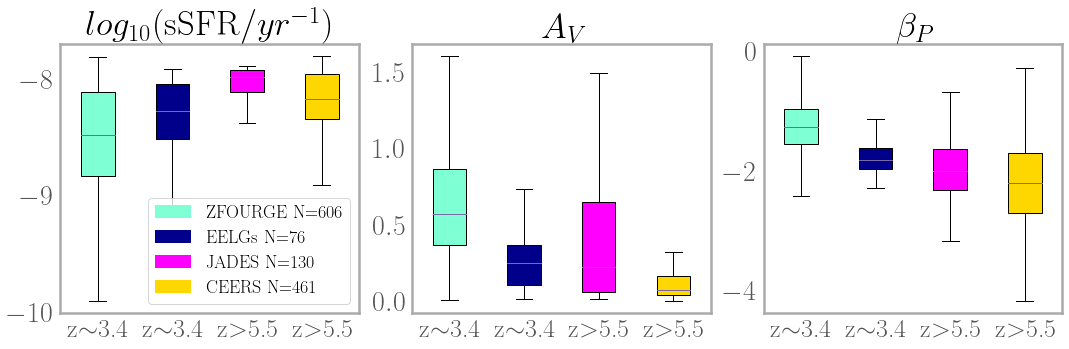

In [34]:
from matplotlib.patches import Patch
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharex=True)
# Parameter 1: sSFR
# axes[0].boxplot([log10(FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['sSFR']), log10(FMELG['sSFR']), log10(JS['sSFR']),log10(C['sSFR'])], showfliers=False)
# axes[0].set_title('sSFR')
axes[0].set_title(r'$log_{10}$(sSFR$/ yr^{-1}$)',fontsize=35)

# Parameter 2: age
# axes[1].boxplot([log10(FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['A_V']), log10(FMELG['A_V']), log10(JS['A_V']),log10(C['A_V'])], showfliers=False)
axes[1].set_title(r'$A_V$',fontsize=35)
# axes[0].set_ylabel(r'Y-axis label for A_V')

# Parameter 3: beta_P
# axes[2].boxplot([FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['betaP'], FMELG['betaP'], JS['betaP'],C['betaP']], showfliers=False)
axes[2].set_title(r'$\beta_P$',fontsize=35)
# axes[1].set_ylabel('Y-axis label for beta_P')


colors = ['aquamarine', 'darkblue', 'magenta','gold']

#Plot the box and whisker plots for each parameter
for i, param in enumerate([ 'sSFR', 'A_V','betaP']):
    ax = axes[i]
    if i==0:
        boxplot = ax.boxplot([log10(FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()[param]),
                          log10(FMELG[param]), log10(JS[param]), log10(C[param])], showfliers=False, patch_artist=True)
#.xticks([1, 2, 3], ['mon', 'tue', 'wed'])
        for patch, color in zip(boxplot['boxes'], colors):
            patch.set_facecolor(color)
    else:
        boxplot = ax.boxplot([FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()[param],
                              FMELG[param], JS[param], C[param]], showfliers=False, patch_artist=True)
    #.xticks([1, 2, 3], ['mon', 'tue', 'wed'])
        for patch, color in zip(boxplot['boxes'], colors):
            patch.set_facecolor(color)
    
for ax in axes:
    ax.tick_params(axis='x', labelsize=26)  
    ax.tick_params(axis='y', labelsize=28)        
plt.xticks([1,2,3,4],[r'z$\sim$3.4',r'z$\sim$3.4',r'z$>$5.5',r'z$>$5.5'])
# Add a legend without arguments
legend_elements = [Patch(facecolor='aquamarine', label='ZFOURGE N=606'),
                   Patch(facecolor='darkblue', label='EELGs N=76'),
                   Patch(facecolor='magenta', label='JADES N=130'),
                   Patch(facecolor='gold',label='CEERS N=461')]

# Add the legend to the first subplot (axes[0])
axes[0].legend(handles=legend_elements, fontsize=18, loc='best')
# axes[0].set_yscale('log')
# y_ticks = [-1, 0, 1, 2, 3]  # Define the positions of the tick marks
# y_labels = ['-1', '0', '1', '2', '3']  # Define the labels for the tick marks
# axes[2].set_yticks(y_ticks)  # Set the tick positions
# axes[2].set_yticklabels(y_labels)

# y_ticks = [25, 25.1, 25.2, 25.3]  # Define the positions of the tick marks
# y_labels = ['25', '25.1', '25.2', '25.3']  # Define the labels for the tick marks
# axes[0].set_yticks(y_ticks)  # Set the tick positions
# axes[0].set_yticklabels(y_labels)
for ax in axes:
    ax.grid(False)
# Adjust layout and spacing
plt.tight_layout(pad=0.5)   
fig.savefig(path+'Paper_boxnwhisker_new.pdf', format='pdf', dpi=600, bbox_inches='tight')


In [22]:
len(C)

461

In [169]:
path

'/home/magnus/notebook/Forrest/'

In [ ]:
pathx = os.path.expanduser('~/notebook/Laptop/')
#Full Sample of 682 with all filters- Parameters
ZF=Table.read(os.path.expanduser(pathx+'sedpar_zfourge.csv')) 
ZF=ZF.to_pandas()
CEER=Table.read(os.path.expanduser(pathx+'sedpar_ceers.csv')) 
CEER=CEER.to_pandas()

In [ ]:
fig,ax=FancyPlot(r'$\gamma$',r'tform')
plt.style.use('dark_background')
ax.scatter(ZF['gamma'],log10(ZF['tform']),s=200,label='zfourge')
ax.scatter(CEER['gamma'],log10(CEER['tform']),s=200,label='ceers')
ax.legend()
fig.savefig(path+'tform_gamma.pdf', format='pdf', dpi=600, bbox_inches='tight')
print(len(ZF['gamma']))

In [85]:
MEDIAN1= median(BFM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['sion'])
LOWER1=np.percentile(BFM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['sion'],25)
UPPER1=np.percentile(BFM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['sion'],75)
y_error = np.array([[MEDIAN1-LOWER1],[UPPER1-MEDIAN1]])

MEDIAN1= median(FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['M(stars)'])
LOWER1=np.percentile(FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['M(stars)'],25)
UPPER1=np.percentile(FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['M(stars)'],75)
x_error = np.array([[log10(MEDIAN1)-log10(LOWER1)],[log10(UPPER1)-log10(MEDIAN1)]])
print(log10(MEDIAN1),x_error, 'ZFOURGE control')
MEDIAN1= median(BFM['sion'])
LOWER1=np.percentile(BFM['sion'],25)
UPPER1=np.percentile(BFM['sion'],75)
y_error1 = np.array([[MEDIAN1-LOWER1],[UPPER1-MEDIAN1]])

MEDIAN1= median(FMELG['M(stars)'])
LOWER1=np.percentile(FMELG['M(stars)'],25)
UPPER1=np.percentile(FMELG['M(stars)'],75)
x_error1 = np.array([[MEDIAN1-LOWER1],[UPPER1-MEDIAN1]])
print(log10(MEDIAN1),log10(x_error1), 'EELGs')
MEDIAN1= median(JSN['sion'])
LOWER1=np.percentile(JSN['sion'],25)
UPPER1=np.percentile(JSN['sion'],75)
y_error2 = np.array([[MEDIAN1-LOWER1],[UPPER1-MEDIAN1]])

MEDIAN1= median(JS['M(stars)'])
LOWER1=np.percentile(JS['M(stars)'],25)
UPPER1=np.percentile(JS['M(stars)'],75)
x_error2 = np.array([[MEDIAN1-LOWER1],[UPPER1-MEDIAN1]])
print(log10(MEDIAN1),log10(x_error2), 'JADES')
MEDIAN1= median(BC[~isnan(BC['betaP'])]['sion'])
LOWER1=np.percentile(BC[~isnan(BC['betaP'])]['sion'],25)
UPPER1=np.percentile(BC[~isnan(BC['betaP'])]['sion'],75)
y_error3 = np.array([[MEDIAN1-LOWER1],[UPPER1-MEDIAN1]])

MEDIAN1= median(FMELG['betaP'])
LOWER1=np.percentile(FMELG['betaP'],25)
UPPER1=np.percentile(FMELG['betaP'],75)
x_error3 = np.array([[MEDIAN1-(LOWER1)],[(UPPER1)-(MEDIAN1)]])
print(MEDIAN1,x_error3, 'FMELG')

10.323561463462866 [[0.28773164]
 [0.31572576]] ZFOURGE control
9.745972134854524 [[9.42304097]
 [9.52208543]] EELGs
8.43080042462418 [[8.10234794]
 [8.56157837]] JADES
-1.825493704535416 [[0.15091472]
 [0.205148  ]] FMELG


/tmp/ipykernel_411527/110957387.py:5: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']


(24.8, 25.6)

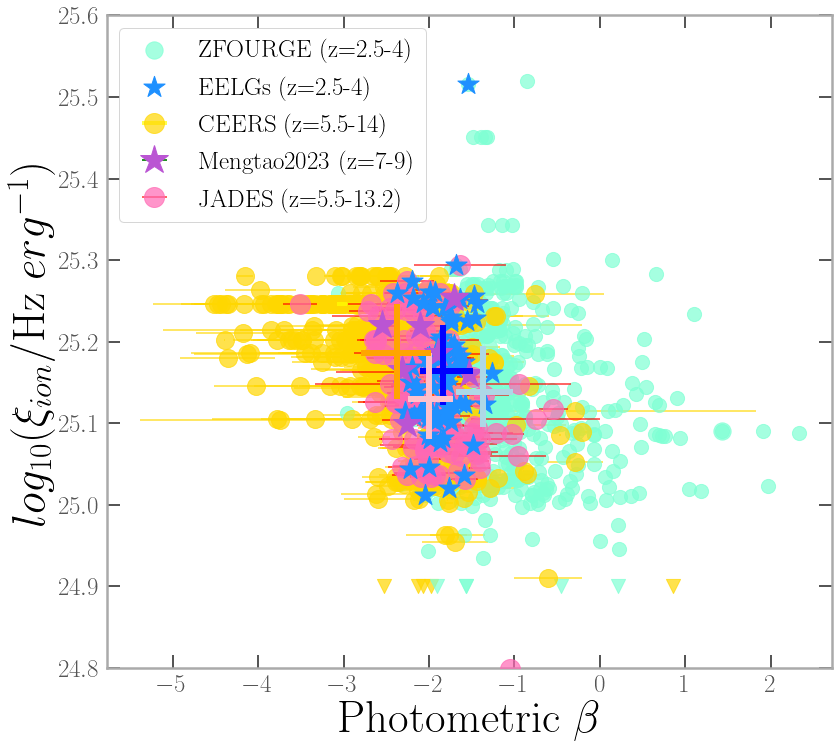

In [87]:
fig,ax=FancyPlot(r'Photometric $\beta$',r'$log_{10}(\xi_{ion}$/Hz $erg^{-1})$')
x=BC['betaP']
y=BC['sion']
xerr=BC['betaP_er']
threshold=24.9
for x_val, y_val,yerr in zip(x, y,xerr):
    if y_val >= threshold:
        ax.errorbar(x_val, y_val,xerr=yerr, fmt='o',markersize=18,alpha=0.7,c='gold',zorder=1)
    else:
        # For y-values below 24.8, set y = 24.8 for the arrows
        ax.scatter(x_val, threshold,  marker='v',s=200,alpha=0.7,c='gold')
x=BFM['betaP']
y=BFM['sion']
threshold=24.9
for x_val, y_val in zip(x, y):
    if y_val >= threshold:
        ax.scatter(x_val, y_val, marker='o',s=200,alpha=0.7,c='aquamarine')
    else:
        # For y-values below 24.8, set y = 24.8 for the arrows
        ax.scatter(x_val, threshold,  marker='v',s=200,alpha=0.7,c='aquamarine')

# ax.scatter(log10(C[r'sSFR$_{0.1Gyr}$'].iloc[0]),BC['sion'].iloc[0],label='CEERS (z=5.5-14)',s=200,marker='o',
#                alpha=0.7,zorder=2,c='gold',linewidth=4)
# ax.scatter(log10(FM[r'sSFR$_{0.1Gyr}$']).iloc[0],BFM['sion'].iloc[0],label='ZFOURGE (z=2.5-4)',s=200,marker='o',
#             alpha=0.7,zorder=1,c='aquamarine')





ax.errorbar(BC['betaP'].iloc[0],BC['sion'].iloc[0],xerr=BC['betaP_er'].iloc[0],label='CEERS (z=5.5-14)',markersize=20,fmt='o',
               ecolor='yellow', alpha=0.7,zorder=2,c='gold',linewidth=4)
# ax.scatter(BC['betaP'],BC4IGM['sion'],label='CEERS',s=300, alpha=0.7,zorder=1,c='gold')
ax.errorbar(median(BC[~isnan(BC['betaP'])]['betaP']),median(BC[~isnan(BC['betaP'])]['sion']),xerr=x_error3,yerr=y_error3,c='orange',ecolor='orange',linewidth=6,zorder=30)

ax.scatter(BFM['betaP'].iloc[0],BFM['sion'].iloc[0],label='ZFOURGE (z=2.5-4)',s=300, alpha=0.7,zorder=1,c='aquamarine')
ax.errorbar(median(BFM['betaP']),median(BFM['sion']),xerr=x_error1,yerr=y_error1,ecolor='lightblue',linewidth=6,zorder=10)
ax.errorbar(BMT['betaP'],BMT['sion'],xerr=BMT['beta_er'],fmt='*',ecolor='green',
               markersize=30, label='Mengtao2023 (z=7-9)',zorder=5,c='mediumorchid')
ax.scatter(BFMELG['betaP'],BFMELG['sion'],label='EELGs (z=2.5-4)',marker='*',s=500,zorder=4,c='dodgerblue')
ax.errorbar(median(BFMELG['betaP']),median(BFMELG['sion']),xerr=x_error,yerr=y_error,ecolor='blue',linewidth=6,zorder=10)
ax.errorbar(JSN['betaP'],JSN['sion'],xerr=JSN['betaP_er'],label='JADES (z=5.5-13.2)',markersize=20,fmt='o',
              ecolor='red',alpha=0.7,zorder=3,c='hotpink')
ax.errorbar(median(JSN['betaP']),median(JSN['sion']),xerr=x_error2,yerr=y_error2,ecolor='pink',linewidth=6,zorder=10)
# ax.errorbar(median(BC['betaP']),median(BC['sion']),xerr=x_error3,yerr=y_error3,ecolor='orange',linewidth=6,zorder=11)
# ax.set_xlim(-5,3)
# ax[0].scatter(BMT['beta'],BMTIGM['sion'],label='MT Magphys atn',marker='*',s=500,zorder=3,c='red')
ax.legend()
ax.set_ylim(24.8,25.6)
# ax.set_xlabel(r'Photometric $\beta$')
# ax.set_ylabel(r'$\psi_{ion}$')
# fig.savefig('sionphotB.png', format='png', dpi=600, bbox_inches='tight')

/tmp/ipykernel_411527/110957387.py:5: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']


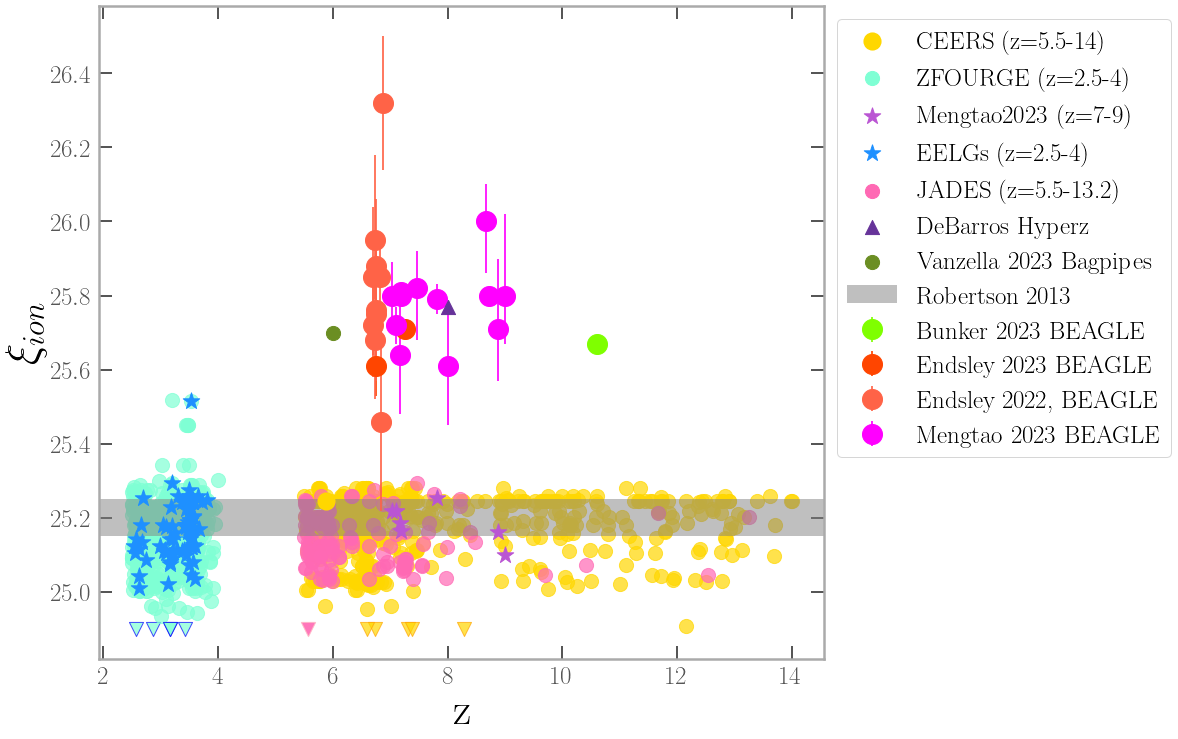

In [225]:
fig,ax=FancyPlot(r'z',r'$\xi_{ion}$')

x=C['redshift']
y=BC['sion']
threshold=24.9
for x_val, y_val in zip(x, y):
    if y_val >= threshold:
        ax.scatter(x_val, y_val, marker='o',s=200,alpha=0.7,c='gold')
    else:
        # For y-values below 24.8, set y = 24.8 for the arrows
        ax.scatter(x_val, threshold,  marker='v',s=200,alpha=0.7,c='gold',edgecolor='orange')
x=FM['redshift']
y=BFM['sion']
threshold=24.9
for x_val, y_val in zip(x, y):
    if y_val >= threshold:
        ax.scatter(x_val, y_val, marker='o',s=200,alpha=0.7,c='aquamarine')
    else:
        # For y-values below 24.8, set y = 24.8 for the arrows
        ax.scatter(x_val, threshold,  marker='v',s=200,alpha=0.7,c='aquamarine',edgecolor='blue')
        
x=JS['redshift']
y=JSN['sion']
threshold=24.9
for x_val, y_val in zip(x, y):
    if y_val >= threshold:
        ax.scatter(x_val, y_val, marker='o',s=200,alpha=0.7,c='hotpink')
    else:
        # For y-values below 24.8, set y = 24.8 for the arrows
        ax.scatter(x_val, threshold,  marker='v',s=200,alpha=0.7,c='hotpink',edgecolor='pink')


ax.scatter(C['redshift'].iloc[0],BC['sion'].iloc[0],label='CEERS (z=5.5-14)',s=200,marker='o',
               alpha=1,zorder=2,c='gold',linewidth=4)
# ax[0].scatter(BC['beta'],BC4IGM['sion'],label='Attenuated',s=300, alpha=0.7,zorder=1,c='purple')
ax.scatter(FM['redshift'].iloc[0],BFM['sion'].iloc[0],label='ZFOURGE (z=2.5-4)',s=200,marker='o',
            alpha=1,zorder=1,c='aquamarine')
ax.scatter(MT['redshift'],BMT['sion'],marker='*',
               s=300, label='Mengtao2023 (z=7-9)',zorder=5,c='mediumorchid')
ax.scatter(FMELG['redshift'],BFMELG['sion'],label='EELGs (z=2.5-4)',marker='*'
            ,s=300,zorder=4,c='dodgerblue')
ax.scatter(JS['redshift'].iloc[0],JSN['sion'].iloc[0],label='JADES (z=5.5-13.2)',marker='o',s=200,zorder=3,c='hotpink')
# ax.set_xscale('log')
col=['red','green','blue','pink']
# ax.errorbar(x=[4.9,4.91,4.92,4.89],y=[25.48,25.27,25.51,25.5],yerr=[[0.06,0.19,0.05,0],[0.06,0.17,0.05,0.05]],label='Harikane 2022 Ha', fmt='o',markersize=20,markeredgecolor='pink',markerfacecolor='none')
# ax.errorbar(x=(3.8+5.3)/2,y=25.36,yerr=0.08,label='Lam 2019 Ha',fmt='o',markersize=20,markeredgecolor='darkseagreen',markerfacecolor='none')
# ax.errorbar(x=[4.9,5.1],y=[25.39,25.31],yerr=[0.64,0.43],xerr=2,label='Prieto-Lyon Ha',fmt='o',markersize=20,markeredgecolor='mintcream',markerfacecolor='none')
ax.errorbar(x=10.603,y=25.67,yerr=0.02,label='Bunker 2023 BEAGLE',fmt='o',c='chartreuse',markersize=20)
#Doesn't mention more than Gutkin.
# ax.errorbar(x=[5.443,5.467,5.468,5.468,5.479,5.52,5.52,5.522,5.822,5.885,5.889,5.893,5.895,5.897,5.899,
#     5.915,5.915,5.919,5.93,5.946,5.972,5.981,6.096,6.102,6.106,6.109,6.302,6.31,6.342,6.631],
#             y=[25.61,25.86,25.66,25.56,26.59,25.96,25.26,25.31,24.48,25.44,25.61,25.44,25.43,25.57,25.29,
#     26.03,25.52,25.72,25.22,25.42,25.16,25.35,25.15,25.68,25.53,25.25,26.21,25.32,25.33,24.92],
#            yerr=[[0.12,0.13,0.02,0.05,0.09,0.06,0.02,0.02,0.08,0.03,0.11,0.11,0.07,0.04,0.11,0.08,0.1,0.11,
#     0.23,0.1,0.11,0.12,0.24,0.01,0.67,0.3,0.1,0.05,0.08,0.06],[0.11,0.12,0.02,0.05,0.1,0.07,0.08,0.09,0.1,0.06,
#     0.13,0.14,0.15,0.04,0.13,0.11,0.13,0.1,0.3,0.07,0.14,0.09,0.33,0.04,1,0.39,0.09,0.07,0.11,0.08]],label='Simmonds Ha',fmt='o',markersize=20,markeredgecolor='lime',markerfacecolor='none')
# ax.errorbar(x=4.5,y=25.5,yerr=1,label='Faisst 2019 Ha',fmt='o',markersize=20,markeredgecolor='darkorchid',markerfacecolor='none')
ax.errorbar(x=[6.75,7.25],y=[25.61,25.71],yerr=[[0.08,0.02],[0.02,0.01]],fmt='o',label='Endsley 2023 BEAGLE',c='orangered',markersize=20)
# -SMC, Gutkin,BC03,Chabrier, CSFH
ax.errorbar(x=[6.882,6.701,6.702,6.732,6.73,6.748,6.814,6.759,6.847,6.75]
           ,y=[26.32,25.72,25.85,25.68,25.95,25.88,25.85,25.76,25.46,25.75]
           ,yerr=[[0.18,0.14,0.21,0.16,0.16,0.16,0.16,0.19,0.24,0.12],[0.18,0.14,0.19,0.19,0.23,0.18,0.12,0.16,0.26,0.20]],fmt='o',label='Endsley 2022, BEAGLE',c='tomato',markersize=20)
# -SMC, Gutkin,BC03,Chabrier, delayed sfh with superimposed burst
ax.scatter(x=8,y=25.77,marker='^',label='DeBarros Hyperz',s=200,c='rebeccapurple', zorder=10)
#Calzetti+Cardelli 1989, CSFH,BC03,Miller & Scalo IMF,5 possible redenning laws 
# ax.errorbar(x=[4.369, 5.213],y=[25.27,25.44],yerr=[0.03,0.1],label='Bouwen 2016 Ha',fmt='o',markersize=20,markeredgecolor='cadetblue',markerfacecolor='none')
ax.scatter(x=6,y=25.7,label='Vanzella 2023 Bagpipes',marker='o',s=200,c='olivedrab')
#BPASS and Kroupa 2001 imf
# ax.errorbar(x=2,y=24.77,yerr=0.43,label='Themiya 2023 Ha',fmt='o',markeredgecolor='khaki',markerfacecolor='none',markersize=20)
# ax.errorbar(x=[6.087,5.81,6.297,5.939,5.938,6.108,5.916],y=[26.45,25.15,25.77,25.45,25.49,25.18,25.79],yerr=[0.19,0.31,0.18,0.12,0.12,0.13,0.16],fmt='o',label='Ning 2023 Ha',markerfacecolor='none',markeredgecolor='goldenrod',markersize=20)
# ax.errorbar(x=4.4,y=26.28,xerr=0.6,yerr=[[0.28],[0.39]],fmt='o',label='Maseda 2020 Ha',markersize=20,markeredgecolor='lightcoral',markerfacecolor='none')

ax.errorbar([8.999,8.881,8.715,8.678,8,7.819,7.47,7.194,7.18,7.168,7.1,7.028]
           ,[25.8,25.71,25.8,26,25.61,25.79,25.82,25.8,25.81,25.64,25.72,25.8]
            ,yerr=[[0.13,0.14,0.01,0.14,0.16,0.04,0.14,0.02,0.02,0.16,0.05,0.1],
                   [0.22,0.19,0.01,0.1,0.16,0.04,0.1,0.02,0.01,0.17,0.05,0.09]], fmt='o',markersize=20,c='magenta' ,label='Mengtao 2023 BEAGLE')
#Same as Endsley 2023
plt.axhspan(25.15,25.25, facecolor='gray', alpha=0.5, label='Robertson 2013')

# plt.ylim(24.0,26.8) 
# plt.xlim(1.5,14)
# plt.legend()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# plt.savefig(path+'photsion.png', format='png', dpi=600, bbox_inches='tight')
plt.savefig('photsion.pdf', format='pdf', dpi=600, bbox_inches='tight')

/tmp/ipykernel_411527/2414091865.py:5: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']


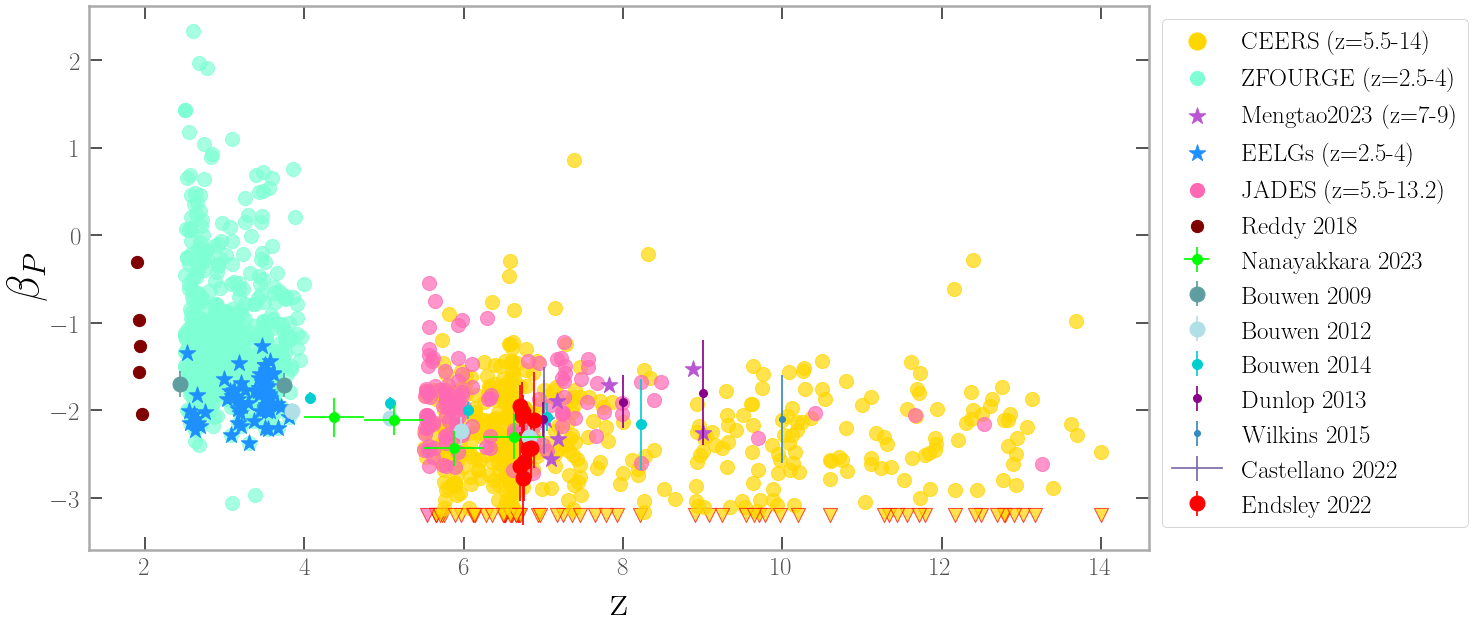

In [176]:
fig,ax=FancyPlot(r'z',r'$\beta_P$')

x=C['redshift']
y=BC['betaP']
threshold=-3.2
for x_val, y_val in zip(x, y):
    if y_val >= threshold:
        ax.scatter(x_val, y_val, marker='o',s=200,alpha=0.7,c='gold')
    else:
        # For y-values below 24.8, set y = 24.8 for the arrows
        ax.scatter(x_val, threshold,  marker='v',s=200,alpha=0.7,c='gold',edgecolor='red')
x=FM['redshift']
y=BFM['betaP']
# threshold=24.9
for x_val, y_val in zip(x, y):
    if y_val >= threshold:
        ax.scatter(x_val, y_val, marker='o',s=200,alpha=0.7,c='aquamarine')
    else:
        # For y-values below 24.8, set y = 24.8 for the arrows
        ax.scatter(x_val, threshold,  marker='v',s=200,alpha=0.7,c='aquamarine',edgecolor='red')
x=JS['redshift']
y=JS['betaP']
# threshold=24.9
for x_val, y_val in zip(x, y):
    if y_val >= threshold:
        ax.scatter(x_val, y_val, marker='o',s=200,alpha=0.7,c='hotpink')
    else:
        # For y-values below 24.8, set y = 24.8 for the arrows
        ax.scatter(x_val, threshold,  marker='v',s=200,alpha=0.7,c='hotpink',edgecolor='red')

ax.scatter(C['redshift'].iloc[0],BC['betaP'].iloc[0],label='CEERS (z=5.5-14)',s=200,marker='o',
               alpha=1,zorder=2,c='gold',linewidth=4)
# ax[0].scatter(BC['beta'],BC4IGM['sion'],label='Attenuated',s=300, alpha=0.7,zorder=1,c='purple')
ax.scatter(FM['redshift'].iloc[0],BFM['betaP'].iloc[0],label='ZFOURGE (z=2.5-4)',s=200,marker='o',
            alpha=1,zorder=1,c='aquamarine')
ax.scatter(MT['redshift'],BMT['betaP'],marker='*',
               s=300, label='Mengtao2023 (z=7-9)',zorder=5,c='mediumorchid')
ax.scatter(FMELG['redshift'],BFMELG['betaP'],label='EELGs (z=2.5-4)',marker='*'
            ,s=300,zorder=4,c='dodgerblue')
ax.scatter(JS['redshift'].iloc[0],JSN['betaP'].iloc[0],label='JADES (z=5.5-13.2)',marker='o',s=200,zorder=3,c='hotpink')
ax.errorbar(x=[(4+4.75)/2,(4.75+5.5)/2,(5.5+6.25)/2,(6.25+7)/2],y=[-2.08,-2.11,-2.43,-2.3],xerr=0.375,yerr=[0.22,0.17,0.2,0.26]
            ,label='Nanayakkara 2023',fmt='o',ms=10,c='lime',zorder=11)
ax.scatter(x=[1.96,1.92,1.94,1.93,1.9],y=[-2.04,-1.56,-1.26,-0.97,-0.31],label='Reddy 2018',c='maroon',s=150)
ax.errorbar(x=[2.44,3.75],y=[-1.7,-1.71],yerr=[1.7-1.55,1.71-1.57],label='Bouwen 2009',fmt='o',c='cadetblue',ms=15,zorder=10)
ax.errorbar(x=[3.85,5.07,5.96,6.82],y=[-2.01,-2.09,-2.23,-2.3],yerr=[2.01-1.91,2.08-2,2.23-2.07,2.3-2.01]
           ,label='Bouwen 2012',fmt='o',c='powderblue',ms=15,zorder=10)
ax.errorbar(x=[4.07,5.07,6.05,7.04,8.23],y=[-1.86,-1.92,-2,-2.07,-2.16]
            ,yerr=[1.86-1.79,1.92-1.85,2-1.9,2.07-1.91,2.16-1.64],label='Bouwen 2014',fmt='o',c='darkturquoise',ms=10,zorder=10)
ax.errorbar(x=[7,8,9],y=[-2.1,-1.9,-1.8],yerr=[0.2,0.3,0.6],label='Dunlop 2013',fmt='o',ms=8,c='darkmagenta',zorder=10)
ax.errorbar(x=10,y=-2.1,yerr=0.5,label='Wilkins 2015',fmt='o')
ax.errorbar(x=[7.012,7.012],y=[-2.25,-1.66],yerr=[0.25,0.16],label='Castellano 2022')
ax.errorbar(x=[6.88,6.7,6.7,6.73,6.75,6.81,6.76,6.85,6.75],y=[-2.11,-2.64,-1.95,-2.06,-2.77,-2.44,-2.59,-2.43,-2.02],
            yerr=[0.55,0.39,0.24,0.39,0.54,0.13,0.44,0.34,0.2],label='Endsley 2022',fmt='o',ms=15,zorder=10,c='red')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig('slopeevolution.pdf', format='pdf', dpi=600, bbox_inches='tight')

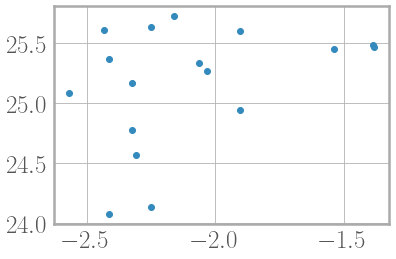

In [26]:
jspec=pd.read_csv(os.path.expanduser('~/notebook/Laptop/specsions_jades.csv'))
plt.scatter(JSN.where(JSN['id'].isin(jspec['NIRCam_ID'])).dropna()['beta'],jspec.where(jspec['NIRCam_ID'].isin(JSN.where(JSN['id'].isin(jspec['NIRCam_ID'])).dropna()['id']))['sion'].dropna())

In [ ]:
fig,ax=FancyPlot(r'sSFR$_{0.1Gyr}$',r' $\xi_{ion}$')

x=C['sSFR']
y=BC['sion']
threshold=24.9
for x_val, y_val in zip(x, y):
    if y_val >= threshold:
        ax.scatter(log10(x_val), y_val, marker='o',s=300,alpha=0.7,c='gold')
    else:
        # For y-values below 24.8, set y = 24.8 for the arrows
        ax.scatter(log10(x_val), threshold,  marker='v',s=200,alpha=0.7,c='gold')
x=FM['sSFR']
y=BFM['sion']
threshold=24.9
for x_val, y_val in zip(x, y):
    if y_val >= threshold:
        ax.scatter(log10(x_val), y_val, marker='o',s=200,alpha=0.7,c='aquamarine')
    else:
        # For y-values below 24.8, set y = 24.8 for the arrows
        ax.scatter(log10(x_val), threshold,  marker='v',s=200,alpha=0.7,c='aquamarine')

ax.scatter(log10(C['sSFR'].iloc[0]),BC['sion'].iloc[0],label='CEERS (z=5.5-14)',s=200,marker='o',
               alpha=0.7,zorder=2,c='gold',linewidth=4)
ax.scatter(log10(FM['sSFR']).iloc[0],BFM['sion'].iloc[0],label='ZFOURGE (z=2.5-4)',s=200,marker='o',
            alpha=0.7,zorder=1,c='aquamarine')

ax.scatter(log10(MT['sSFR']),BMT['sion'],marker='*',
               s=300, label='Mengtao2023 (z=7-9)',zorder=5,c='mediumorchid')
ax.scatter(log10(FMELG['sSFR']),BFMELG['sion'],label='EELGs (z=2.5-4)',marker='*'
            ,s=300,zorder=4,c='dodgerblue')
ax.scatter(log10(JS['sSFR']),JSN['sion'],label='JADES',marker='o',s=200,zorder=3,c='hotpink',alpha=0.7)
concatenated_sSFR = pd.concat([FM['sSFR'], C['sSFR'], JS['sSFR']], ignore_index=True)
concatenated_sion = pd.concat([BFM['sion'], BC['sion'], JSN['sion']], ignore_index=True)
correlation_coefficient, p_value = spearmanr(concatenated_sSFR,concatenated_sion)
# ax.annotate('total='+str(correlation_coefficient),xy=(0.2, 0.9),xycoords='axes fraction',fontsize=20,color='red',bbox=dict(boxstyle='round,pad=0.3', facecolor='black'))
correlation_coefficient, p_value = spearmanr(FM['sSFR'],BFM['sion'])
# ax.annotate('ZFOURGE='+str(correlation_coefficient),xy=(0.2, 0.85),xycoords='axes fraction',fontsize=20,color='aquamarine',bbox=dict(boxstyle='round,pad=0.3', facecolor='black'))
correlation_coefficient, p_value = spearmanr(FMELG['sSFR'],BFMELG['sion'])
# ax.annotate('EELGs='+str(correlation_coefficient),xy=(0.2, 0.8),xycoords='axes fraction',fontsize=20,color='dodgerblue',bbox=dict(boxstyle='round,pad=0.3', facecolor='black'))
correlation_coefficient, p_value = spearmanr(C['sSFR'],BC['sion'])
# ax.annotate('CEERS='+str(correlation_coefficient),xy=(0.2, 0.75),xycoords='axes fraction',fontsize=20,color='gold',bbox=dict(boxstyle='round,pad=0.3', facecolor='black'))
correlation_coefficient, p_value = spearmanr(JS['sSFR'],JSN['sion'])
# ax.annotate('JADES='+str(correlation_coefficient),xy=(0.2, 0.7),xycoords='axes fraction',fontsize=20,color='hotpink',bbox=dict(boxstyle='round,pad=0.3', facecolor='black'))
ax.legend()
# ax.legend(legend_elements)
# ax.set_ylim(24.9,25.5)
fig.savefig(path+'sSFRvssion.png', format='png', dpi=600, bbox_inches='tight')


fig,ax=FancyPlot('Stellar Mass',r' $\xi_{ion}$')

x=C['M(stars)']
y=BC['sion']
threshold=24.9
for x_val, y_val in zip(x, y):
    if y_val >= threshold:
        ax.scatter(log10(x_val), y_val, marker='o',s=300,alpha=0.7,c='gold')
    else:
        # For y-values below 24.8, set y = 24.8 for the arrows
        ax.scatter(log10(x_val), threshold,  marker='v',s=200,alpha=0.7,c='gold')
x=FM['M(stars)']
y=BFM['sion']
threshold=24.9
for x_val, y_val in zip(x, y):
    if y_val >= threshold:
        ax.scatter(log10(x_val), y_val, marker='o',s=200,alpha=0.7,c='aquamarine')
    else:
        # For y-values below 24.8, set y = 24.8 for the arrows
        ax.scatter(log10(x_val), threshold,  marker='v',s=200,alpha=0.7,c='aquamarine')

ax.scatter(log10(C['M(stars)'].iloc[0]),BC['sion'].iloc[0],label='CEERS (z=5.5-14)',s=200,marker='o',
               alpha=0.7,zorder=2,c='gold',linewidth=4)
ax.scatter(log10(FM['M(stars)']).iloc[0],BFM['sion'].iloc[0],label='ZFOURGE (z=2.5-4)',s=200,marker='o',
            alpha=0.7,zorder=1,c='aquamarine')

ax.scatter(log10(MT['M(stars)']),BMT['sion'],marker='*',
               s=300, label='Mengtao2023 (z=7-9)',zorder=5,c='mediumorchid')
ax.scatter(log10(FMELG['M(stars)']),BFMELG['sion'],label='EELGs (z=2.5-4)',marker='*'
            ,s=300,zorder=4,c='dodgerblue')
ax.scatter(log10(JS['M(stars)']),JSN['sion'],label='JADES',marker='o',s=200,zorder=3,c='hotpink',alpha=0.7)
concatenated_M = pd.concat([FM['M(stars)'], C['M(stars)'], JS['M(stars)']], ignore_index=True)
# concatenated_sion = pd.concat([BFM['sion'], BC['sion'], JSN['sion']], ignore_index=True)
correlation_coefficient, p_value = spearmanr(concatenated_M,concatenated_sion)
# ax.annotate('total='+str(correlation_coefficient),xy=(0.2, 0.9),xycoords='axes fraction',fontsize=20,color='red',bbox=dict(boxstyle='round,pad=0.3', facecolor='black'))
correlation_coefficient, p_value = spearmanr(FM['M(stars)'],BFM['sion'])
# ax.annotate('ZFOURGE='+str(correlation_coefficient),xy=(0.2, 0.85),xycoords='axes fraction',fontsize=20,color='aquamarine',bbox=dict(boxstyle='round,pad=0.3', facecolor='black'))
correlation_coefficient, p_value = spearmanr(FMELG['M(stars)'],BFMELG['sion'])
# ax.annotate('EELGs='+str(correlation_coefficient),xy=(0.2, 0.8),xycoords='axes fraction',fontsize=20,color='dodgerblue',bbox=dict(boxstyle='round,pad=0.3', facecolor='black'))
correlation_coefficient, p_value = spearmanr(C['M(stars)'],BC['sion'])
# ax.annotate('CEERS='+str(correlation_coefficient),xy=(0.2, 0.75),xycoords='axes fraction',fontsize=20,color='gold',bbox=dict(boxstyle='round,pad=0.3', facecolor='black'))
correlation_coefficient, p_value = spearmanr(JS['M(stars)'],JSN['sion'])
# ax.annotate('JADES='+str(correlation_coefficient),xy=(0.2, 0.7),xycoords='axes fraction',fontsize=20,color='hotpink',bbox=dict(boxstyle='round,pad=0.3', facecolor='black'))
ax.legend()
# ax.legend(legend_elements)
# ax.set_ylim(24.9,25.5)
fig.savefig(path+'Mvssion.png', format='png', dpi=600, bbox_inches='tight')




fig,ax=FancyPlot('Dust Mass',r' $\xi_{ion}$')

x=C['M(dust)']
y=BC['sion']
threshold=24.9
for x_val, y_val in zip(x, y):
    if y_val >= threshold:
        ax.scatter(log10(x_val), y_val, marker='o',s=300,alpha=0.7,c='gold')
    else:
        # For y-values below 24.8, set y = 24.8 for the arrows
        ax.scatter(log10(x_val), threshold,  marker='v',s=200,alpha=0.7,c='gold')
x=FM['M(dust)']
y=BFM['sion']
threshold=24.9
for x_val, y_val in zip(x, y):
    if y_val >= threshold:
        ax.scatter(log10(x_val), y_val, marker='o',s=200,alpha=0.7,c='aquamarine')
    else:
        # For y-values below 24.8, set y = 24.8 for the arrows
        ax.scatter(log10(x_val), threshold,  marker='v',s=200,alpha=0.7,c='aquamarine')

ax.scatter(log10(C['M(dust)'].iloc[0]),BC['sion'].iloc[0],label='CEERS (z=5.5-14)',s=200,marker='o',
               alpha=0.7,zorder=2,c='gold',linewidth=4)
ax.scatter(log10(FM['M(dust)']).iloc[0],BFM['sion'].iloc[0],label='ZFOURGE (z=2.5-4)',s=200,marker='o',
            alpha=0.7,zorder=1,c='aquamarine')

ax.scatter(log10(MT['M(dust)']),BMT['sion'],marker='*',
               s=300, label='Mengtao2023 (z=7-9)',zorder=5,c='mediumorchid')
ax.scatter(log10(FMELG['M(dust)']),BFMELG['sion'],label='EELGs (z=2.5-4)',marker='*'
            ,s=300,zorder=4,c='dodgerblue')
ax.scatter(log10(JS['M(dust)']),JSN['sion'],label='JADES',marker='o',s=200,zorder=3,c='hotpink',alpha=0.7)
concatenated_DM = pd.concat([FM['M(dust)'], C['M(dust)'], JS['M(dust)']], ignore_index=True)
# concatenated_sion = pd.concat([BFM['sion'], BC['sion'], JSN['sion']], ignore_index=True)
correlation_coefficient, p_value = spearmanr(concatenated_DM,concatenated_sion)
# ax.annotate('total='+str(correlation_coefficient),xy=(0.2, 0.9),xycoords='axes fraction',fontsize=20,color='red',bbox=dict(boxstyle='round,pad=0.3', facecolor='black'))
correlation_coefficient, p_value = spearmanr(FM['M(dust)'],BFM['sion'])
# ax.annotate('ZFOURGE='+str(correlation_coefficient),xy=(0.2, 0.85),xycoords='axes fraction',fontsize=20,color='aquamarine',bbox=dict(boxstyle='round,pad=0.3', facecolor='black'))
correlation_coefficient, p_value = spearmanr(FMELG['M(dust)'],BFMELG['sion'])
# ax.annotate('EELGs='+str(correlation_coefficient),xy=(0.2, 0.8),xycoords='axes fraction',fontsize=20,color='dodgerblue',bbox=dict(boxstyle='round,pad=0.3', facecolor='black'))
correlation_coefficient, p_value = spearmanr(C['M(dust)'],BC['sion'])
# ax.annotate('CEERS='+str(correlation_coefficient),xy=(0.2, 0.75),xycoords='axes fraction',fontsize=20,color='gold',bbox=dict(boxstyle='round,pad=0.3', facecolor='black'))
correlation_coefficient, p_value = spearmanr(JS['M(dust)'],JSN['sion'])
# ax.annotate('JADES='+str(correlation_coefficient),xy=(0.2, 0.7),xycoords='axes fraction',fontsize=20,color='hotpink',bbox=dict(boxstyle='round,pad=0.3', facecolor='black'))
ax.legend()
# ax.legend(legend_elements)
# ax.set_ylim(24.9,25.5)
fig.savefig(path+'DMvssion.png', format='png', dpi=600, bbox_inches='tight')



fig,ax=FancyPlot(r'SFR$_{0.1Gyr}$',r' $\xi_{ion}$')

x=C['SFR']
y=BC['sion']
threshold=24.9
for x_val, y_val in zip(x, y):
    if y_val >= threshold:
        ax.scatter(log10(x_val), y_val, marker='o',s=300,alpha=0.7,c='gold')
    else:
        # For y-values below 24.8, set y = 24.8 for the arrows
        ax.scatter(log10(x_val), threshold,  marker='v',s=200,alpha=0.7,c='gold')
x=FM['SFR']
y=BFM['sion']
threshold=24.9
for x_val, y_val in zip(x, y):
    if y_val >= threshold:
        ax.scatter(log10(x_val), y_val, marker='o',s=200,alpha=0.7,c='aquamarine')
    else:
        # For y-values below 24.8, set y = 24.8 for the arrows
        ax.scatter(log10(x_val), threshold,  marker='v',s=200,alpha=0.7,c='aquamarine')

ax.scatter(log10(C['SFR'].iloc[0]),BC['sion'].iloc[0],label='CEERS (z=5.5-14)',s=200,marker='o',
               alpha=0.7,zorder=2,c='gold',linewidth=4)
ax.scatter(log10(FM['SFR']).iloc[0],BFM['sion'].iloc[0],label='ZFOURGE (z=2.5-4)',s=200,marker='o',
            alpha=0.7,zorder=1,c='aquamarine')

ax.scatter(log10(MT['SFR']),BMT['sion'],marker='*',
               s=300, label='Mengtao2023 (z=7-9)',zorder=5,c='mediumorchid')
ax.scatter(log10(FMELG['SFR']),BFMELG['sion'],label='EELGs (z=2.5-4)',marker='*'
            ,s=300,zorder=4,c='dodgerblue')
ax.scatter(log10(JS['SFR']),JSN['sion'],label='JADES',marker='o',s=200,zorder=3,c='hotpink',alpha=0.7)
concatenated_SFR = pd.concat([FM['SFR'], C['SFR'], JS['SFR']], ignore_index=True)
# concatenated_sion = pd.concat([BFM['sion'], BC['sion'], JSN['sion']], ignore_index=True)
correlation_coefficient, p_value = spearmanr(concatenated_SFR,concatenated_sion)
# ax.annotate('total='+str(correlation_coefficient),xy=(0.2, 0.9),xycoords='axes fraction',fontsize=20,color='red',bbox=dict(boxstyle='round,pad=0.3', facecolor='black'))
correlation_coefficient, p_value = spearmanr(FM['SFR'],BFM['sion'])
# ax.annotate('ZFOURGE='+str(correlation_coefficient),xy=(0.2, 0.85),xycoords='axes fraction',fontsize=20,color='aquamarine',bbox=dict(boxstyle='round,pad=0.3', facecolor='black'))
correlation_coefficient, p_value = spearmanr(FMELG['SFR'],BFMELG['sion'])
# ax.annotate('EELGs='+str(correlation_coefficient),xy=(0.2, 0.8),xycoords='axes fraction',fontsize=20,color='dodgerblue',bbox=dict(boxstyle='round,pad=0.3', facecolor='black'))
correlation_coefficient, p_value = spearmanr(C['SFR'],BC['sion'])
# ax.annotate('CEERS='+str(correlation_coefficient),xy=(0.2, 0.75),xycoords='axes fraction',fontsize=20,color='gold',bbox=dict(boxstyle='round,pad=0.3', facecolor='black'))
correlation_coefficient, p_value = spearmanr(JS['SFR'],JSN['sion'])
# ax.annotate('JADES='+str(correlation_coefficient),xy=(0.2, 0.7),xycoords='axes fraction',fontsize=20,color='hotpink',bbox=dict(boxstyle='round,pad=0.3', facecolor='black'))
ax.legend()
# ax.legend(legend_elements)
# ax.set_ylim(24.9,25.5)
fig.savefig(path+'SFRvssion.png', format='png', dpi=600, bbox_inches='tight')



fig,ax=FancyPlot(r'sSFR$_{0.1Gyr}$',r' $\beta_P$')

x=C['sSFR']
y=BC['betaP']
threshold=-3.2
for x_val, y_val in zip(x, y):
    if y_val >= threshold:
        ax.scatter(log10(x_val), y_val, marker='o',s=300,alpha=0.7,c='gold')
    else:
        # For y-values below 24.8, set y = 24.8 for the arrows
        ax.scatter(log10(x_val), threshold,  marker='v',s=200,alpha=0.7,c='gold')
x=FM['sSFR']
y=BFM['betaP']
threshold=-3.2
for x_val, y_val in zip(x, y):
    if y_val >= threshold:
        ax.scatter(log10(x_val), y_val, marker='o',s=200,alpha=0.7,c='aquamarine')
    else:
        # For y-values below 24.8, set y = 24.8 for the arrows
        ax.scatter(log10(x_val), threshold,  marker='v',s=200,alpha=0.7,c='aquamarine')

ax.scatter(log10(C['sSFR'].iloc[0]),BC['betaP'].iloc[0],label='CEERS (z=5.5-14)',s=200,marker='o',
               alpha=0.7,zorder=2,c='gold',linewidth=4)
ax.scatter(log10(FM['sSFR']).iloc[0],BFM['betaP'].iloc[0],label='ZFOURGE (z=2.5-4)',s=200,marker='o',
            alpha=0.7,zorder=1,c='aquamarine')

ax.scatter(log10(MT['sSFR']),BMT['betaP'],marker='*',
               s=300, label='Mengtao2023 (z=7-9)',zorder=5,c='mediumorchid')
ax.scatter(log10(FMELG['sSFR']),BFMELG['betaP'],label='EELGs (z=2.5-4)',marker='*'
            ,s=300,zorder=4,c='dodgerblue')
ax.scatter(log10(JS['sSFR']),JSN['betaP'],label='JADES',marker='o',s=200,zorder=3,c='hotpink',alpha=0.7)
# concatenated_sSFR = pd.concat([FM['sSFR'], C['sSFR'], JS['sSFR']], ignore_index=True)
concatenated_beta = pd.concat([BFM['betaP'], BC['betaP'], JSN['betaP']], ignore_index=True)
correlation_coefficient, p_value = spearmanr(concatenated_sSFR,concatenated_sion)
# ax.annotate('total='+str(correlation_coefficient),xy=(0.2, 0.9),xycoords='axes fraction',fontsize=20,color='red',bbox=dict(boxstyle='round,pad=0.3', facecolor='black'))
correlation_coefficient, p_value = spearmanr(FM['sSFR'],BFM['sion'])
# ax.annotate('ZFOURGE='+str(correlation_coefficient),xy=(0.2, 0.85),xycoords='axes fraction',fontsize=20,color='aquamarine',bbox=dict(boxstyle='round,pad=0.3', facecolor='black'))
correlation_coefficient, p_value = spearmanr(FMELG['sSFR'],BFMELG['sion'])
# ax.annotate('EELGs='+str(correlation_coefficient),xy=(0.2, 0.8),xycoords='axes fraction',fontsize=20,color='dodgerblue',bbox=dict(boxstyle='round,pad=0.3', facecolor='black'))
correlation_coefficient, p_value = spearmanr(C['sSFR'],BC['sion'])
# ax.annotate('CEERS='+str(correlation_coefficient),xy=(0.2, 0.75),xycoords='axes fraction',fontsize=20,color='gold',bbox=dict(boxstyle='round,pad=0.3', facecolor='black'))
correlation_coefficient, p_value = spearmanr(JS['sSFR'],JSN['sion'])
# ax.annotate('JADES='+str(correlation_coefficient),xy=(0.2, 0.7),xycoords='axes fraction',fontsize=20,color='hotpink',bbox=dict(boxstyle='round,pad=0.3', facecolor='black'))
ax.legend()
# ax.legend(legend_elements)
# ax.set_ylim(24.9,25.5)
fig.savefig(path+'sSFRvsbeta.png', format='png', dpi=600, bbox_inches='tight')






# fig,ax=FancyPlot(r'$SFR_{0.1Gyr}$',r' $\xi_{ion}$')

# ax.scatter(log10(C[r'$SFR_{0.1Gyr}$']),BC['sion'],label='CEERS (z=5.5-9.5)',s=200,marker='o',
#                alpha=0.7,zorder=2,c='gold',linewidth=4)
# # ax[0].scatter(BC['beta'],BC4IGM['sion'],label='Attenuated',s=300, alpha=0.7,zorder=1,c='purple')
# ax.scatter(log10(FM[r'$SFR_{0.1Gyr}$']),BFM['sion'],label='ZFOURGE (z=2.5-4)',s=200,marker='o',
#             alpha=0.7,zorder=1,c='aquamarine')
# ax.scatter(log10(MT[r'$SFR_{0.1Gyr}$']),BMT['sion'],marker='*',
#                s=300, label='Mengtao2023 MAGPHYS (z=7-9)',zorder=5,c='mediumorchid')
# ax.scatter(log10(FMELG[r'$SFR_{0.1Gyr}$']),BFMELG['sion'],label='EELGs (z=2.5-4)',marker='*'
#             ,s=300,zorder=4,c='dodgerblue')
# ax.scatter(log10(JS[r'$SFR_{0.1Gyr}$']),JSN['sion'],label='JADES',marker='o',s=200,zorder=3,c='hotpink')

# fig,ax=FancyPlot(r'sSFR$_{0.1Gyr}$',r'Photometric $\beta$')

# ax.scatter(log10(C[r'sSFR$_{0.1Gyr}$']),BC['betaP'],label='CEERS (z=5.5-14)',s=200,marker='o',
#                alpha=0.7,zorder=2,c='gold',linewidth=4)
# # ax[0].scatter(BC['beta'],BC4IGM['sion'],label='Attenuated',s=300, alpha=0.7,zorder=1,c='purple')
# ax.scatter(log10(FM[r'sSFR$_{0.1Gyr}$']),BFM['betaP'],label='ZFOURGE (z=2.5-4)',s=200,marker='o',
#             alpha=0.7,zorder=1,c='aquamarine')
# ax.scatter(log10(MT[r'sSFR$_{0.1Gyr}$']),BMT['betaP'],marker='*',
#                s=300, label='Mengtao2023 MAGPHYS (z=7-9)',zorder=5,c='mediumorchid')
# ax.scatter(log10(FMELG[r'sSFR$_{0.1Gyr}$']),BFMELG['betaP'],label='EELGs (z=2.5-4)',marker='*'
#             ,s=300,zorder=4,c='dodgerblue')
# ax.scatter(log10(JS[r'sSFR$_{0.1Gyr}$']),JSN['betaP'],label='JADES (z=5.5-13.2)',marker='o',s=200,zorder=3,c='hotpink')

# fig,ax=FancyPlot('Stellar Mass',r'$\xi_{ion}$')

# ax.scatter(log10(C['M(stars)']),BC['sion'],label='CEERS (z=5.5-9.5)',s=200,marker='o',
#                alpha=0.7,zorder=2,c='gold',linewidth=4)
# # ax[0].scatter(BC['beta'],BC4IGM['sion'],label='Attenuated',s=300, alpha=0.7,zorder=1,c='purple')
# ax.scatter(log10(FM['M(stars)']),BFM['sion'],label='ZFOURGE (z=2.5-4)',s=200,marker='o',
#             alpha=0.7,zorder=1,c='aquamarine')
# ax.scatter(log10(MT['M(stars)']),BMT['sion'],marker='*',
#                s=300, label='Mengtao2023 MAGPHYS (z=7-9)',zorder=5,c='mediumorchid')
# ax.scatter(log10(FMELG['M(stars)']),BFMELG['sion'],label='EELGs (z=2.5-4)',marker='*'
#             ,s=300,zorder=4,c='dodgerblue')
# ax.scatter(log10(JS['M(stars)']),JSN['sion'],label='JADES',marker='o',s=200,zorder=3,c='hotpink')

# fig,ax=FancyPlot(r'Stellar Mass',r'Photometric $\beta$')

# ax.errorbar(C['M(stars)'],BC['betaP'],yerr=BC['betaP_er'],label='CEERS (z=5.5-9.5)',markersize=20,fmt='o',
#                ecolor='gold', alpha=0.7,zorder=2,c='gold',linewidth=4)
# # ax[0].scatter(BC['beta'],BC4IGM['sion'],label='Attenuated',s=300, alpha=0.7,zorder=1,c='purple')
# ax.errorbar(FM['M(stars)'],BFM['betaP'],yerr=BFM['betaP_er'],label='ZFOURGE (z=2.5-4)',markersize=20,fmt='o',
#             alpha=0.7,zorder=1,ecolor='aquamarine',c='aquamarine')
# ax.errorbar(MT['M(stars)'],BMT['betaP'],yerr=BMT['betaP_er'],fmt='*',ecolor='green',
#                markersize=30, label='Mengtao2023 MAGPHYS (z=7-9)',zorder=5,c='mediumorchid')
# ax.errorbar(FMELG['M(stars)'],BFMELG['betaP'],yerr=BFMELG['betaP_er'],label='EELGs (z=2.5-4)',fmt='*'
#             ,markersize=30,zorder=4,c='dodgerblue')
# ax.errorbar(JS['M(stars)'],JSN['betaP'],yerr=JSN['betaP_er'],label='JADES',fmt='o',markersize=20,zorder=3,ecolor='red',c='hotpink')
# ax.set_xscale('log')

# fig,ax=FancyPlot(r'Dust Mass',r'Photometric $\beta$')

# ax.errorbar(C['M(dust)'],BC['betaP'],yerr=BC['betaP_er'],label='CEERS (z=5.5-9.5)',markersize=20,fmt='o',
#                ecolor='gold', alpha=0.7,zorder=2,c='gold',linewidth=4)
# # ax[0].scatter(BC['beta'],BC4IGM['sion'],label='Attenuated',s=300, alpha=0.7,zorder=1,c='purple')
# ax.errorbar(FM['M(dust)'],BFM['betaP'],yerr=BFM['betaP_er'],label='ZFOURGE (z=2.5-4)',markersize=20,fmt='o',
#             alpha=0.7,zorder=1,ecolor='aquamarine',c='aquamarine')
# ax.errorbar(MT['M(dust)'],BMT['betaP'],yerr=BMT['betaP_er'],fmt='*',ecolor='green',
#                markersize=30, label='Mengtao2023 MAGPHYS (z=7-9)',zorder=5,c='mediumorchid')
# ax.errorbar(FMELG['M(dust)'],BFMELG['betaP'],yerr=BFMELG['betaP_er'],label='EELGs (z=2.5-4)',fmt='*'
#             ,markersize=30,zorder=4,c='dodgerblue')
# ax.errorbar(JS['M(dust)'],JSN['betaP'],yerr=JSN['betaP_er'],label='JADES',fmt='o',markersize=20,zorder=3,ecolor='red',c='hotpink')
# ax.set_xscale('log')

# fig,ax=FancyPlot(r'$age_M$',r'Unattenuated $\beta$')

# ax.errorbar(C[r'$age_M$'],BC['betaU'],yerr=BC['betaU_er'],label='CEERS (z=5.5-9.5)',markersize=20,fmt='o',
#                ecolor='gold', alpha=0.7,zorder=2,c='gold',linewidth=4)
# # ax[0].scatter(BC['beta'],BC4IGM['sion'],label='Attenuated',s=300, alpha=0.7,zorder=1,c='purple')
# ax.errorbar(FM[r'$age_M$'],BFM['betaU'],yerr=BFM['betaU_er'],label='ZFOURGE (z=2.5-4)',markersize=20,fmt='o',
#             alpha=0.7,zorder=1,ecolor='aquamarine',c='aquamarine')
# ax.errorbar(MT[r'$age_M$'],BMT['betaU'],yerr=BMT['betaU_er'],fmt='*',ecolor='green',
#                markersize=30, label='Mengtao2023 MAGPHYS (z=7-9)',zorder=5,c='mediumorchid')
# ax.errorbar(FMELG[r'$age_M$'],BFMELG['betaU'],yerr=BFMELG['betaU_er'],label='EELGs (z=2.5-4)',fmt='*'
#             ,markersize=30,zorder=4,c='dodgerblue')
# ax.errorbar(JS[r'$age_M$'],JSN['betaU'],yerr=JSN['betaU_er'],label='JADES',fmt='o',markersize=20,zorder=3,ecolor='red',c='hotpink')
# # ax.set_xscale('log')

# fig,ax=FancyPlot(r'$age_M$',r'Photometric $\beta$')

# ax.errorbar(C[r'$age_M$'],BC['betaP'],yerr=BC['betaP_er'],label='CEERS (z=5.5-9.5)',markersize=20,fmt='o',
#                ecolor='gold', alpha=0.7,zorder=2,c='gold',linewidth=4)
# # ax[0].scatter(BC['beta'],BC4IGM['sion'],label='Attenuated',s=300, alpha=0.7,zorder=1,c='purple')
# ax.errorbar(FM[r'$age_M$'],BFM['betaP'],yerr=BFM['betaP_er'],label='ZFOURGE (z=2.5-4)',markersize=20,fmt='o',
#             alpha=0.7,zorder=1,ecolor='aquamarine',c='aquamarine')
# ax.errorbar(MT[r'$age_M$'],BMT['betaP'],yerr=BMT['betaP_er'],fmt='*',ecolor='green',
#                markersize=30, label='Mengtao2023 MAGPHYS (z=7-9)',zorder=5,c='mediumorchid')
# ax.errorbar(FMELG[r'$age_M$'],BFMELG['betaP'],yerr=BFMELG['betaP_er'],label='EELGs (z=2.5-4)',fmt='*'
#             ,markersize=30,zorder=4,c='dodgerblue')
# ax.errorbar(JS[r'$age_M$'],JSN['betaP'],yerr=JSN['betaP_er'],label='JADES',fmt='o',markersize=20,zorder=3,ecolor='red',c='hotpink')
# # ax.set_xscale('log')







# fig,ax=FancyPlot(r'$age_M$',r' $\xi_{ion}$')

# x=C[r'$age_M$']
# y=BC['sion']
# threshold=24.9
# for x_val, y_val in zip(x, y):
#     if y_val >= threshold:
#         ax.scatter(x_val, y_val, marker='o',s=200,alpha=0.7,c='gold')
#     else:
#         # For y-values below 24.8, set y = 24.8 for the arrows
#         ax.scatter(x_val, threshold,  marker='v',s=200,alpha=0.7,c='gold')
# x=FM[r'$age_M$']
# y=BFM['sion']
# threshold=24.9
# for x_val, y_val in zip(x, y):
#     if y_val >= threshold:
#         ax.scatter(x_val, y_val, marker='o',s=200,alpha=0.7,c='aquamarine')
#     else:
#         # For y-values below 24.8, set y = 24.8 for the arrows
#         ax.scatter(x_val, threshold,  marker='v',s=200,alpha=0.7,c='aquamarine')

# # ax.errorbar(C[r'$age_M$'],BC['sion'],label='CEERS (z=5.5-9.5)',markersize=20,fmt='o',
# #                ecolor='gold', alpha=0.7,zorder=2,c='gold',linewidth=4)
# # ax[0].scatter(BC['beta'],BC4IGM['sion'],label='Attenuated',s=300, alpha=0.7,zorder=1,c='purple')
# # ax.errorbar(FM[r'$age_M$'],BFM['sion'],label='ZFOURGE (z=2.5-4)',markersize=20,fmt='o',
# #             alpha=0.7,zorder=1,ecolor='aquamarine',c='aquamarine')
# ax.errorbar(MT[r'$age_M$'],BMT['sion'],fmt='*',ecolor='green',
#                markersize=30, label='Mengtao2023 MAGPHYS (z=7-9)',zorder=5,c='mediumorchid')
# ax.errorbar(FMELG[r'$age_M$'],BFMELG['sion'],label='EELGs (z=2.5-4)',fmt='*'
#             ,markersize=30,zorder=4,c='dodgerblue')
# ax.errorbar(JS[r'$age_M$'],JSN['sion'],label='JADES',fmt='o',markersize=20,zorder=3,ecolor='red',c='hotpink')

# concatenated_age = pd.concat([FM[r'$age_M$'], C[r'$age_M$'], JS[r'$age_M$']], ignore_index=True)
# concatenated_sion = pd.concat([BFM['sion'], BC['sion'], JSN['sion']], ignore_index=True)
# correlation_coefficient, p_value = spearmanr(concatenated_age,concatenated_sion)
# ax.annotate('total='+str(correlation_coefficient),xy=(0.2, 0.9),xycoords='axes fraction',fontsize=20,color='red',bbox=dict(boxstyle='round,pad=0.3', facecolor='black'))
# correlation_coefficient, p_value = spearmanr(FM[r'$age_M$'],BFM['sion'])
# ax.annotate('ZFOURGE='+str(correlation_coefficient),xy=(0.2, 0.85),xycoords='axes fraction',fontsize=20,color='aquamarine',bbox=dict(boxstyle='round,pad=0.3', facecolor='black'))
# correlation_coefficient, p_value = spearmanr(FMELG[r'$age_M$'],BFMELG['sion'])
# ax.annotate('EELGs='+str(correlation_coefficient),xy=(0.2, 0.8),xycoords='axes fraction',fontsize=20,color='dodgerblue',bbox=dict(boxstyle='round,pad=0.3', facecolor='black'))
# correlation_coefficient, p_value = spearmanr(C[r'$age_M$'],BC['sion'])
# ax.annotate('CEERS='+str(correlation_coefficient),xy=(0.2, 0.75),xycoords='axes fraction',fontsize=20,color='gold',bbox=dict(boxstyle='round,pad=0.3', facecolor='black'))
# correlation_coefficient, p_value = spearmanr(JS[r'$age_M$'],JSN['sion'])
# ax.annotate('JADES='+str(correlation_coefficient),xy=(0.2, 0.7),xycoords='axes fraction',fontsize=20,color='hotpink',bbox=dict(boxstyle='round,pad=0.6', facecolor='black'))









# # ax.set_xscale('log')
# fig,ax=FancyPlot('z','age')

# ax.errorbar(C['redshift'],C[r'$age_M$'],label='CEERS (z=5.5-9.5)',markersize=20,fmt='o',
#                ecolor='gold', alpha=0.7,zorder=2,c='gold',linewidth=4)
# # ax[0].scatter(BC['beta'],BC4IGM['sion'],label='Attenuated',s=300, alpha=0.7,zorder=1,c='purple')
# ax.errorbar(FM['redshift'],FM[r'$age_M$'],label='ZFOURGE (z=2.5-4)',markersize=20,fmt='o',
#             alpha=0.7,zorder=1,ecolor='aquamarine',c='aquamarine')
# ax.errorbar(MT['redshift'],MT[r'$age_M$'],fmt='*',ecolor='green',
#                markersize=30, label='Mengtao2023 MAGPHYS (z=7-9)',zorder=5,c='mediumorchid')
# ax.errorbar(FMELG['redshift'],FMELG[r'$age_M$'],label='EELGs (z=2.5-4)',fmt='*'
#             ,markersize=30,zorder=4,c='dodgerblue')
# ax.errorbar(JS['redshift'],JS[r'$age_M$'],label='JADES',fmt='o',markersize=20,zorder=3,ecolor='red',c='hotpink')
# # ax.set_xscale('log')

# fig,ax=FancyPlot('Stellar Mass','z')

# ax.errorbar(C['M(stars)'],C['redshift'],label='CEERS (z=5.5-9.5)',markersize=20,fmt='o',
#                ecolor='gold', alpha=0.7,zorder=2,c='gold',linewidth=4)
# # ax[0].scatter(BC['beta'],BC4IGM['sion'],label='Attenuated',s=300, alpha=0.7,zorder=1,c='purple')
# ax.errorbar(FM['M(stars)'],FM['redshift'],label='ZFOURGE (z=2.5-4)',markersize=20,fmt='o',
#             alpha=0.7,zorder=1,ecolor='aquamarine',c='aquamarine')
# ax.errorbar(MT['M(stars)'],MT['redshift'],fmt='*',ecolor='green',
#                markersize=30, label='Mengtao2023 MAGPHYS (z=7-9)',zorder=5,c='mediumorchid')
# ax.errorbar(FMELG['M(stars)'],FMELG['redshift'],label='EELGs (z=2.5-4)',fmt='*'
#             ,markersize=30,zorder=4,c='dodgerblue')
# ax.errorbar(JS['M(stars)'],JS['redshift'],label='JADES',fmt='o',markersize=20,zorder=3,ecolor='red',c='hotpink')
# ax.set_xscale('log')

In [30]:
# def gridplotlog(xlab,ylab,xi,yi,thresh,thresh_up):
#     fig,ax=FancyPlot(str(xlab),str(ylab))

#     x=C[xi]
#     y=BC[yi]
#     threshold=thresh
#     threshold_upper = thresh_up
#     for x_val, y_val in zip(x, y):
#         if y_val >= threshold:
#             ax.scatter(log10(x_val), y_val, marker='o',s=300,alpha=0.7,c='gold')
#         else:
#             # For y-values below 24.8, set y = 24.8 for the arrows
#             ax.scatter(log10(x_val), threshold,  marker='v',s=200,alpha=0.7,c='gold')
#     x=FM[xi]
#     y=BFM[yi]
#     threshold=thresh
#     for x_val, y_val in zip(x, y):
#         if y_val >= threshold:
#             ax.scatter(log10(x_val), y_val, marker='o',s=200,alpha=0.7,c='aquamarine')
#         else:
#             # For y-values below 24.8, set y = 24.8 for the arrows
#             ax.scatter(log10(x_val), threshold,  marker='v',s=200,alpha=0.7,c='aquamarine')

#     ax.scatter(log10(C[xi].iloc[0]),BC[yi].iloc[0],label='CEERS (z=5.5-14)',s=200,marker='o',
#                    alpha=0.7,zorder=2,c='gold',linewidth=4)
#     ax.scatter(log10(FM[xi]).iloc[0],BFM[yi].iloc[0],label='ZFOURGE (z=2.5-4)',s=200,marker='o',
#                 alpha=0.7,zorder=1,c='aquamarine')

#     ax.scatter(log10(MT[xi]),BMT[yi],marker='*',
#                    s=300, label='Mengtao2023 (z=7-9)',zorder=5,c='mediumorchid')
#     ax.scatter(log10(FMELG[xi]),BFMELG[yi],label='EELGs (z=2.5-4)',marker='*'
#                 ,s=300,zorder=4,c='dodgerblue')
#     ax.scatter(log10(JS[xi]),JSN[yi],label='JADES (z=5.5-13.2)',marker='o',s=200,zorder=3,c='hotpink',alpha=0.7)
#     concatenated_xi = pd.concat([FM[xi], C[xi], JS[xi]], ignore_index=True)
#     concatenated_yi = pd.concat([BFM[yi], BC[yi], JSN[yi]], ignore_index=True)
#     correlation_coefficient_total, p_value = spearmanr(concatenated_xi,concatenated_yi)
#     # ax.annotate('total='+str(correlation_coefficient),xy=(0.2, 0.9),xycoords='axes fraction',fontsize=20,color='red',bbox=dict(boxstyle='round,pad=0.3', facecolor='black'))
#     correlation_coefficient_ZFOURGE, p_value = spearmanr(FM[xi],BFM[yi])
#     # ax.annotate('ZFOURGE='+str(correlation_coefficient),xy=(0.2, 0.85),xycoords='axes fraction',fontsize=20,color='aquamarine',bbox=dict(boxstyle='round,pad=0.3', facecolor='black'))
#     correlation_coefficient_EELG, p_value = spearmanr(FMELG[xi],BFMELG[yi])
#     # ax.annotate('EELGs='+str(correlation_coefficient),xy=(0.2, 0.8),xycoords='axes fraction',fontsize=20,color='dodgerblue',bbox=dict(boxstyle='round,pad=0.3', facecolor='black'))
#     correlation_coefficient_CEERS, p_value = spearmanr(C[xi],BC[yi])
#     # ax.annotate('CEERS='+str(correlation_coefficient),xy=(0.2, 0.75),xycoords='axes fraction',fontsize=20,color='gold',bbox=dict(boxstyle='round,pad=0.3', facecolor='black'))
#     correlation_coefficient_JADES, p_value = spearmanr(JS[xi],JSN[yi])
#     # ax.annotate('JADES='+str(correlation_coefficient),xy=(0.2, 0.7),xycoords='axes fraction',fontsize=20,color='hotpink',bbox=dict(boxstyle='round,pad=0.3', facecolor='black'))
#     ax.legend()
#     # ax.legend(legend_elements)
#     # ax.set_ylim(24.9,25.5)
#     fig.savefig(path+xi+'vs'+yi+'.png', format='png', dpi=600, bbox_inches='tight')
#     return correlation_coefficient_total,correlation_coefficient_ZFOURGE,correlation_coefficient_EELG,correlation_coefficient_CEERS,correlation_coefficient_JADES


def gridplotP(xlab,ylab,xi,yi,thresh,thresh2,xscale,yscale):
    fig,ax=FancyPlot(str(xlab),str(ylab))

    x=C[xi]
    y=C[yi]
    thresh_upper=thresh
    thresh_lower=thresh2
#     
    for x_val, y_val in zip(x, y):
        if y_val >= thresh_upper:
            ax.scatter(x_val, thresh_upper, marker='^', s=200, alpha=0.7, c='gold')
        elif y_val >= thresh_lower:
            ax.scatter(x_val, y_val, marker='o', s=300, alpha=0.7, c='gold')
        else:
            ax.scatter(x_val, thresh_lower, marker='v', s=200, alpha=0.7, c='gold')
   
    x=FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()[xi]
    y=FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()[yi]
#       
    for x_val, y_val in zip(x, y):
        if y_val >= thresh_upper:
            ax.scatter(x_val, thresh_upper, marker='^', s=200, alpha=0.7, c='aquamarine')
        elif y_val >= thresh_lower:
            ax.scatter(x_val, y_val, marker='o', s=300, alpha=0.7, c='aquamarine')
        else:
            ax.scatter(x_val, thresh_lower, marker='v', s=200, alpha=0.7, c='aquamarine')        
            
    x=JS[xi]
    y=JS[yi]
    thresh_upper=thresh
    thresh_lower=thresh2
            
    for x_val, y_val in zip(x, y):
        if y_val >= thresh_upper:
            ax.scatter(x_val, thresh_upper, marker='^', s=200, alpha=0.5, c='hotpink')
        elif y_val >= thresh_lower:
            ax.scatter(x_val, y_val, marker='o', s=300, alpha=0.5, c='hotpink')
        else:
            ax.scatter(x_val, thresh_lower, marker='v', s=200, alpha=0.5, c='hotpink')        
            

    ax.scatter(C[xi].iloc[0],C[yi].iloc[0],label='CEERS (z=5.5-14)',s=200,marker='o',
                   alpha=0.7,zorder=2,c='gold',linewidth=4)
    ax.scatter(FM[xi].iloc[0],FM[yi].iloc[0],label='ZFOURGE (z=2.5-4)',s=200,marker='o',
                alpha=0.7,zorder=1,c='aquamarine')

    ax.scatter(MT[xi],MT[yi],marker='*',
                   s=300, label='Mengtao2023 (z=7-9)',zorder=5,c='mediumorchid')
    ax.scatter(FMELG[xi],FMELG[yi],label='EELGs (z=2.5-4)',marker='*'
                ,s=300,zorder=4,c='dodgerblue')
    ax.scatter(JS[xi].iloc[0],JS[yi].iloc[0],label='JADES (z=5.5-13.2)',marker='o',s=200,zorder=3,c='hotpink',alpha=0.7)
    concatenated_xi = pd.concat([FM[xi], C[xi], JS[xi]], ignore_index=True)
#     concatenated_xi.dropna(subset=['betaP'], inplace=True)
    concatenated_yi = pd.concat([FM[yi], C[yi], JS[yi]], ignore_index=True)
#     concatenated_yi.dropna(subset=['betaP'], inplace=True)
    correlation_coefficient_total, p_value = spearmanr(concatenated_xi,concatenated_yi)
    ax.annotate('total='+str(correlation_coefficient_total),xy=(0.2, 0.9),xycoords='axes fraction',fontsize=20,color='red',bbox=dict(boxstyle='round,pad=0.3', facecolor='grey'))
    correlation_coefficient_ZFOURGE, p_value = spearmanr(FM[xi],FM[yi])
    ax.annotate('ZFOURGE='+str(correlation_coefficient_ZFOURGE),xy=(0.2, 0.85),xycoords='axes fraction',fontsize=20,color='aquamarine',bbox=dict(boxstyle='round,pad=0.3', facecolor='grey'))
    correlation_coefficient_EELG, p_value = spearmanr(FMELG[xi],FMELG[yi])
    ax.annotate('EELGs='+str(correlation_coefficient_EELG),xy=(0.2, 0.8),xycoords='axes fraction',fontsize=20,color='dodgerblue',bbox=dict(boxstyle='round,pad=0.3', facecolor='grey'))
    correlation_coefficient_CEERS, p_value = spearmanr(C[xi],C[yi])
    ax.annotate('CEERS='+str(correlation_coefficient_CEERS),xy=(0.2, 0.75),xycoords='axes fraction',fontsize=20,color='gold',bbox=dict(boxstyle='round,pad=0.3', facecolor='grey'))
    correlation_coefficient_JADES, p_value = spearmanr(JS[xi],JS[yi])
    ax.annotate('JADES='+str(correlation_coefficient_JADES),xy=(0.2, 0.7),xycoords='axes fraction',fontsize=20,color='hotpink',bbox=dict(boxstyle='round,pad=0.3', facecolor='grey'))
#     ax.legend()
    ax.set_xscale(xscale)
    ax.set_yscale(yscale)
    # ax.legend(legend_elements)
    # ax.set_ylim(24.9,25.5)
    fig.savefig(path+xi+'vs'+yi+'.png', format='png', dpi=600, bbox_inches='tight')
    return correlation_coefficient_total,correlation_coefficient_ZFOURGE,correlation_coefficient_EELG,correlation_coefficient_CEERS,correlation_coefficient_JADES

def gridplotBP(ax,xlab,ylab,xi,yi,thresh,thresh2,xscale,yscale):
#     fig,ax=FancyPlot(str(xlab),str(ylab))
    
    
        
    x=C[xi]
    y=C[yi]
    thresh_upper=thresh
    thresh_lower=thresh2
            
    for x_val, y_val in zip(x, y):
        if y_val >= thresh_upper:
            ax.scatter(x_val, thresh_upper, marker='^', s=400, alpha=0.7, c='gold')
        elif y_val >= thresh_lower:
            ax.scatter(x_val, y_val, marker='o', s=1000, alpha=1.0, c='gold')
        else:
            ax.scatter(x_val, thresh_lower, marker='v', s=400, alpha=0.7, c='gold')
            
    x=FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()[xi]
    y=FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()[yi]
 
    for x_val, y_val in zip(x, y):
        if y_val >= thresh_upper:
            ax.scatter(x_val, thresh_upper, marker='^', s=400, alpha=0.7, c='aquamarine')
        elif y_val >= thresh_lower:
            ax.scatter(x_val, y_val, marker='P', s=800, alpha=0.5, c='aquamarine')
        else:
            ax.scatter(x_val, thresh_lower, marker='v', s=400, alpha=0.7, c='aquamarine')        
    x=JS[xi]
    y=JS[yi]
    thresh_upper=thresh
    thresh_lower=thresh2
            
    for x_val, y_val in zip(x, y):
        if y_val >= thresh_upper:
            ax.scatter(x_val, thresh_upper, marker='^', s=400, alpha=0.7, c='hotpink')
        elif y_val >= thresh_lower:
            ax.scatter(x_val, y_val, marker='o', s=800, alpha=0.5, c='hotpink')
        else:
            ax.scatter(x_val, thresh_lower, marker='v', s=400, alpha=0.7, c='hotpink')
 
    

    
    ax.scatter(FM[xi].iloc[1],FM[yi].iloc[1],label='ZFOURGE (z=2.5-4)',s=400,marker='P',
                alpha=0.7,zorder=1,c='aquamarine')

    ax.scatter(FMELG[xi],FMELG[yi],label='EELGs (z=2.5-4)',marker='*'
                ,s=1000,zorder=4,c='dodgerblue')
    ax.scatter(JS[xi].iloc[0],JS[yi].iloc[0],label='JADES (z=5.5-13.2)',marker='o',s=400,zorder=1,c='hotpink',alpha=0.7)
    current_ylim = ax.get_ylim()
    ax.scatter(C[xi].iloc[0],C[yi].iloc[0],label='CEERS (z=5.5-14)',s=400,marker='o',
                   alpha=0.7,zorder=1,c='gold',linewidth=4)
    ax.scatter(MT[xi],MT[yi],marker='o',
                   s=400, label='Tang23 (z=7-9)',zorder=5,c='mediumorchid')
    
#     if xi == xi_values[1]:  # For the second plot
#         # Concatenate the data from C, FM, MT, and JS dataframes
#         combined_df = pd.concat([C, FM, MT, JS], axis=0)
#         combined_df.dropna(subset=['betaP'], inplace=True)
#         # Perform the polynomial fit on the combined data
#         x_combined = combined_df['redshift']
#         y_combined = combined_df['betaP']
#         degree = 2
#         coefficients = np.polyfit(x_combined, y_combined, degree)

#         # Evaluate the fitted polynomial at a range of x-values
#         x_fit = np.linspace(min(x_combined), max(x_combined), 100)
#         y_fit = np.polyval(coefficients, x_fit)
#         upper_bound = y_fit + 0.75  # You can adjust this value based on your desired range
#         lower_bound = y_fit - 0.75  # You can adjust this value based on your desired range

#         # Plot the fitted curve
#         ax.plot(x_fit, y_fit, 'g',label='Fitted Curve')
#         ax.fill_between(x_fit, lower_bound, upper_bound, color='chartreuse', alpha=0.3, label='Confidence Interval')
# #         current_ylim = ax.get_ylim()
# #         new_ylim = (min(current_ylim[0], -3.2), max(current_ylim[1], max(upper_bound)))
#         ax.set_ylim(current_ylim)
#     if xi == xi_values[2]:
#         ax.plot(linspace(-3.2,1,10),linspace(-3.2,1,10),'g')
#         ax.set_xlim(min(ax.get_xlim()),2.5)
    concatenated_xi = pd.concat([FM[xi], C[xi], JS[xi]], ignore_index=True)
    concatenated_yi = pd.concat([FM[yi], C[yi], JS[yi]], ignore_index=True)
    correlation_coefficient_total, p_value = spearmanr(concatenated_xi,concatenated_yi)
    # ax.annotate('total='+str(correlation_coefficient),xy=(0.2, 0.9),xycoords='axes fraction',fontsize=20,color='red',bbox=dict(boxstyle='round,pad=0.3', facecolor='black'))
    correlation_coefficient_ZFOURGE, p_value = spearmanr(FM[xi],FM[yi])
#     ax.annotate('ZFOURGE='+str(correlation_coefficient_ZFOURGE),xy=(0.2, 0.85),xycoords='axes fraction',fontsize=50,color='aquamarine',bbox=dict(boxstyle='round,pad=0.3', facecolor='black'))
    correlation_coefficient_EELG, p_value = spearmanr(FMELG[xi],FMELG[yi])
    # ax.annotate('EELGs='+str(correlation_coefficient),xy=(0.2, 0.8),xycoords='axes fraction',fontsize=20,color='dodgerblue',bbox=dict(boxstyle='round,pad=0.3', facecolor='black'))
    correlation_coefficient_CEERS, p_value = spearmanr(C[xi],C[yi])
    # ax.annotate('CEERS='+str(correlation_coefficient),xy=(0.2, 0.75),xycoords='axes fraction',fontsize=20,color='gold',bbox=dict(boxstyle='round,pad=0.3', facecolor='black'))
    correlation_coefficient_JADES, p_value = spearmanr(JS[xi],JS[yi])
    # ax.annotate('JADES='+str(correlation_coefficient),xy=(0.2, 0.7),xycoords='axes fraction',fontsize=20,color='hotpink',bbox=dict(boxstyle='round,pad=0.3', facecolor='black'))
    
    if xi != xi_values[0]:
        ax.tick_params(axis='y', which='both', length=0, labelsize=0)
    lw=2.5
    lfs=45
    tfs=25
    size_x=13
    size_y=12
    plt.rcParams['axes.linewidth']=lw
    plt.rc('text',usetex=True)
    plt.rc('font',family='serif',size=tfs)
    mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
    mpl.rcParams['mathtext.default'] = 'regular'
    ax.set_xscale(xscale)
    ax.set_yscale(yscale)
    ax.set_xlabel(xlab,fontsize=lfs)
    ax.set_ylabel(ylab,fontsize=lfs)
    ax.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    ax.grid(False)
    if xi == xi_values[2]:
        ax.legend(loc='best',fontsize='30')
        ax.set_xlim(24.9,25.5)
        x=C[xi]
        y=C[yi]
        thresh_upper=25.5
        thresh_lower=24.9

        for x_val, y_val in zip(x, y):
            if x_val >= thresh_upper:
                ax.scatter(thresh_upper-0.03, y_val, marker='>', s=400, alpha=0.7, c='gold')
#             elif x_val >= thresh_lower:
#                 ax.scatter(x_val, y_val, marker='o', s=1000, alpha=1.0, c='gold')
            elif x_val < thresh_lower:
                ax.scatter(thresh_lower+0.03, y_val, marker='<', s=400, alpha=0.7, c='gold')
        x=FMELG[xi]
        y=FMELG[yi]        
        
        for x_val, y_val in zip(x, y):
            if x_val >= thresh_upper:
                ax.scatter(thresh_upper-0.03, y_val, marker='>', s=400, alpha=0.7, c='dodgerblue')
            
            elif x_val < thresh_lower:
                ax.scatter(thresh_lower+0.03, y_val, marker='<', s=400, alpha=0.7, c='dodgerblue')

        x=FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()[xi]
        y=FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()[yi]

        for x_val, y_val in zip(x, y):
            if x_val >= thresh_upper:
                ax.scatter(thresh_upper-0.03, y_val, marker='>', s=400, alpha=0.7, c='aquamarine')
#             elif x_val >= thresh_lower:
#                 ax.scatter(x_val, y_val, marker='o', s=800, alpha=0.5, c='aquamarine')
            elif x_val < thresh_lower:
                ax.scatter(thresh_lower+0.03, y_val, marker='<', s=400, alpha=0.7, c='aquamarine')        
        x=JS[xi]
        y=JS[yi]
        

        for x_val, y_val in zip(x, y):
            if x_val >= thresh_upper:
                ax.scatter(thresh_upper-0.03, y_val, marker='>', s=400, alpha=0.7, c='hotpink')
#             elif x_val >= thresh_lower:
#                 ax.scatter(x_val, y_val, marker='o', s=800, alpha=0.5, c='hotpink')
            elif x_val<thresh_lower:
                ax.scatter(thresh_lower+0.03, y_val, marker='<', s=400, alpha=0.7, c='hotpink')
#     ax.legend(legend_elements)
    # ax.set_ylim(24.9,25.5)
#     fig.savefig(path+xi+'vs'+yi+'.png', format='png', dpi=600, bbox_inches='tight')
    return fig,ax,correlation_coefficient_total,correlation_coefficient_ZFOURGE,correlation_coefficient_EELG,correlation_coefficient_CEERS,correlation_coefficient_JADES


# def gridplotlog2(xlab,ylab,xi,yi,thresh):
#     fig,ax=FancyPlot(str(xlab),str(ylab))

#     x=C[xi]
#     y=C[yi]
#     threshold=thresh
#     for x_val, y_val in zip(x, y):
#         if y_val >= threshold:
#             ax.scatter(x_val, log10(y_val), marker='o',s=300,alpha=0.7,c='gold')
#         else:
#             # For y-values below 24.8, set y = 24.8 for the arrows
#             ax.scatter(x_val, log10(threshold),  marker='v',s=200,alpha=0.7,c='gold')
#     x=FM[xi]
#     y=FM[yi]
#     threshold=thresh
#     for x_val, y_val in zip(x, y):
#         if y_val >= threshold:
#             ax.scatter(x_val, log10(y_val), marker='o',s=200,alpha=0.7,c='aquamarine')
#         else:
#             # For y-values below 24.8, set y = 24.8 for the arrows
#             ax.scatter(x_val, log10(threshold),  marker='v',s=200,alpha=0.7,c='aquamarine')

#     ax.scatter(C[xi].iloc[0],log10(C[yi].iloc[0]),label='CEERS (z=5.5-14)',s=200,marker='o',
#                    alpha=0.7,zorder=2,c='gold',linewidth=4)
#     ax.scatter(FM[xi].iloc[0],log10(FM[yi].iloc[0]),label='ZFOURGE (z=2.5-4)',s=200,marker='o',
#                 alpha=0.7,zorder=1,c='aquamarine')

#     ax.scatter(MT[xi],log10(MT[yi]),marker='*',
#                    s=300, label='Mengtao2023 (z=7-9)',zorder=5,c='mediumorchid')
#     ax.scatter(FMELG[xi],log10(FMELG[yi]),label='EELGs (z=2.5-4)',marker='*'
#                 ,s=300,zorder=4,c='dodgerblue')
#     ax.scatter(JS[xi],log10(JS[yi]),label='JADES (z=5.5-13.2)',marker='o',s=200,zorder=3,c='hotpink',alpha=0.7)
#     concatenated_xi = pd.concat([FM[xi], C[xi], JS[xi]], ignore_index=True)
#     concatenated_yi = pd.concat([FM[yi], C[yi], JS[yi]], ignore_index=True)
#     correlation_coefficient_total, p_value = spearmanr(concatenated_xi,concatenated_yi)
#     # ax.annotate('total='+str(correlation_coefficient),xy=(0.2, 0.9),xycoords='axes fraction',fontsize=20,color='red',bbox=dict(boxstyle='round,pad=0.3', facecolor='black'))
#     correlation_coefficient_ZFOURGE, p_value = spearmanr(FM[xi],FM[yi])
#     # ax.annotate('ZFOURGE='+str(correlation_coefficient),xy=(0.2, 0.85),xycoords='axes fraction',fontsize=20,color='aquamarine',bbox=dict(boxstyle='round,pad=0.3', facecolor='black'))
#     correlation_coefficient_EELG, p_value = spearmanr(FMELG[xi],FMELG[yi])
#     # ax.annotate('EELGs='+str(correlation_coefficient),xy=(0.2, 0.8),xycoords='axes fraction',fontsize=20,color='dodgerblue',bbox=dict(boxstyle='round,pad=0.3', facecolor='black'))
#     correlation_coefficient_CEERS, p_value = spearmanr(C[xi],C[yi])
#     # ax.annotate('CEERS='+str(correlation_coefficient),xy=(0.2, 0.75),xycoords='axes fraction',fontsize=20,color='gold',bbox=dict(boxstyle='round,pad=0.3', facecolor='black'))
#     correlation_coefficient_JADES, p_value = spearmanr(JS[xi],JS[yi])
#     # ax.annotate('JADES='+str(correlation_coefficient),xy=(0.2, 0.7),xycoords='axes fraction',fontsize=20,color='hotpink',bbox=dict(boxstyle='round,pad=0.3', facecolor='black'))
#     ax.legend()
#     # ax.legend(legend_elements)
#     # ax.set_ylim(24.9,25.5)
#     fig.savefig(path+xi+'vs'+yi+'.png', format='png', dpi=600, bbox_inches='tight')
#     return correlation_coefficient_total,correlation_coefficient_ZFOURGE,correlation_coefficient_EELG,correlation_coefficient_CEERS,correlation_coefficient_JADES


/tmp/ipykernel_48052/2753004662.py:230: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
/tmp/ipykernel_48052/2753004662.py:230: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
/tmp/ipykernel_48052/2753004662.py:230: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']


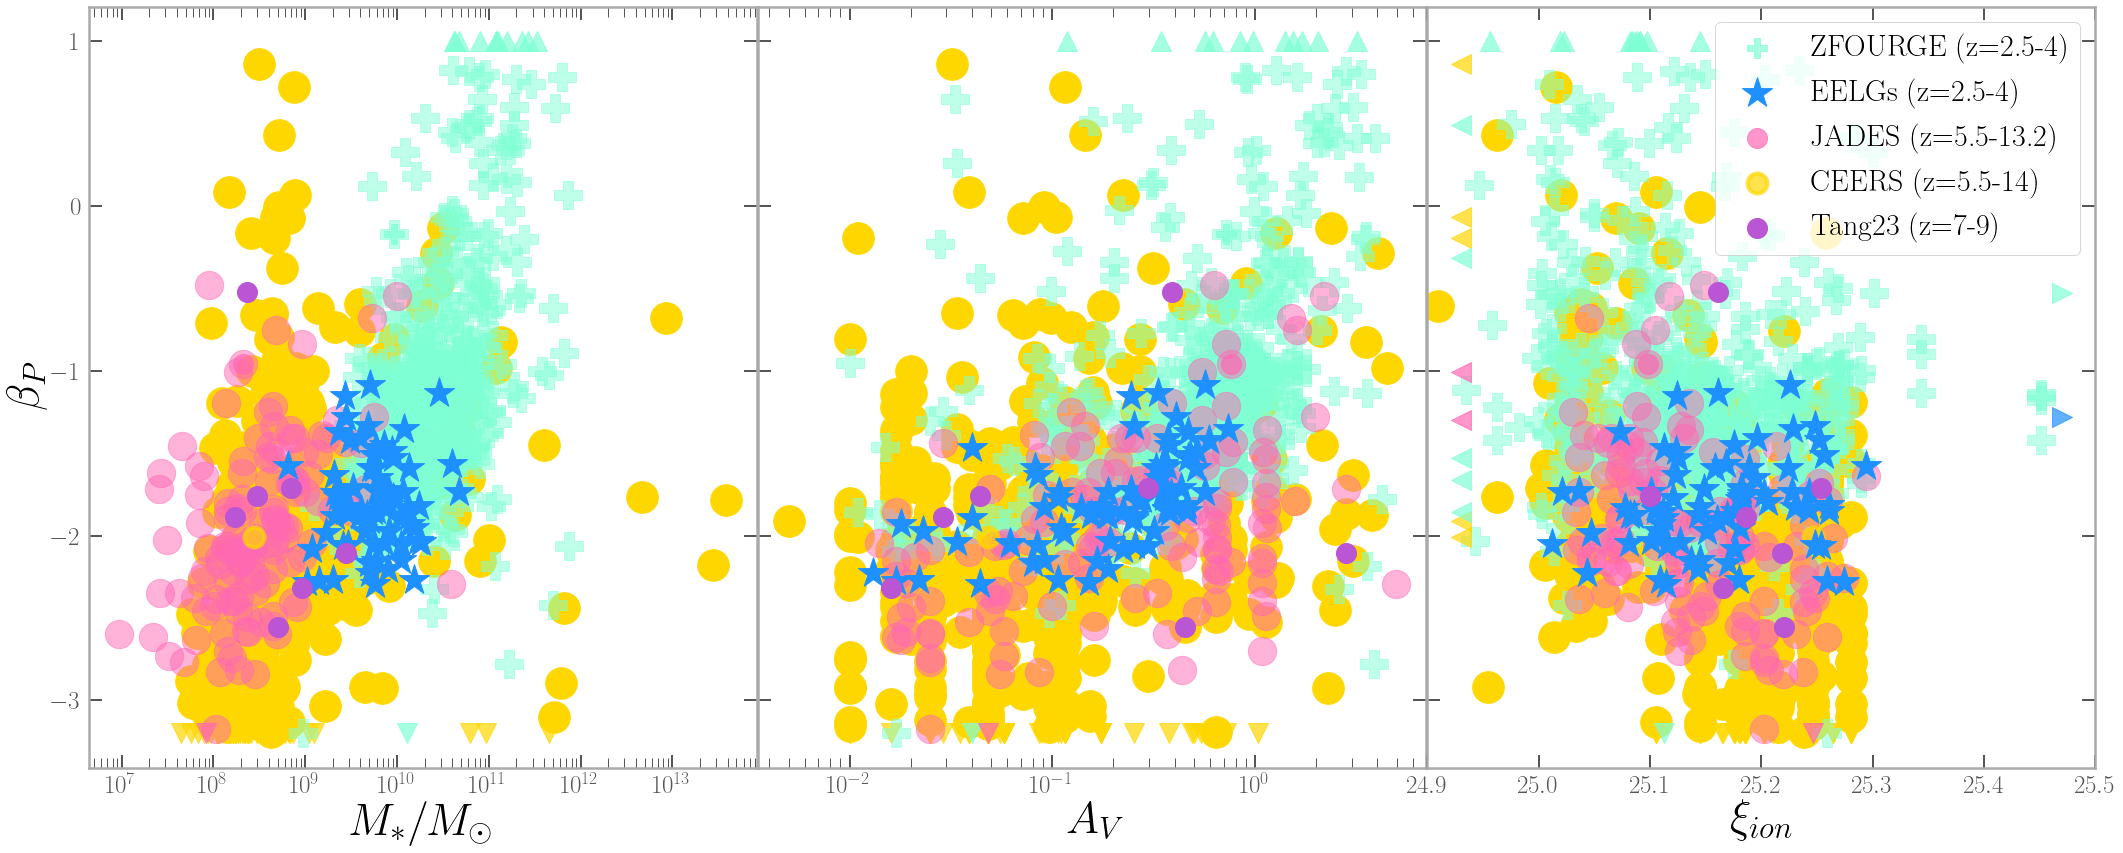

In [32]:
xlab_values = [r'$M_*/M_\odot$',r'$A_V$',r'$\xi_{ion}$' ]#r'Stellar Mass/$M_\odot$',r'Z/$Z_\odot$',r'$\beta_P$' #r'sSFR/$yr^{-1}$',r'$A_V$',r'age/Gyr'
ylab_values = [r'$\beta_P$','','']#r'$\xi_{ion}$' #r'$\beta_P$'
xi_values = ['M(stars)', 'A_V', 'sion']
xscale_values = ['log', 'log', 'linear']
# legval=['None','None','upper left']


# Create a single figure for the whole 1x3 grid
fig, axes = plt.subplots(1, 3, figsize=(30, 14))


# ax=fig.add_subplot(111)

# Call gridplotBP function for each subplot
for i, ax in enumerate(axes):
    xlab = xlab_values[i]
    ylab = ylab_values[i]
    xi = xi_values[i]
    xscale = xscale_values[i]
    yi = 'betaP'
    thresh2 = -3.2 #-3.2 #24.9
    thresh =  1 #1 #26
    yscale = 'linear'
#     dude = legval[i]
    # Call gridplotBP function and pass the subplot's ax
    gridplotBP(ax, xlab, ylab, xi, yi, thresh, thresh2, xscale, yscale)

    # Set y-axis label only for the first plot
#     if i != 0:
#         ax.set_ylabel("")

# Adjust the layout of the subplots to avoid overlapping labels
plt.subplots_adjust(left=0.07, right=0.999, wspace=0.002)
fig.savefig('Paper_correlationx2-updated.pdf', format='pdf', dpi=600, bbox_inches='tight')
# Display the plots
plt.show()

In [7]:
xi='A_V'
yi='sSFR'
concatenated_xi = pd.concat([FM[xi], C[xi], JS[xi]], ignore_index=True)
concatenated_yi = pd.concat([FM[yi], C[yi], JS[yi]], ignore_index=True)
correlation_coefficient_total, p_value = spearmanr(concatenated_xi,concatenated_yi)
print(correlation_coefficient_total, p_value)

0.16342900654926099 4.498143821572408e-09


In [8]:
correlation_coefficient, p_value = spearmanr(JS['SFR'],
                                             JS['A_V'])
print(correlation_coefficient, p_value)
# p_value FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()

0.5642917394751663 2.7162387037215395e-12


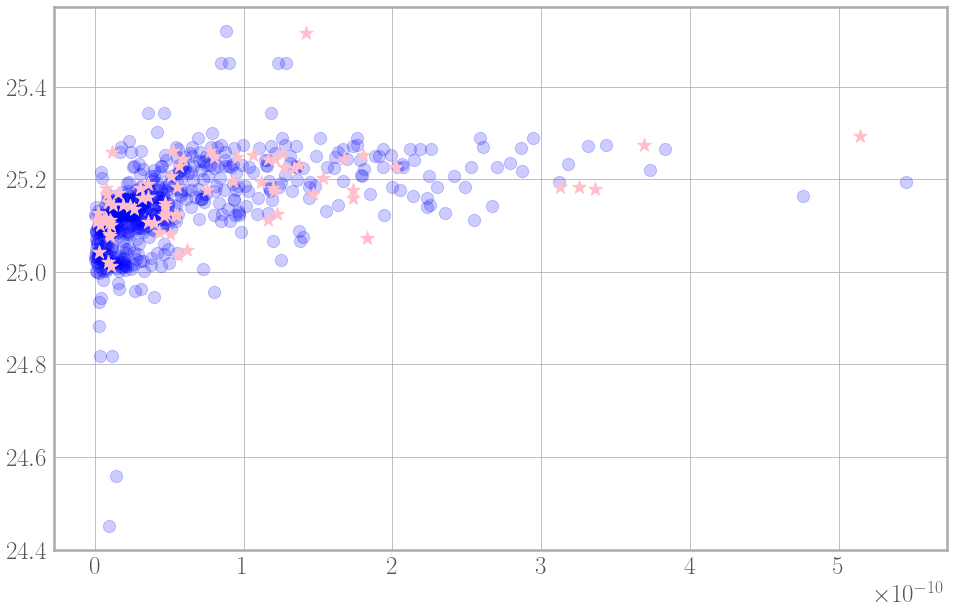

In [149]:
plt.figure(figsize=(16,10))
plt.scatter(FMELG['odepthbc']/FMELG['M(stars)'],FMELG['sion'],marker='*',s=200,c='pink',zorder=5)
plt.scatter(FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['odepthbc']/FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['M(stars)'],FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['sion'],c='blue',alpha=0.2,s=150)

/tmp/ipykernel_1437732/545056656.py:228: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
/tmp/ipykernel_1437732/545056656.py:228: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']


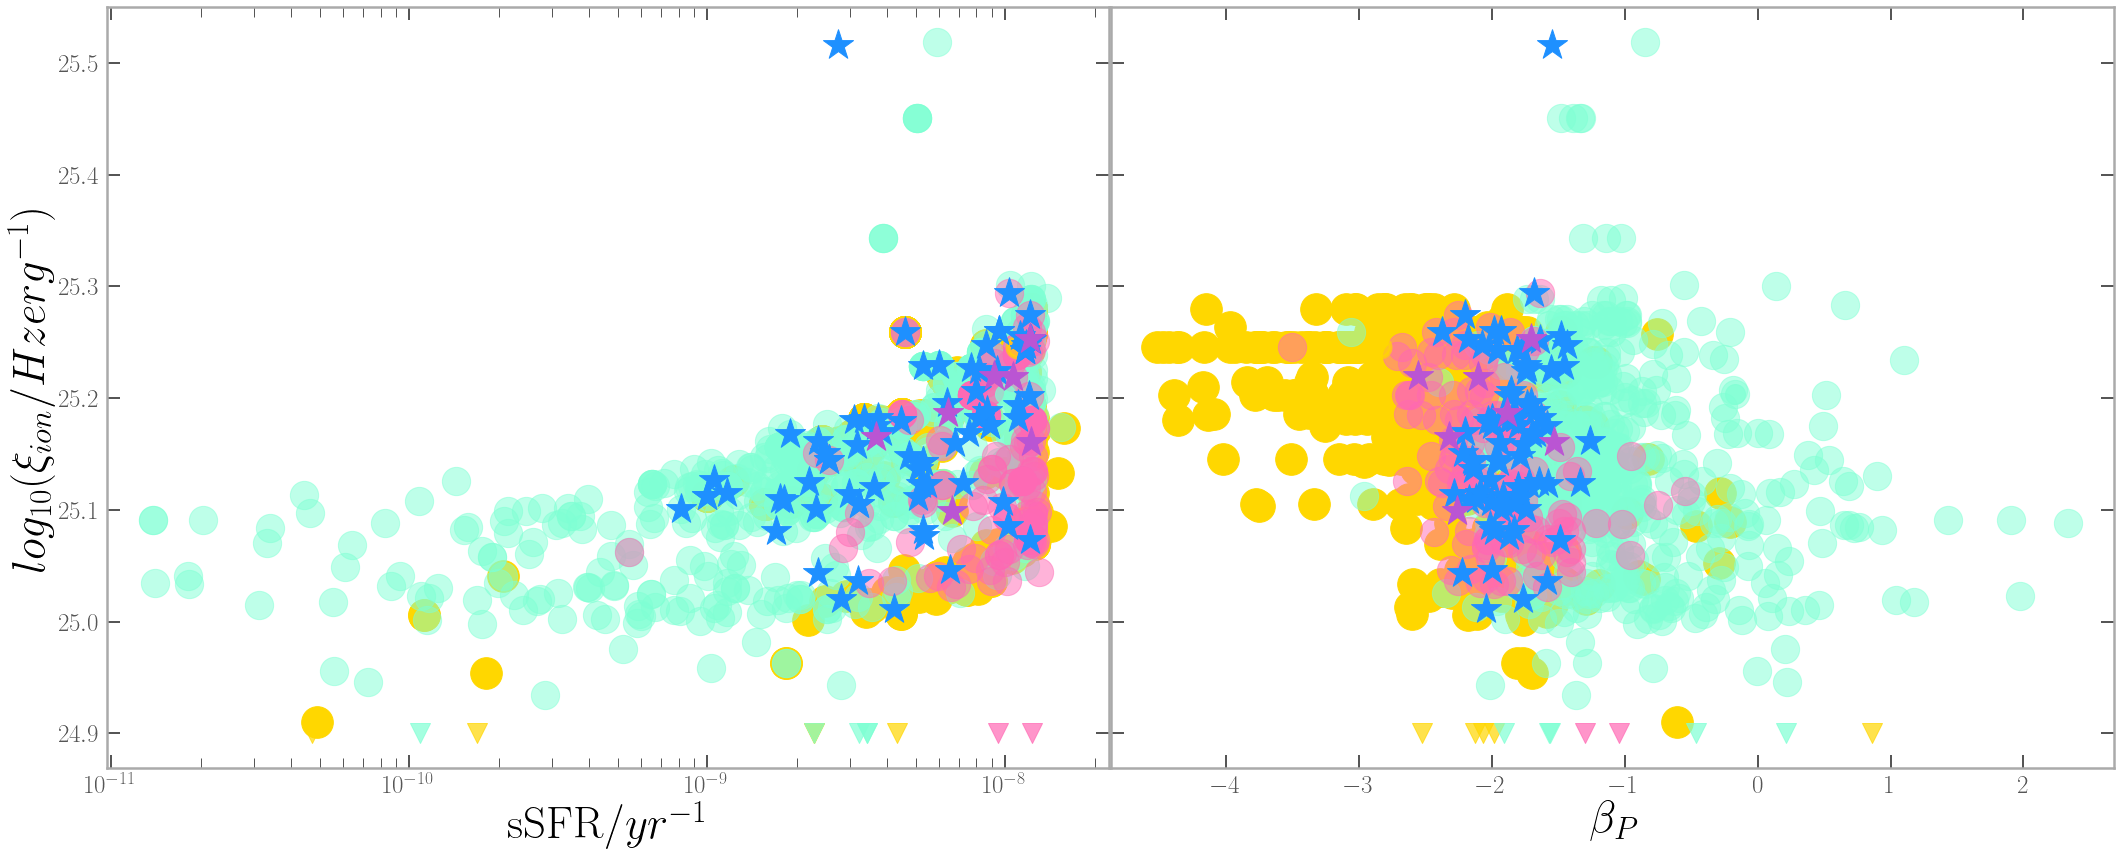

In [306]:
# gridplotBP('Redshift',r'$\beta_P$','redshift','betaP',1,-3.2,'linear','linear')

xlab_values = [r'sSFR/$yr^{-1}$',r'$\beta_P$']
ylab_values = [r'$log_{10}(\xi_{ion}/Hz erg^{-1})$','']
xi_values = ['sSFR', 'betaP']
xscale_values = ['log', 'linear']
# legval=['None','None','upper left']


# Create a single figure for the whole 1x3 grid
fig, axes = plt.subplots(1, 2, figsize=(30, 14))


# ax=fig.add_subplot(111)

# Call gridplotBP function for each subplot
for i, ax in enumerate(axes):
    xlab = xlab_values[i]
    ylab = ylab_values[i]
    xi = xi_values[i]
    xscale = xscale_values[i]
    yi = 'sion'
    thresh2 = 24.9 #-3.2
    thresh = 26 #1
    yscale = 'linear'
#     dude = legval[i]
    # Call gridplotBP function and pass the subplot's ax
    gridplotBP(ax, xlab, ylab, xi, yi, thresh, thresh2, xscale, yscale)

    # Set y-axis label only for the first plot
#     if i != 0:
#         ax.set_ylabel("")

# Adjust the layout of the subplots to avoid overlapping labels
plt.subplots_adjust(left=0.07, right=0.999, wspace=0.002)
fig.savefig('Paper_correlation3.pdf', format='pdf', dpi=600, bbox_inches='tight')
# Display the plots
plt.show()

In [119]:
def gridplotP(xlab,ylab,xi,yi,thresh,thresh2,xscale,yscale):
    fig,ax=FancyPlot(str(xlab),str(ylab))
    
    x=C[xi]
    y=C[yi]
    thresh_upper=thresh
    thresh_lower=thresh2
#     
    for x_val, y_val in zip(x, y):
        if y_val >= thresh_upper:
            ax.scatter(x_val, thresh_upper, marker='^', s=200, alpha=0.7, c='gold')
        elif y_val >= thresh_lower:
            ax.scatter(x_val, y_val, marker='o', s=300, alpha=0.7, c='gold')
        else:
            ax.scatter(x_val, thresh_lower, marker='v', s=200, alpha=0.7, c='gold')
   
    x=FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()[xi]
    y=FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()[yi]
#       
    for x_val, y_val in zip(x, y):
        if y_val >= thresh_upper:
            ax.scatter(x_val, thresh_upper, marker='^', s=200, alpha=0.7, c='aquamarine')
        elif y_val >= thresh_lower:
            ax.scatter(x_val, y_val, marker='o', s=300, alpha=0.7, c='aquamarine')
        else:
            ax.scatter(x_val, thresh_lower, marker='v', s=200, alpha=0.7, c='aquamarine')        
            
    x=JS[xi]
    y=JS[yi]
    thresh_upper=thresh
    thresh_lower=thresh2
            
    for x_val, y_val in zip(x, y):
        if y_val >= thresh_upper:
            ax.scatter(x_val, thresh_upper, marker='^', s=200, alpha=0.5, c='hotpink')
        elif y_val >= thresh_lower:
            ax.scatter(x_val, y_val, marker='o', s=300, alpha=0.5, c='hotpink')
        else:
            ax.scatter(x_val, thresh_lower, marker='v', s=200, alpha=0.5, c='hotpink')        
            

    ax.scatter(C[xi].iloc[0],C[yi].iloc[0],label='CEERS (z=5.5-14)',s=200,marker='o',
                   alpha=0.7,zorder=2,c='gold',linewidth=4)
    ax.scatter(FM[xi].iloc[0],FM[yi].iloc[0],label='ZFOURGE (z=2.5-4)',s=200,marker='d',
                alpha=0.7,zorder=1,c='aquamarine')

    ax.scatter(MT[xi],MT[yi],marker='*',
                   s=300, label='Mengtao2023 (z=7-9)',zorder=5,c='mediumorchid')
    ax.scatter(FMELG[xi],FMELG[yi],label='EELGs (z=2.5-4)',marker='*'
                ,s=300,zorder=4,c='dodgerblue')
    ax.scatter(JS[xi].iloc[0],JS[yi].iloc[0],label='JADES (z=5.5-13.2)',marker='o',s=200,zorder=3,c='hotpink',alpha=0.7)
    concatenated_xi = pd.concat([FM[xi], C[xi], JS[xi]], ignore_index=True)
    concatenated_yi = pd.concat([FM[yi], C[yi], JS[yi]], ignore_index=True)
    correlation_coefficient_total, p_value = spearmanr(concatenated_xi,concatenated_yi)
    print(p_value)
    # ax.annotate('total='+str(correlation_coefficient),xy=(0.2, 0.9),xycoords='axes fraction',fontsize=20,color='red',bbox=dict(boxstyle='round,pad=0.3', facecolor='black'))
    correlation_coefficient_ZFOURGE, p_value = spearmanr(FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()[xi],FM.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()[yi])
    print(p_value)# ax.annotate('ZFOURGE='+str(correlation_coefficient),xy=(0.2, 0.85),xycoords='axes fraction',fontsize=20,color='aquamarine',bbox=dict(boxstyle='round,pad=0.3', facecolor='black'))
    correlation_coefficient_EELG, p_value = spearmanr(FMELG[xi],FMELG[yi])
    print(p_value)# ax.annotate('EELGs='+str(correlation_coefficient),xy=(0.2, 0.8),xycoords='axes fraction',fontsize=20,color='dodgerblue',bbox=dict(boxstyle='round,pad=0.3', facecolor='black'))
    correlation_coefficient_CEERS, p_value = spearmanr(C[xi],C[yi])
    print(p_value)# ax.annotate('CEERS='+str(correlation_coefficient),xy=(0.2, 0.75),xycoords='axes fraction',fontsize=20,color='gold',bbox=dict(boxstyle='round,pad=0.3', facecolor='black'))
    correlation_coefficient_JADES, p_value = spearmanr(JS[xi],JS[yi])
    print(p_value)# ax.annotate('JADES='+str(correlation_coefficient),xy=(0.2, 0.7),xycoords='axes fraction',fontsize=20,color='hotpink',bbox=dict(boxstyle='round,pad=0.3', facecolor='black'))
    ax.legend()
    ax.set_xscale(xscale)
    ax.set_yscale(yscale)
    # ax.legend(legend_elements)
    # ax.set_ylim(24.9,25.5)
#     fig.savefig(xi+'vs'+yi+'.png', format='png', dpi=600, bbox_inches='tight')
    return correlation_coefficient_total,correlation_coefficient_ZFOURGE,correlation_coefficient_EELG,correlation_coefficient_CEERS,correlation_coefficient_JADES


/tmp/ipykernel_411527/110957387.py:5: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']


2.734698516941467e-198
2.1382080609098484e-57
1.7109720193729954e-10
5.5756389512101536e-24
2.520111867915652e-06


(0.7023670110173598,
 0.5870099656307091,
 0.6524244832372409,
 0.4236795550386303,
 0.39933727632481036)

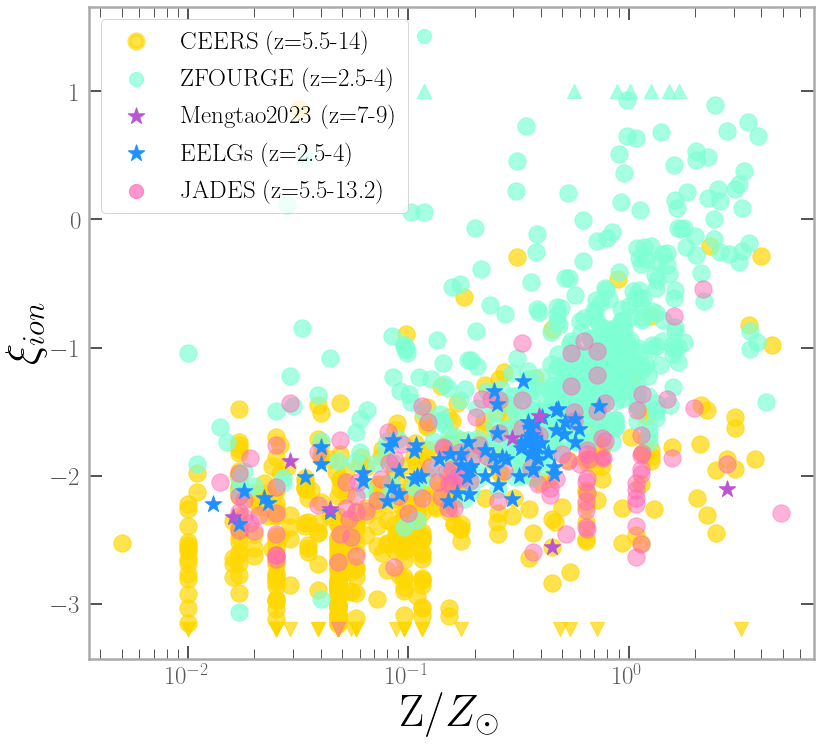

In [365]:
gridplotP(r'Z/$Z_\odot$',r'$\xi_{ion}$','A_V','betaP',1,-3.2,'log','linear')

In [367]:
median(log10(JS['M(stars)']))

8.43076887808408

/tmp/ipykernel_48052/110957387.py:5: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']


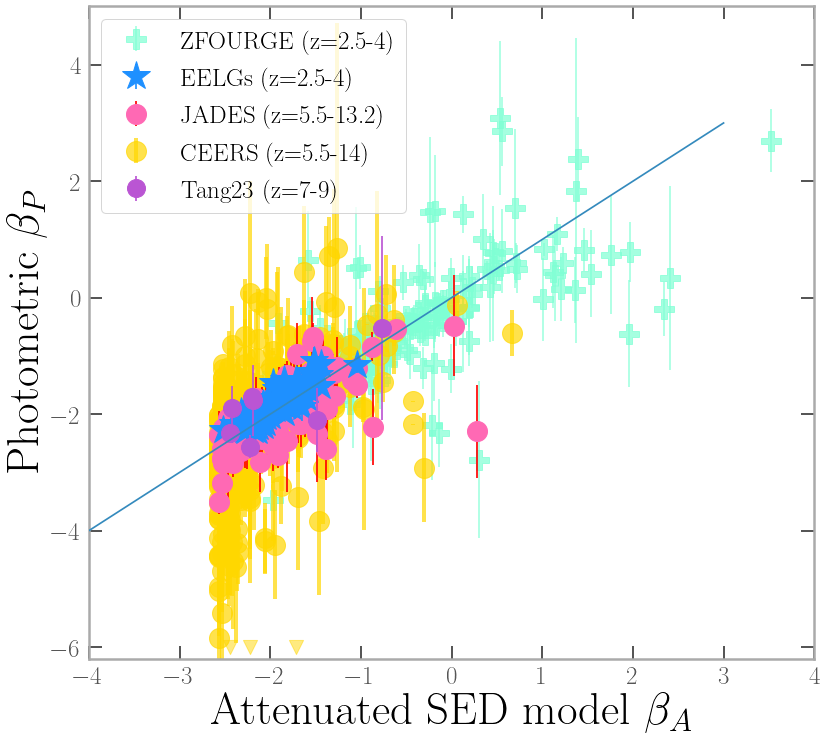

In [33]:
# fig.savefig(path+'sion_eelgs.pdf', format='pdf', dpi=600, bbox_inches='tight')
# fig,ax=FancyPlot(r'Attenuated SED model $\beta_A$',r'Photometric $\beta_P$')



fig,ax=FancyPlot(r'Attenuated SED model $\beta_A$',r'Photometric $\beta_P$')
x=C['beta']
y=C['betaP']
yerr=C['betaP_er']
thresh_upper=4
thresh_lower=-6    
for x_val, y_val,yerr in zip(x, y,yerr):
        if y_val >= thresh_upper:
            ax.scatter(x_val, thresh_upper, marker='^', s=200, alpha=0.5, c='gold')
        elif y_val >= thresh_lower:
            ax.errorbar(x_val,y_val,yerr=yerr,markersize=20,fmt='o',
               ecolor='gold', alpha=0.7,zorder=2,c='gold',linewidth=4)
        else:
            ax.scatter(x_val, thresh_lower, marker='v', s=200, alpha=0.5, c='gold')  
# ax[0].scatter(BC['beta'],BC4IGM['sion'],label='Attenuated',s=300, alpha=0.7,zorder=1,c='purple')
ax.errorbar(BFM['beta'],BFM['betaP'],yerr=BFM['betaP_er'],c='aquamarine',label='ZFOURGE (z=2.5-4)',markersize=20, fmt='P',
            alpha=0.7,zorder=1,ecolor='aquamarine')
ax.errorbar(BFMELG['beta'],BFMELG['betaP'],yerr=BFMELG['betaP_er'],label='EELGs (z=2.5-4)',fmt='*',markersize=30,zorder=4,c='dodgerblue')
ax.errorbar(JSN['beta'],JSN['betaP'],yerr=JSN['betaP_er'],label='JADES (z=5.5-13.2)',fmt='o',markersize=20,zorder=3,ecolor='red',c='hotpink')

ax.errorbar(BC.iloc[0]['beta'],BC.iloc[0]['betaP'],yerr=BC.iloc[0]['betaP_er'],label='CEERS (z=5.5-14)',markersize=20,fmt='o',
               ecolor='gold', alpha=0.7,zorder=2,c='gold',linewidth=4)

ax.errorbar(BMT['beta'],BMT['betaP'],yerr=BMT['betaP_er'],fmt='o',ecolor='mediumorchid',
               markersize=18, label='Tang23 (z=7-9)',zorder=5,c='mediumorchid')

# if BC['betaP'] < -6:
#     plt.scatter()
# ax[0].scatter(BMT['beta'],BMTIGM['sion'],label='MT Magphys atn',marker='*',s=500,zorder=3,c='red')
ax.legend()
ax.set_xlim(-4,4)
ax.set_ylim(-6.2,5)
ax.plot(linspace(-5,3,10),linspace(-5,3,10), zorder=10)
# ax.set_ylim(24.8,25.4)
# ax.set_xlabel(r'Photometric $\beta$')
# ax.set_ylabel(r'$\psi_{ion}$')
fig.savefig('bpvsba-updated.pdf', format='pdf', dpi=600, bbox_inches='tight')

In [10]:
y

0     -2.011752
1     -3.032129
2     -1.923140
3     -1.187492
4     -1.781746
         ...   
521   -2.964811
522   -2.086950
523   -2.413074
524   -3.007830
525   -3.162408
Name: betaP, Length: 461, dtype: float64

/tmp/ipykernel_2390679/110957387.py:5: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']


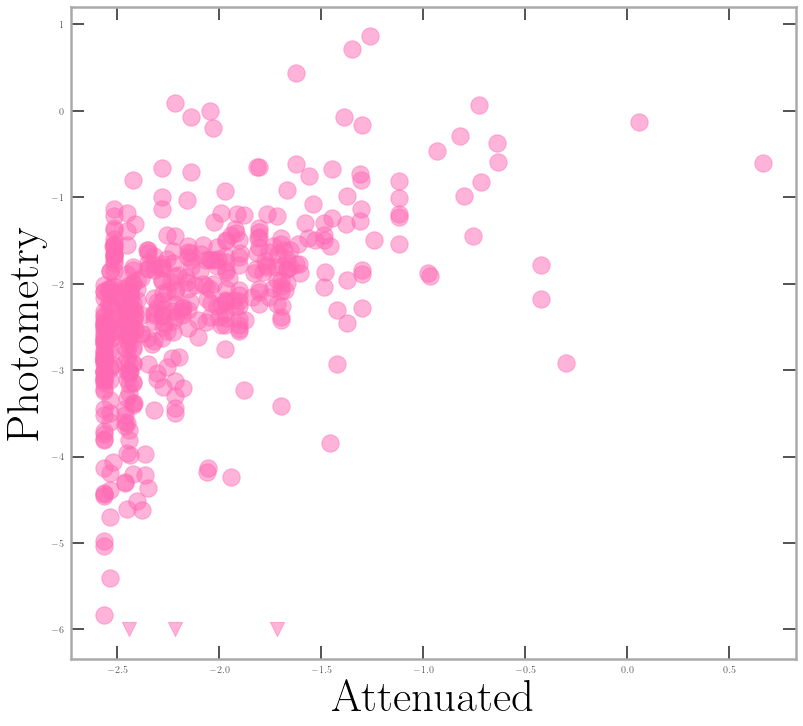

In [6]:
fig,ax=FancyPlot('Attenuated','Photometry')
x=C['beta']
y=C['betaP']
thresh_upper=4
thresh_lower=-6    
for x_val, y_val in zip(x, y):
        if y_val >= thresh_upper:
            ax.scatter(x_val, thresh_upper, marker='^', s=200, alpha=0.5, c='hotpink')
        elif y_val >= thresh_lower:
            ax.scatter(x_val, y_val, marker='o', s=300, alpha=0.5, c='hotpink')
        else:
            ax.scatter(x_val, thresh_lower, marker='v', s=200, alpha=0.5, c='hotpink')     

/tmp/ipykernel_411527/110957387.py:5: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']


(0.581294067492829,
 0.3240092014244871,
 -0.13222677348982267,
 0.31549238292729154,
 0.4804567361957788)

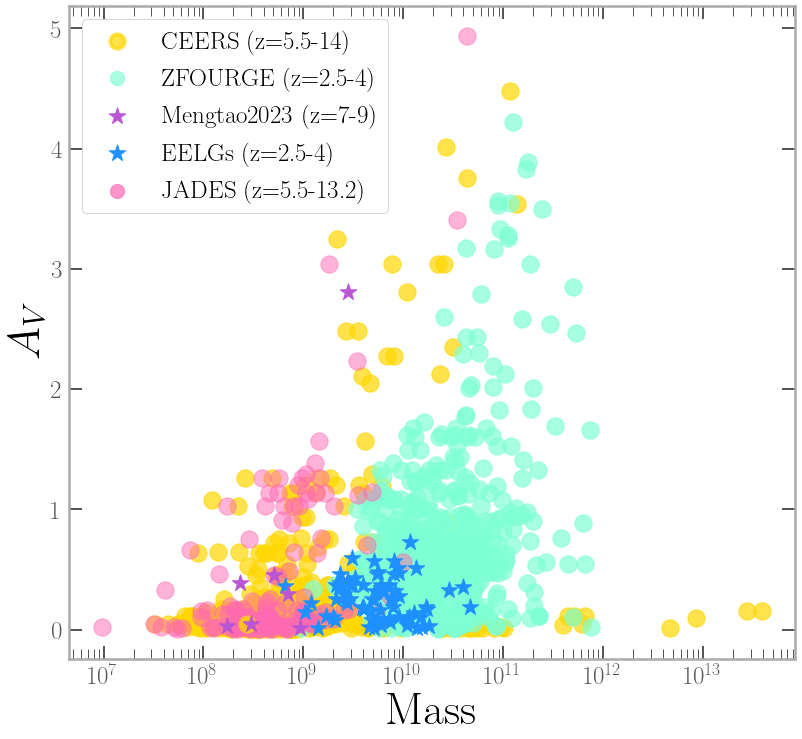

In [73]:
# gridplotP('SFR',r'$\xi_{ion}$','SFR', 'sion',26,24.9,'log','linear')
# gridplotP('betaU','Metals','betaU','metals',2,0,'linear','linear')
# gridplotP('betaP','Metals','betaP','metals',2,0,'linear','linear')
# gridplotP('sion','Metals','sion','metals',2,0,'linear','log')
gridplotP('Mass',r'$A_V$','M(stars)','A_V',5,0,'log','linear')

Text(0, 0.5, 'solar metallicity')

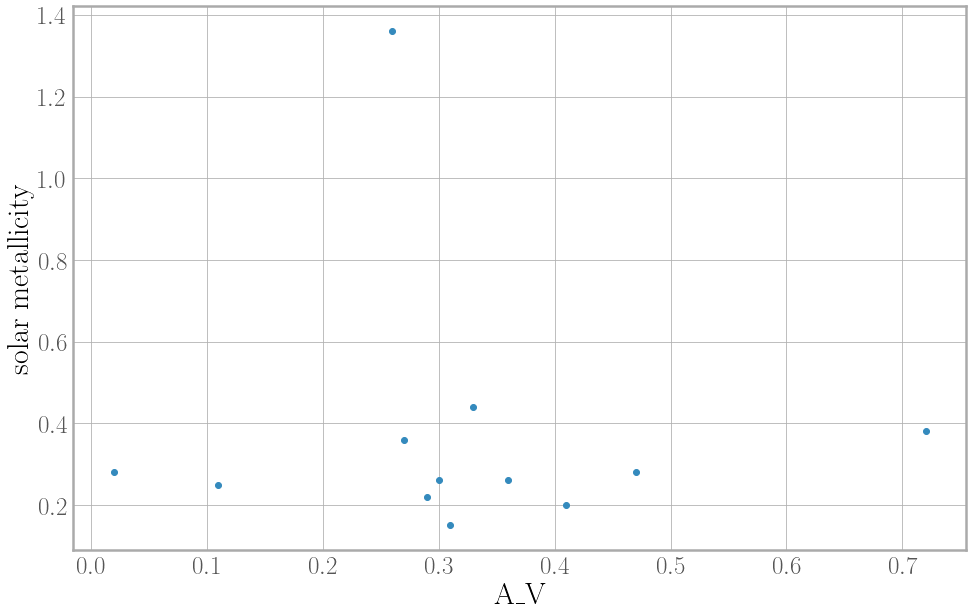

In [75]:
plt.figure(figsize=(16,10))
plt.scatter(x=[0.41,
0.11,
0.29,
0.33,
0.27,
0.47,
0.3,
0.02,
0.26,
0.72,
0.36,
0.31
],y=[0.2,
0.25,
0.22,
0.44,
0.36,
0.28,
0.26,
0.28,
1.36,
0.38,
0.26,
0.15
])
plt.xlabel('A_V')
plt.ylabel('solar metallicity')

In [ ]:
#PROSPECT- with emission lines #changed to MAGPHYS
##computing the bin properties (same for both distributions) Redshift
num_bin = 30
bin_lims = np.linspace(2.5,max(SAM_z),num_bin+1)
bin_centers = 0.5*(bin_lims[:-1]+bin_lims[1:])
bin_widths = bin_lims[1:]-bin_lims[:-1]

##computing the histograms
hist1, _ = np.histogram(SAM_z, bins=bin_lims)
hist2, _ = np.histogram(Pro_z, bins=bin_lims)

##normalizing
hist1b = hist1/np.max(hist1)
hist2b = hist2/np.max(hist2)

##computing the bin properties (same for both distributions) Stellar Mass
num_binSM = 30
bin_limsSM = np.linspace(min(log10(SAM_SM)),max(log10(SAM_SM)),num_binSM+1)
bin_centersSM = 0.5*(bin_limsSM[:-1]+bin_limsSM[1:])
bin_widthsSM = bin_limsSM[1:]-bin_limsSM[:-1]

##computing the histograms
hist1SM, _ = np.histogram(log10(SAM_SM), bins=bin_limsSM)
hist2SM, _ = np.histogram(log10(Pro_SM), bins=bin_limsSM)

##normalizing
hist1bSM = hist1SM/np.max(hist1SM)
hist2bSM = hist2SM/np.max(hist2SM)

##computing the bin properties (same for both distributions) Star Formation Rate
num_binSFR = 30
bin_limsSFR = np.linspace(min(SAM_SFR),max(SAM_SFR),num_binSFR+1)
bin_centersSFR = 0.5*(bin_limsSFR[:-1]+bin_limsSFR[1:])
bin_widthsSFR = bin_limsSFR[1:]-bin_limsSFR[:-1]

##computing the histograms
hist1SFR, _ = np.histogram(SAM_SFR, bins=bin_limsSFR)
hist2SFR, _ = np.histogram(Pro_SFR, bins=bin_limsSFR)

##normalizing
hist1bSFR = hist1SFR/np.max(hist1SFR)
hist2bSFR = hist2SFR/np.max(hist2SFR)

##computing the bin properties (same for both distributions) Specific Star Formation Rate
num_binsSFR = 30
# bin_limssSFR = np.linspace(min(log10(10**SAM_SFR/(SAM_SM))),max(log10(10**SAM_SFR/(SAM_SM))),num_binsSFR+1)
bin_limssSFR = np.linspace(min(SAM_sSFR.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID']))),max(SAM_sSFR.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID']))),num_binsSFR+1)

bin_centerssSFR = 0.5*(bin_limssSFR[:-1]+bin_limssSFR[1:])
bin_widthssSFR = bin_limssSFR[1:]-bin_limssSFR[:-1]

##computing the histograms
# hist1sSFR, _ = np.histogram(log10(10**SAM_SFR/(SAM_SM)), bins=bin_limssSFR)
# hist2sSFR, _ = np.histogram(log10(10**Pro_SFR/(Pro_SM)), bins=bin_limssSFR)

hist1sSFR, _ = np.histogram(SAM_sSFR.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])), bins=bin_limssSFR)
hist2sSFR, _ = np.histogram(Pro_sSFR, bins=bin_limssSFR)


##normalizing
hist1bsSFR = hist1sSFR/np.max(hist1sSFR)
hist2bsSFR = hist2sSFR/np.max(hist2sSFR)

##computing the bin properties (same for both distributions) Dust Luminosity
num_binLdust = 30
bin_limsLdust = np.linspace(min(log10(SAM_dlum.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])))),max(log10(SAM_dlum.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID'])))),num_binLdust+1)
bin_centersLdust = 0.5*(bin_limsLdust[:-1]+bin_limsLdust[1:])
bin_widthsLdust = bin_limsLdust[1:]-bin_limsLdust[:-1]

##computing the histograms
hist1Ldust, _ = np.histogram(log10(SAM_dlum.where(~FM['Galaxy_ID'].isin(FMELG['Galaxy_ID']))), bins=bin_limsLdust)
hist2Ldust, _ = np.histogram(log10(Pro_dlum), bins=bin_limsLdust)

##normalizing
hist1bLdust = hist1Ldust/np.max(hist1Ldust)
hist2bLdust = hist2Ldust/np.max(hist2Ldust)

##computing the bin properties (same for both distributions) Dust Mass
num_binMdust = 30
bin_limsMdust = np.linspace(min(log10(SAM_dmas)),max(log10(SAM_dmas)),num_binMdust+1)
bin_centersMdust = 0.5*(bin_limsMdust[:-1]+bin_limsMdust[1:])
bin_widthsMdust = bin_limsMdust[1:]-bin_limsMdust[:-1]

##computing the histograms
hist1Mdust, _ = np.histogram(log10(SAM_dmas), bins=bin_limsMdust)
hist2Mdust, _ = np.histogram(log10(Pro_dmas), bins=bin_limsMdust)

##normalizing
hist1bMdust = hist1Mdust/np.max(hist1Mdust)
hist2bMdust = hist2Mdust/np.max(hist2Mdust)

# ##computing the bin properties (same for both distributions) Dust Attenuation
# num_bintauISM = 30
# bin_limstauISM = np.linspace(0,max(tauISMh)/4,num_bintauISM+1)
# bin_centerstauISM = 0.5*(bin_limstauISM[:-1]+bin_limstauISM[1:])
# bin_widthstauISM = bin_limstauISM[1:]-bin_limstauISM[:-1]

# ##computing the histograms
# hist1tauISM, _ = np.histogram(tauISMh, bins=bin_limstauISM)
# hist2tauISM, _ = np.histogram(tauISM, bins=bin_limstauISM)

# ##normalizing
# hist1btauISM = hist1tauISM/np.max(hist1tauISM)
# hist2btauISM = hist2tauISM/np.max(hist2tauISM)

# ##computing the bin properties (same for both distributions) chi2
# num_binchi2 = 30
# bin_limschi2 = np.linspace(0,max(chi2h)/4,num_binchi2+1)
# bin_centerschi2 = 0.5*(bin_limschi2[:-1]+bin_limschi2[1:])
# bin_widthschi2 = bin_limschi2[1:]-bin_limschi2[:-1]

# ##computing the histograms
# hist1chi2, _ = np.histogram(chi2h, bins=bin_limschi2)
# hist2chi2, _ = np.histogram(chi2, bins=bin_limschi2)

# ##normalizing
# hist1bchi2 = hist1chi2/np.max(hist1chi2)
# hist2bchi2 = hist2chi2/np.max(hist2chi2)

# ##computing the bin properties (same for both distributions) ISM Temperature
# num_binT_CISM = 30
# bin_limsT_CISM = np.linspace(0,max(T_CISMh),num_binT_CISM+1)
# bin_centersT_CISM = 0.5*(bin_limsT_CISM[:-1]+bin_limsT_CISM[1:])
# bin_widthsT_CISM = bin_limsT_CISM[1:]-bin_limsT_CISM[:-1]

# ##computing the histograms
# hist1T_CISM, _ = np.histogram(T_CISMh, bins=bin_limsT_CISM)
# hist2T_CISM, _ = np.histogram(T_CISM, bins=bin_limsT_CISM)

# ##normalizing
# hist1bT_CISM = hist1T_CISM/np.max(hist1T_CISM)
# hist2bT_CISM = hist2T_CISM/np.max(hist2T_CISM)



# fig, (ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols = 3)
fig,ax1,ax2,ax3=HexPlot(r'redshift',r'Normalized Counts',r'Stellar Mass (M$_\odot$)','',r'SFR (M$_\odot yr^{-1}$)',wspace=0.15)

ax1.bar(bin_centers, hist1b, width = bin_widths, align = 'center',alpha=0.8)
ax1.bar(bin_centers, hist2b, width = bin_widths, align = 'center', alpha = 0.6)

ax2.bar(bin_centersSM, hist1bSM, width = bin_widthsSM, align = 'center',alpha=0.8)
ax2.bar(bin_centersSM, hist2bSM, width = bin_widthsSM, align = 'center', alpha = 0.6)

ax3.bar(bin_centersSFR, hist1bSFR, width = bin_widthsSFR, align = 'center',alpha=0.8)
ax3.bar(bin_centersSFR, hist2bSFR, width = bin_widthsSFR, align = 'center', alpha = 0.6)
plt.tight_layout()
# plt.savefig('NormPotato1',bbox_inches='tight')
###############################################

fig,ax1,ax2,ax3=HexPlot(r'sSFR ($yr^{-1}$)',r'Normalized Counts',r'Dust Luminosity ($L_\odot$)','',r'Dust Mass ($M_\odot$)',wspace=0.15)

ax1.bar(bin_centerssSFR, hist1bsSFR, width = bin_widthssSFR, align = 'center',alpha=0.8, label='ZFOURGE (z=2.5-4)')
ax1.bar(bin_centerssSFR, hist2bsSFR, width = bin_widthssSFR, align = 'center', alpha = 0.6, label='EELGs (z=2.5-4)')
ax1.grid(False)
ax2.bar(bin_centersLdust, hist1bLdust, width = bin_widthsLdust, align = 'center',alpha=0.8)
ax2.bar(bin_centersLdust, hist2bLdust, width = bin_widthsLdust, align = 'center', alpha = 0.6)
ax2.grid(False)
ax3.bar(bin_centersMdust, hist1bMdust, width = bin_widthsMdust, align = 'center',alpha=0.8)
ax3.bar(bin_centersMdust, hist2bMdust, width = bin_widthsMdust, align = 'center', alpha = 0.6)
ax1.legend()
# # plt.savefig('NormPotato2',bbox_inches='tight')
# # plt.savefig('NormPotato2')
# ###############################################
# fig,ax1,ax2,ax3=HexPlot(r'Dust Attenuation',r'Normalized Counts',r'$\chi^2$ fit','',r'Dust Temperature(K)',wspace=0.15)

# ax1.bar(bin_centerstauISM, hist1btauISM, width = bin_widthstauISM, align = 'center',alpha=0.8)
# ax1.bar(bin_centerstauISM, hist2btauISM, width = bin_widthstauISM, align = 'center', alpha = 0.6)
# ax1.set_xlim(right=5)
# ax2.bar(bin_centerschi2, hist1bchi2, width = bin_widthschi2, align = 'center',alpha=0.8)
# ax2.bar(bin_centerschi2, hist2bchi2, width = bin_widthschi2, align = 'center', alpha = 0.6)
# ax2.set_xlim(right=50)
# ax3.bar(bin_centersT_CISM, hist1bT_CISM, width = bin_widthsT_CISM, align = 'center',alpha=0.8)
# ax3.bar(bin_centersT_CISM, hist2bT_CISM, width = bin_widthsT_CISM, align = 'center', alpha = 0.6)
# plt.tight_layout()
# plt.savefig('NormPotato3',bbox_inches='tight')
plt.show()